<center><b><u><h3><font color = 'green'> Telecom Churn - Assignment Solution</h3></u></b></center>

   - Smruthi Ranjan Das
   - Srinu Nosina

## <font color=Indigo>Business Problem Overview</font>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

## <font color=Indigo>Business Objective</font>

The dataset contains customer-level information for a span of four consecutive months - June, July, August & September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.


<b><u><h3><font color = 'Indigo'> The analysis is divided into five main parts: </h3></u></b>


<b><o><h4><font color = 'Indigo'> 1. Reading and Understanding the Data </h4></o></b>
<b><o><h4><font color = 'Indigo'> 2. Data cleaning </h4></o></b>
<b><o><h4><font color = 'Indigo'> 3. Data Visualization </h4></o></b>
<b><o><h4><font color = 'Indigo'> 4. Data preparation </h4></o></b>
<b><o><h4><font color = 'Indigo'> 5. Model building and evaluation </h4></o></b>

In [1]:
# importing required namspaces

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

MISSING_THRESHOLD = 70.0

In [2]:
import statsmodels.api as sm  # Stats model to see complete statics
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn                  # Train and Test data split package
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE  


from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import r2_score 
from xgboost import XGBClassifier


from sklearn.tree import DecisionTreeClassifier


# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

<b><u><h3><font color = 'green'> Step 1: Reading the Data</h3></u></b>

In [4]:
file_path = r'D:\DataScientist\Course Documentation\TelecomChurn_CaseStudy\telecom_churn_data.csv'
#file_path = r'E:\Upgrad\Module3\Unsupervised Learning Principal Component Analysis\Assignment\telecom_churn_data.csv'

# Encoding specified to get rid of encoding issues for specific rows
telecom_churn = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory = False, skipinitialspace = True, float_precision = 2)

In [5]:
# Read the first 3 observations from the dataframe
telecom_churn.head(3)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  

[3 rows x 226 columns]

In [6]:
# Print the number of rows and columns

print('Rows: ', telecom_churn.shape[0])
print('Columns: ', telecom_churn.shape[1])

Rows:  99999
Columns:  226


In [7]:
# we can't see all features in data set, so setting up max_columns and max_rows to 250
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [8]:
# Printing the data distribution
telecom_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [9]:
# Function to print percentage of missing values column-wise in ascending order

def missing_values():

    percent_missing = round(telecom_churn.isnull().sum() * 100 / len(telecom_churn),2)
    missing_value_df = pd.DataFrame({'column_name': telecom_churn.columns,'percent_missing': percent_missing})
    missing_value_df.reset_index(drop=True, inplace=True)
    print(missing_value_df.sort_values('percent_missing'))



In [10]:
# check the percentage of missing values column-wise

missing_values()

                  column_name  percent_missing
0               mobile_number             0.00
156        last_day_rch_amt_9             0.00
155        last_day_rch_amt_8             0.00
154        last_day_rch_amt_7             0.00
153        last_day_rch_amt_6             0.00
148            max_rech_amt_9             0.00
147            max_rech_amt_8             0.00
146            max_rech_amt_7             0.00
145            max_rech_amt_6             0.00
144          total_rech_amt_9             0.00
143          total_rech_amt_8             0.00
142          total_rech_amt_7             0.00
141          total_rech_amt_6             0.00
140          total_rech_num_9             0.00
139          total_rech_num_8             0.00
138          total_rech_num_7             0.00
137          total_rech_num_6             0.00
124            total_ic_mou_9             0.00
123            total_ic_mou_8             0.00
122            total_ic_mou_7             0.00
121          

<b><h3><font color = 'purple'>*** Calculating High Value Customer ***</h3></b>

For filtering out the high value customer the following columns are important

- total_rech_data_6  
- total_rech_data_7  
- av_rech_amt_data_6 
- av_rech_amt_data_7 

But the missing percentage for the following columns are:

- total_rech_data_6  - 74.85 % missing values
- total_rech_data_7  - 74.43 % missing values
- av_rech_amt_data_6 - 74.85 % missing values
- av_rech_amt_data_7 - 74.43 % missing values

For imputing the value for these columns, we need to check the last recharge date for these months

- date_of_last_rech_data_6
- date_of_last_rech_data_7

Checking the missing percentage for these columns

- date_of_last_rech_data_6 - 74.85 % missing values
- date_of_last_rech_data_7 - 74.43 % missing values

Now we need to check if the missing rows for all these columns respective months are equal,
- if yes then it means the recharge was not done, so there is no value for total_rech_data_ and av_rech_amt_data_ and has to be imputed with 0

- else these values are genuine missing values and has to be imputed with mean value

In [11]:
# Finding the index of total_rech_data_ columns

total_rech_data_6_index = telecom_churn['total_rech_data_6'].isnull()
total_rech_data_7_index = telecom_churn['total_rech_data_7'].isnull()
total_rech_data_8_index = telecom_churn['total_rech_data_8'].isnull()

# Finding the index of date_of_last_rech_data_ columns
date_of_last_rech_data_6_index = telecom_churn['date_of_last_rech_data_6'].isnull()
date_of_last_rech_data_7_index = telecom_churn['date_of_last_rech_data_7'].isnull()
date_of_last_rech_data_8_index = telecom_churn['date_of_last_rech_data_8'].isnull()

# Check if both these indexes are equal

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    
    # impute missing values with 0
    telecom_churn['total_rech_data_6'].fillna(0, inplace=True)
    telecom_churn['av_rech_amt_data_6'].fillna(0, inplace=True)
    print('The indexes for NULL values for month 6 are equal so imputed with 0')
    
else:
    
    # impute missing values with mean value
    telecom_churn['total_rech_data_6'].fillna(telecom_churn['total_rech_data_6'].mean(), inplace=True)
    telecom_churn['av_rech_amt_data_6'].fillna(telecom_churn['av_rech_amt_data_6'].mean(), inplace=True)
    print('The indexes for NULL values for month 6 are not equal so imputed with mean value')
    
# Check if both these indexes are equal

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    
    # impute missing values with 0
    telecom_churn['total_rech_data_7'].fillna(0, inplace=True)
    telecom_churn['av_rech_amt_data_7'].fillna(0, inplace=True)
    print('The indexes for NULL values for month 7 are equal so imputed with 0')
    
else:
    
    # impute missing values with mean value
    telecom_churn['total_rech_data_7'].fillna(telecom_churn['total_rech_data_7'].mean(), inplace=True)
    telecom_churn['av_rech_amt_data_7'].fillna(telecom_churn['av_rech_amt_data_7'].mean(), inplace=True)
    print('The indexes for NULL values for month 7 are not equal so imputed with mean value')

# Check if both these indexes are equal

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    
    # impute missing values with 0
    telecom_churn['total_rech_data_8'].fillna(0, inplace=True)
    telecom_churn['av_rech_amt_data_8'].fillna(0, inplace=True)
    print('The indexes for NULL values for month 8 are equal so imputed with 0')
    
else:
    
    # impute missing values with mean value
    telecom_churn['total_rech_data_8'].fillna(telecom_churn['total_rech_data_8'].mean(), inplace=True)
    telecom_churn['av_rech_amt_data_8'].fillna(telecom_churn['av_rech_amt_data_8'].mean(), inplace=True)
    print('The indexes for NULL values for month 8 are not equal so imputed with mean value')
    

The indexes for NULL values for month 6 are equal so imputed with 0
The indexes for NULL values for month 7 are equal so imputed with 0
The indexes for NULL values for month 8 are equal so imputed with 0


<b><h3><font color = 'purple'> Creating a new derived feature (Total Recharge Amount) </h3></b>

In [12]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process

telecom_churn['total_rech_amt_data_6'] = telecom_churn.av_rech_amt_data_6 * telecom_churn.total_rech_data_6
telecom_churn['total_rech_amt_data_7'] = telecom_churn.av_rech_amt_data_7 * telecom_churn.total_rech_data_7
telecom_churn['total_rech_amt_data_8'] = telecom_churn.av_rech_amt_data_8 * telecom_churn.total_rech_data_8

In [13]:
# Defining total average recharge amount for good phase for months 6 and 7 (the good phase)

# talktime recharge + data recharge

telecom_churn['total_avg_rech_amnt_6_7_GPhase'] = (telecom_churn.total_rech_amt_6 + 
                                                   telecom_churn.total_rech_amt_data_6 + 
                                                   telecom_churn.total_rech_amt_7 +  
                                                   telecom_churn.total_rech_amt_data_7) / 2


In [14]:
# Filter high-value customers
# Define high-value customers as follows:
# Those who have recharged with an amount more than or equal to X,
# where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [15]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom_churn.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

print('70 percentile of 6th and 7th months avg recharge amount:', str(high_value_filter))

telecom_churn = telecom_churn[telecom_churn.total_avg_rech_amnt_6_7_GPhase >= high_value_filter]
print('Dataframe shape with High Value Customers:', str(telecom_churn.shape))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Dataframe shape with High Value Customers: (30001, 230)


In [16]:
# Dropping total_avg_rech_amnt_6_7_GPhase column
telecom_churn.drop(['total_avg_rech_amnt_6_7_GPhase'], axis=1, inplace = True)

<b><h3><font color = 'purple'>*** High value customer creation complete ***</h3></b>

In [17]:
telecom_churn = telecom_churn.reset_index(drop = True)
telecom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7000701601        109             0.0             0.0             0.0   
2     7001524846        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7000887461        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              

<b><u><h3><font color = 'green'> Step 2: Data Cleaning </h3></u></b>

#### <font color = brown>1. Columns</font>

<font color = brown>Removing ID columns</font>

In [18]:
if len(telecom_churn['mobile_number'].unique()) == len(telecom_churn.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [19]:
# Also we do not need the column 'mobile_number' during our analysis. 
# Dropping mobile number column

telecom_churn.drop(['mobile_number'], axis=1, inplace = True)


In [20]:
telecom_churn.circle_id.var()

0.0

In [21]:
# Dropping the circle_id column since it has single values and not much of use

telecom_churn.drop(['circle_id'], axis=1, inplace = True)

<font color = brown>Missing values analysis</font>

In [22]:
# Metod to get missing values in each feature, based on given threhold percentage

def get_missing_values(threshold = 0.0):
    
    missing_vals = (telecom_churn.isna().sum() / len(telecom_churn)) * 100
    return  missing_vals[missing_vals >= threshold].sort_values(ascending=False)

In [23]:
# Pring missing values after filtering the high value customers
missing_values()

                  column_name  percent_missing
226     total_rech_amt_data_8             0.00
180               vol_2g_mb_7             0.00
179               vol_2g_mb_6             0.00
177        av_rech_amt_data_8             0.00
176        av_rech_amt_data_7             0.00
175        av_rech_amt_data_6             0.00
161         total_rech_data_8             0.00
160         total_rech_data_7             0.00
159         total_rech_data_6             0.00
154        last_day_rch_amt_9             0.00
153        last_day_rch_amt_8             0.00
152        last_day_rch_amt_7             0.00
151        last_day_rch_amt_6             0.00
146            max_rech_amt_9             0.00
145            max_rech_amt_8             0.00
144            max_rech_amt_7             0.00
143            max_rech_amt_6             0.00
142          total_rech_amt_9             0.00
81             total_og_mou_8             0.00
82             total_og_mou_9             0.00
225     total

In [24]:
# Printing all columns having more than 40% missing values

print(get_missing_values(40))

fb_user_9                   49.268358
arpu_2g_9                   49.268358
date_of_last_rech_data_9    49.268358
total_rech_data_9           49.268358
max_rech_data_9             49.268358
count_rech_2g_9             49.268358
av_rech_amt_data_9          49.268358
arpu_3g_9                   49.268358
count_rech_3g_9             49.268358
night_pck_user_9            49.268358
arpu_2g_8                   46.825106
fb_user_8                   46.825106
date_of_last_rech_data_8    46.825106
max_rech_data_8             46.825106
count_rech_2g_8             46.825106
count_rech_3g_8             46.825106
night_pck_user_8            46.825106
arpu_3g_8                   46.825106
count_rech_2g_6             44.148528
arpu_2g_6                   44.148528
fb_user_6                   44.148528
max_rech_data_6             44.148528
night_pck_user_6            44.148528
arpu_3g_6                   44.148528
date_of_last_rech_data_6    44.148528
count_rech_3g_6             44.148528
count_rech_2

#### <font color = blue>Now lets examine the above columns (with >40% missing values) one by one</font>

<font color="#6C3483"><h4> 1. Date columns: 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' </h4></font>

Dates cannot be imputed randomly hence we can remove these columns

In [25]:
telecom_churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

<font color="#6C3483"><h4> 2. 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8' </h4></font>

In [26]:
print(" Summary Info ")
print(" ============ ")
print("\n max_rech_data_6 \n")
print(telecom_churn.max_rech_data_6.describe())
print("\n max_rech_data_7 \n")
print(telecom_churn.max_rech_data_7.describe())
print("\n max_rech_data_8 \n")
print(telecom_churn.max_rech_data_8.describe())

 Summary Info 

 max_rech_data_6 

count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

 max_rech_data_7 

count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64

 max_rech_data_8 

count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64


All the above three columns has
1. Maximum recharge amount is 1555 
2. Minimun recharge amount is 1

Hence, missing values can be inferred as "No Recharge" and can be imputed with 0


In [27]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_churn[col].fillna(0, inplace=True)

<font color="#6C3483"><h4> 3. Remaining columns relate to data/internet usage for the months 6, 7 & 8 </h4></font>
    
* count_rech_2g_6
* count_rech_3g_6
* arpu_2g_6
* arpu_3g_6
* night_pck_user_6

* count_rech_2g_7
* count_rech_3g_7
* arpu_2g_7
* arpu_3g_7
* night_pck_user_7

* count_rech_2g_8
* count_rech_3g_8
* arpu_2g_8
* arpu_3g_8
* night_pck_user_8

In [28]:
print('Number of null values for each columns\n')

columns = ['count_rech_2g_', 'count_rech_3g_', 'arpu_2g_', 'arpu_3g_', 'night_pck_user_']
for i in range(6,9):
    for col in columns:
        col_name = col + str(i)
        print(col_name, ': ', telecom_churn[col_name].isnull().sum())
    print('')

Number of null values for each columns

count_rech_2g_6 :  13245
count_rech_3g_6 :  13245
arpu_2g_6 :  13245
arpu_3g_6 :  13245
night_pck_user_6 :  13245

count_rech_2g_7 :  12944
count_rech_3g_7 :  12944
arpu_2g_7 :  12944
arpu_3g_7 :  12944
night_pck_user_7 :  12944

count_rech_2g_8 :  14048
count_rech_3g_8 :  14048
arpu_2g_8 :  14048
arpu_3g_8 :  14048
night_pck_user_8 :  14048



### <font color = DarkCyan>Data Insight 1</font>


**1. Each month has the same number of null values**

**2. We need to check if all the indexes are same where the value is null**

In [29]:
# Month 6

arpu_3g_6_index = telecom_churn['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom_churn['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom_churn['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom_churn['count_rech_3g_6'].isnull()
fb_user_6_index = telecom_churn['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = telecom_churn['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom_churn['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom_churn['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom_churn['count_rech_3g_7'].isnull()
fb_user_7_index = telecom_churn['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

# ***************************************************************************************************************************

# Month 8

arpu_3g_8_index = telecom_churn['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom_churn['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom_churn['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom_churn['count_rech_3g_8'].isnull()
fb_user_8_index = telecom_churn['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')


The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


**2g, 3g, night_pack and fb_pack is not being used by the customer these are add on packs**

**So with this inference we can impute the missing values related to these columns  with 0.**

In [30]:
# From the above inferences imputing the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_churn[columns_to_impute] = telecom_churn[columns_to_impute].fillna(0)

In [31]:
# Checking info() for the above columns again 

telecom_churn[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 18 columns):
count_rech_2g_6     30001 non-null float64
count_rech_2g_7     30001 non-null float64
count_rech_2g_8     30001 non-null float64
count_rech_3g_6     30001 non-null float64
count_rech_3g_7     30001 non-null float64
count_rech_3g_8     30001 non-null float64
arpu_3g_6           30001 non-null float64
arpu_3g_7           30001 non-null float64
arpu_3g_8           30001 non-null float64
arpu_2g_6           30001 non-null float64
arpu_2g_7           30001 non-null float64
arpu_2g_8           30001 non-null float64
night_pck_user_6    30001 non-null float64
night_pck_user_7    30001 non-null float64
night_pck_user_8    30001 non-null float64
fb_user_6           30001 non-null float64
fb_user_7           30001 non-null float64
fb_user_8           30001 non-null float64
dtypes: float64(18)
memory usage: 4.1 MB


<font color="#6C3483"><h4> 4. Deleting date columns for the months 6, 7 & 8 </h4></font>

In [32]:
# Date columns
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

# The date columns will not be of any use to us during the analysis, so deleting the date column

telecom_churn.drop(date_columns, axis=1, inplace = True)

In [33]:
# Check missing values

missing_values()

                  column_name  percent_missing
217     total_rech_amt_data_8             0.00
148        last_day_rch_amt_9             0.00
150         total_rech_data_6             0.00
151         total_rech_data_7             0.00
152         total_rech_data_8             0.00
154           max_rech_data_6             0.00
155           max_rech_data_7             0.00
156           max_rech_data_8             0.00
158           count_rech_2g_6             0.00
147        last_day_rch_amt_8             0.00
159           count_rech_2g_7             0.00
162           count_rech_3g_6             0.00
163           count_rech_3g_7             0.00
164           count_rech_3g_8             0.00
166        av_rech_amt_data_6             0.00
167        av_rech_amt_data_7             0.00
168        av_rech_amt_data_8             0.00
170               vol_2g_mb_6             0.00
171               vol_2g_mb_7             0.00
160           count_rech_2g_8             0.00
172          

- Missing values seems to be higher in 8th month and highest in 9th month
- Which means these customers have stopped using the services and are more likely to churn out

In [34]:
# List out rest of the columns and impute with 0 values

columns_with_null_values = telecom_churn.columns[telecom_churn.isna().any()].tolist()
for temp_columns in columns_with_null_values:
    telecom_churn[temp_columns].fillna(0, inplace=True)
    

In [35]:
# Print missing values
missing_values()

                  column_name  percent_missing
0              loc_og_t2o_mou              0.0
138          total_rech_amt_8              0.0
139          total_rech_amt_9              0.0
140            max_rech_amt_6              0.0
141            max_rech_amt_7              0.0
142            max_rech_amt_8              0.0
143            max_rech_amt_9              0.0
144       date_of_last_rech_9              0.0
145        last_day_rch_amt_6              0.0
146        last_day_rch_amt_7              0.0
147        last_day_rch_amt_8              0.0
148        last_day_rch_amt_9              0.0
149  date_of_last_rech_data_9              0.0
150         total_rech_data_6              0.0
151         total_rech_data_7              0.0
152         total_rech_data_8              0.0
153         total_rech_data_9              0.0
154           max_rech_data_6              0.0
155           max_rech_data_7              0.0
156           max_rech_data_8              0.0
157          

### <font color = DarkCyan>Data Insight</font>

**Looking at the problem statement, attributes `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` and `vol_3g_mb_9` are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis.**

Let's now drop all those individual columns whose totals are available.

In [36]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_churn.drop(individual_cols, axis = 1, inplace = True)

telecom_churn.shape

(30001, 167)

In [37]:
# removing only one unique value present features,because these features has no variance 
#it will not useful in further analysis 

for i in telecom_churn.columns:
    if telecom_churn[i].nunique() == 1:
        telecom_churn.drop(i, axis=1, inplace = True)

print("\nDimension of the updated dataset:",telecom_churn.shape)


Dimension of the updated dataset: (30001, 156)


## <font color = purple>Tag churners and remove attributes of the churn phase</font>

Tag churners and remove attributes of the churn phase

Steps to tag churned customers (churn=1, churn=0) based on the fourth month:

a. customers who have not made any calls(incoming or outgoing) 

b. customers who have not used internet servies 

Attributes to check are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [38]:
churn_parameters_data = telecom_churn[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00         0.00         0.00
1            0.00            0.00         0.00         0.00
2           34.91          142.18         0.00         0.00
3          252.61         1031.53         0.00         0.00
4          127.48          127.63        13.93       314.74

In [39]:
telecom_churn['churn'] = telecom_churn.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [40]:
telecom_churn.head()

last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
2            9/30/2014   378.721   492.223   137.362  166.787       413.69   
3            9/30/2014   514.453   597.753   637.760  578.596       102.41   
4            9/30/2014    74.350   193.897   366.966  811.480        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        54.68        52.29         0.00        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        325.91          0.00          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0          23.74          12.59          38.06            0.0   
2            0.0           0.00           0.00           0.00            0.0   
3            0.0           0.00           0.00           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             26.13             34.58              0.00              0.00   
3             29.98            107.54              0.00              0.00   
4             15.74             83.73              2.45              4.08   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_9  \
0          0.00          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79          0.00              0.00   
2        378.09        288.18         63.04         60.71              7.33   
3         97.04         94.09        129.74        137.53            131.64   
4        131.91        133.68        182.14        101.93              0.00   

   std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_mou_6  std_og_mou_7  \
0              0.00              0.00          0.00          0.00   
1              0.00              0.00         60.86         75.14   
2             74.13              0.00        130.26        143.48   
3            762.34              0.00        763.29        934.69   
4             11.44              3.89          2.36          6.35   

   std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0          0.00          0.00           0.0          0.00          0.00   
1         77.84          0.00           0.0          0.18         10.01   
2         98.28         81.46           0.0          0.00          0.00   
3        938.79        893.99           0.0          0.00          0.00   
4         39.61         15.34           0.0          0.01          0.00   

   isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  \
0           0.0           0.0           0.0          0.00          0.00   
1           0.0           4.5           0.0          6.50          0.00   
2           0.0           0.0           0.0         10.23          0.00   
3           0.0           0.0           0.0   

<b><h3><font color = 'purple'> Delete columns that belong to the churn month (9th month)</h3></b>

In [41]:
# delete all columns relating to 9th month

telecom_churn = telecom_churn.filter(regex='[^9]$', axis=1)
telecom_churn.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0           0.00           0.00           0.00           0.00          0.00   
1          31.64          23.74          12.59          38.06        422.16   
2           0.00           0.00           0.00           0.00        378.09   
3           0.00           0.00           0.00           0.00         97.04   
4           0.00           0.00           0.00           0.00        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0          0.00          0.00          0.00          0.00          0.00   
1        533.91        255.79         60.86         75.14         77.84   
2        288.18         63.04        130.26        143.48         98.28   
3         94.09        129.74        763.29        934.69        938.79   
4        133.68        182.14          2.36          6.35         39.61   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0          0.00          0.00           0.0           0.0   
1           0.0          0.18         10.01           4.5           0.0   
2           0.0          0.00          0.00           0.0           0.0   
3           0.0          0.00          0.00           0.0           0.0   
4           0.0          0.01          0.00           0.1           0.0   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0          0.00          0.0          0.0          0.0            0.00   
1          6.50          0.0          0.0          0.0          487.53   
2         10.23          0.0          0.0          0.0          508.36   
3          0.00          0.0          0.0          0.0          860.34   
4         17.71          0.0          0.0          0.0          134.38   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0            0.00            0.00          0.00          0.00          5.44   
1          609.24          350.16        427.88        355.23        188.04   
2          431.66          171.56         81.43         23.83         15.79   
3         1028.79         1068.54        125.33         87.68        159.11   
4          140.04          239.48        116.63        174.41        224.21   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0          0.00          0.00          0.00            0.00            0.00   
1        180.54        173.08        193.94          626.46          558.04   
2         22.43          4.66          0.75          103.86           28.49   
3         81.76         44.21        101.93          207.09          131.89   
4          2.94         14.89         57.29          119.58          222.89   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0            5.44          0.00           0.0           0.0          0.00   
1          428.74          0.21           0.0           0.0          2.06   
2           16.54          0.00           0.0           0.0          0.00   
3          261.04

In [42]:
telecom_churn.shape

(30001, 105)

In [43]:
telecom_churn.head(1)

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803          0.0          0.0          0.0   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.0           0.0           0.0            0.0            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0            0.0            0.0            0.0            0.0           0.0   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0           0.0           0.0           0.0           0.0           0.0   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0           0.0           0.0           0.0           0.0           0.0   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0           0.0          0.0          0.0          0.0             0.0   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0             0.0             0.0           0.0           0.0          5.44   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0           0.0           0.0           0.0             0.0             0.0   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0            5.44           0.0           0.0           0.0           0.0   

   isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  \
0           0.0           0.0          0.0          0.0          0.0   

   total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                 4                 3                 2               362   

   total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0               252               252             252             252   

   max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  \
0             252                1.0                1.0                1.0   

   max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  \
0            252.0            252.0            252.0              0.0   

   count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
0              0.0              0.0              1.0              1.0   

   count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
0              1.0        30.13         1.32         5.75        83.57   

   vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  \
0       150.76       109.61               0.0               0.0   

   night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
0               0.0             0             0             0            0   

   sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0            0            0             1             1             1   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0            0            0            0        1.0        1.0        1.0   

   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_amt_data_6  \
0  968        30.4         0.0       101.2        3.58                  252.0   

   total_rech_amt_data_7  total_rech_amt_data_8  churn  
0                  252.0                  252.0      1

### <font color = brown>2. Rows</font>

#### Now lets analyze the revenue columns to check if there are any discrepencies in the data.

In [44]:
# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom_churn[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


The above statistical description of the **ARPU - Average Revenue Per User** column gives some important insight. The **MINIMUM** value for all the arpu related columns are **NEGATIVE**. Now as per the defination of ARPU which says - 

"**The average revenue per user is the average billing per customer earned by the telecom company every month**".

Now the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.


In [45]:
# Let's delete the observations with negative arpu values. 

telecom_churn = telecom_churn[(telecom_churn['arpu_6'] >= 0) & 
                            (telecom_churn['arpu_7'] >= 0) & 
                            (telecom_churn['arpu_8'] >= 0)]

In [46]:
telecom_churn.shape

(29824, 105)

In [47]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom_churn.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

## <font color = green>Part 4 - Exploratory Data Analysis</font>

In [48]:
telecom_churn.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean     559.219456    562.562717    510.085640    261.221418    268.432668   
std      459.504626    478.650800    501.034006    459.882386    480.118084   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      310.997000    311.804750    233.862000     17.310000     16.280000   
50%      482.462500    482.121500    428.508500     85.040000     83.575000   
75%      699.734750    699.081750    662.607000    291.277500    291.490000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29824.000000  29824.000000  29824.000000  29824.000000   29824.000000   
mean     234.713851    373.290400    378.524141    335.496097      16.163287   
std      458.523657    479.935683    497.879922    479.852372      76.476134   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.790000     72.355000     70.552500     47.810000       0.000000   
50%       66.210000    223.060000    220.970000    183.860000       0.000000   
75%      241.377500    487.630000    494.432500    439.867500       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29824.000000   29824.000000   29824.000000   29824.000000   
mean       12.665772      12.540844      26.587856      20.221840   
std        75.919274      74.296839     115.896578      96.329109   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  \
count   29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean       19.959368    254.184985    255.602001    236.198045    347.042871   
std       105.000152    377.768435    374.931788    362.335779    607.363864   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000     32.580000     34.960000     23.140000      0.410000   
50%         0.000000    125.030000    128.785000    111.655000     45.630000   
75%         0.000000    332.400000    334.425000    311.815000    466.167500   
max      5337.040000  10643.380000   7674.780000  11039.910000   8432.990000   

       std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean     364.456108    307.816943      2.157038      2.105380      1.955376   
std      639.590635    607.789460     45.933468     45.671468     44.840402   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.180000      0.000000      0.000000      0.000000      0.000000   
50%       44.470000     25.960000      0.000000      0.000000      0.000000   
75%      500.927500    359.522500      0.000000      0.000000      0.000000   
max    10936.730000  13980.060000   5900.660000   5490.280000   5681.540000   

       spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7  \
count  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   
mean       5.820176      7.118840      6.572885      0.661218      0.043034   
std       17.582614     21.812118     20.334324      4.117322      2.684681   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.230000      0.710000      0.450000    

### <font color = brown>Categorical Variables Analysis</font>

In [49]:
# Categorical column list
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
telecom_churn[category_list]

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                   0.0               0.0               0.0        1.0   
1                   0.0               0.0               0.0        0.0   
2                   0.0               0.0               0.0        0.0   
3                   0.0               0.0               0.0        0.0   
4                   0.0               0.0               0.0        0.0   
...                 ...               ...               ...        ...   
29996               0.0               0.0               0.0        1.0   
29997               0.0               0.0               0.0        1.0   
29998               0.0               0.0               0.0        1.0   
29999               0.0               0.0               0.0        0.0   
30000               0.0               0.0               0.0        1.0   

       fb_user_7  fb_user_8  
0            1.0        1.0  
1            0.0        0.0  
2            1.0        1.0  
3            0.0        0.0  
4            1.0        1.0  
...          ...        ...  
29996        1.0        1.0  
29997        1.0        1.0  
29998        1.0        1.0  
29999        1.0        1.0  
30000        1.0        1.0  

[29824 rows x 6 columns]

In [50]:
telecom_churn[category_list] = telecom_churn[category_list].astype(int)

telecom_churn[category_list].head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0                 0                 0                 0          1          1   
1                 0                 0                 0          0          0   
2                 0                 0                 0          0          1   
3                 0                 0                 0          0          0   
4                 0                 0                 0          0          1   

   fb_user_8  
0          1  
1          0  
2          1  
3          0  
4          1

### <font color = brown>Univariate Analysis - Ordered Categorical Variables</font>

In [51]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

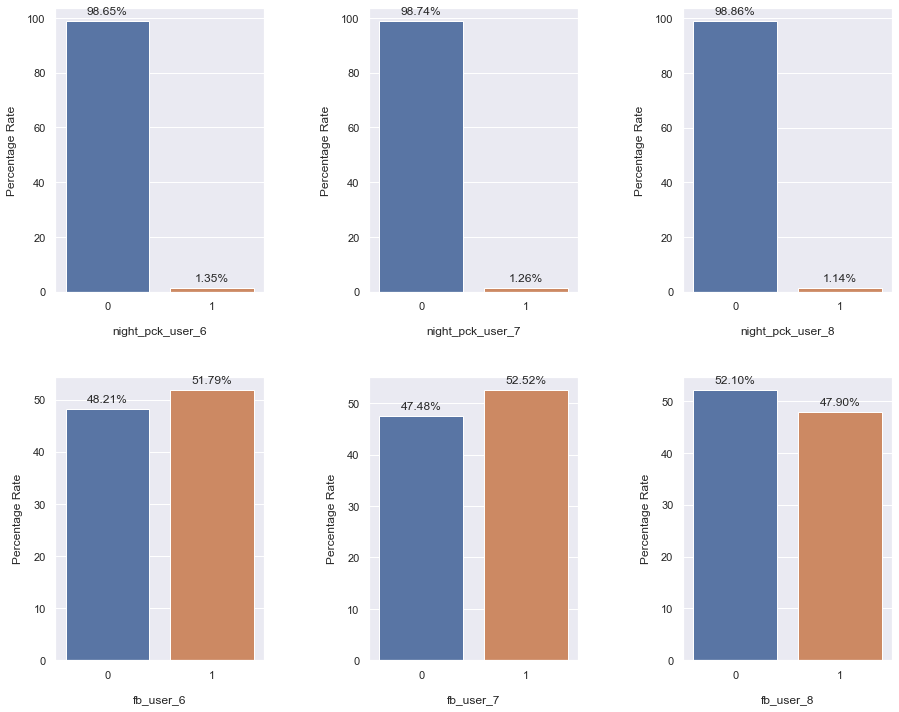

In [52]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (15, 12))
sns.set(style="darkgrid")

for col_list in category_list:
        
    series = round(((telecom_churn[col_list].value_counts(dropna = False))/(len(telecom_churn[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1
    
del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the `night_pck_user` variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.

However users are using `fb_user` in equal percentage and it is observed that as the month increases, there is a decline in the fb usage.

### <font color = purple>2. Univariate Analysis - Quantitative Variables</font>

In [53]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)
    


In [54]:
# Custom Function for Univariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# data                  -      The data frame.

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
    
    try:
        sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    except RuntimeError as re:
        sns.distplot(data[x_axis], hist = True, kde = True, kde_kws={'bw': 0.1}, color = 'g')
        
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

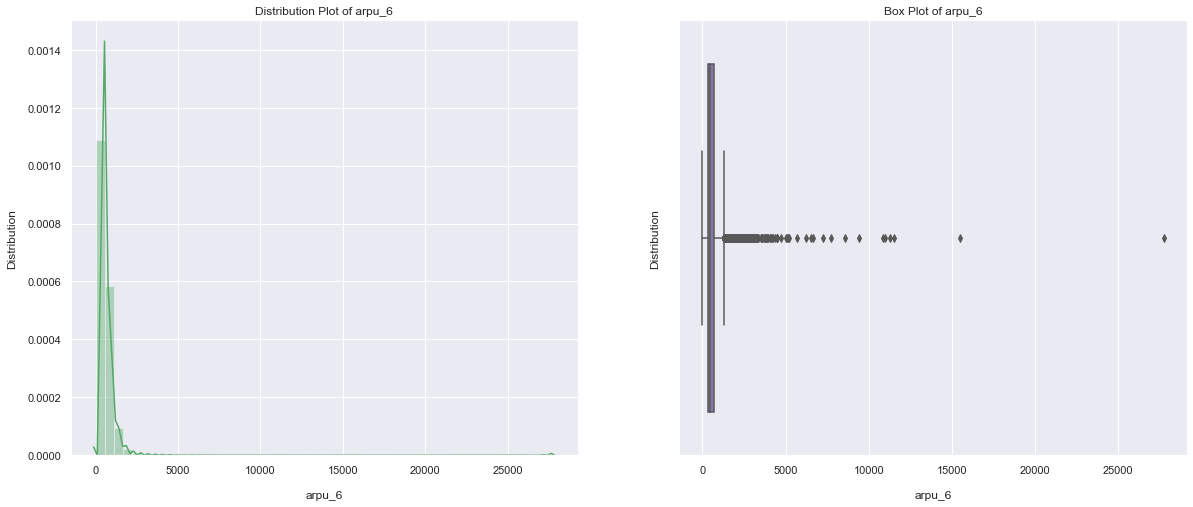

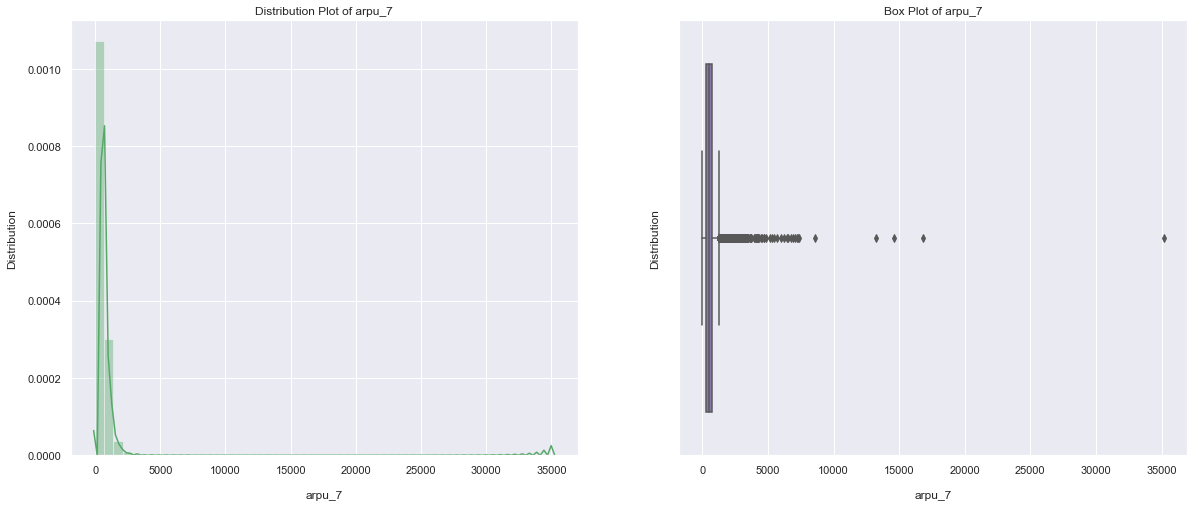

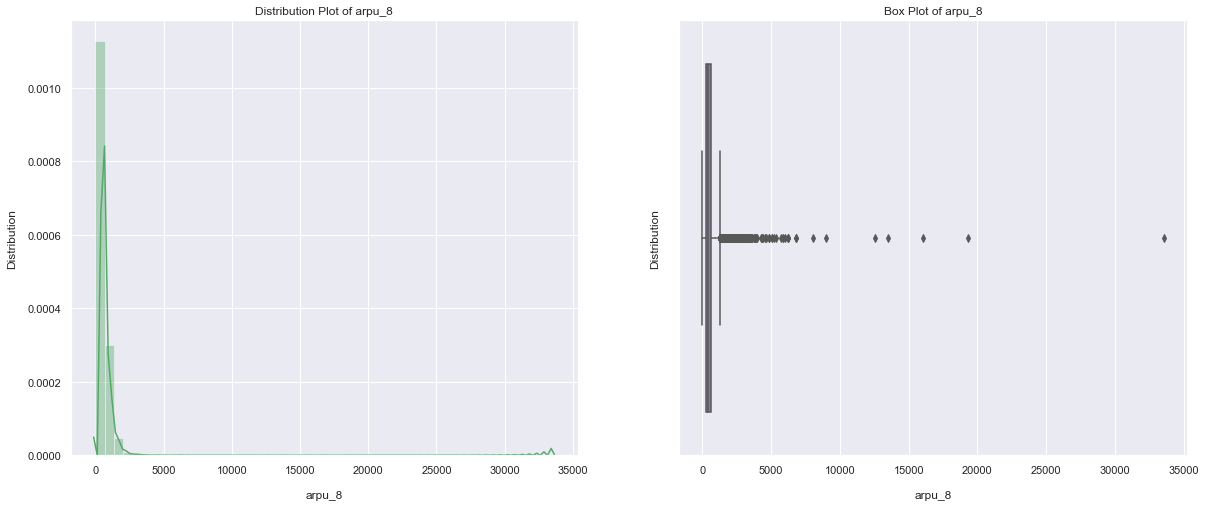

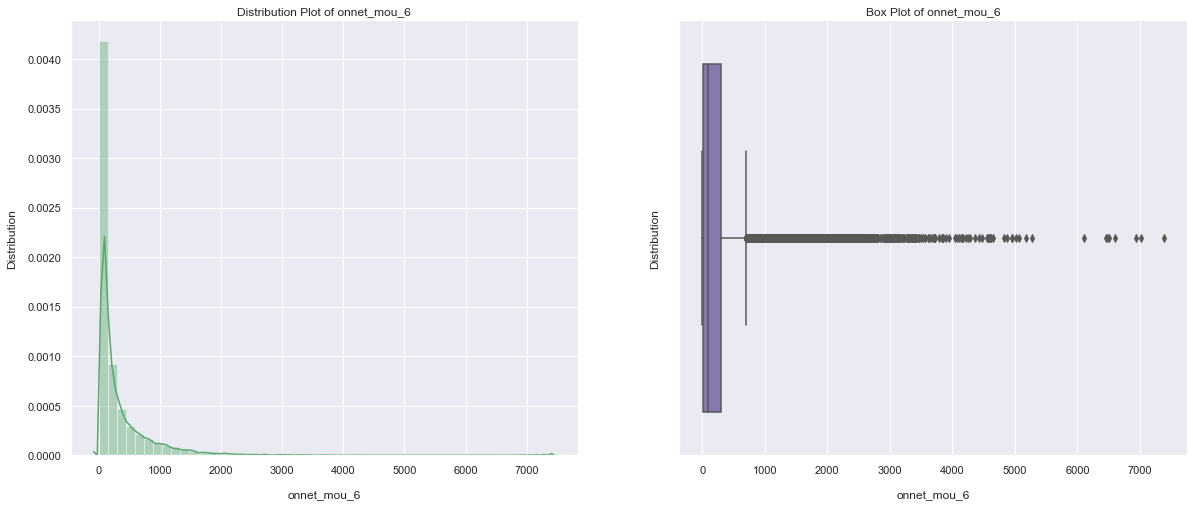

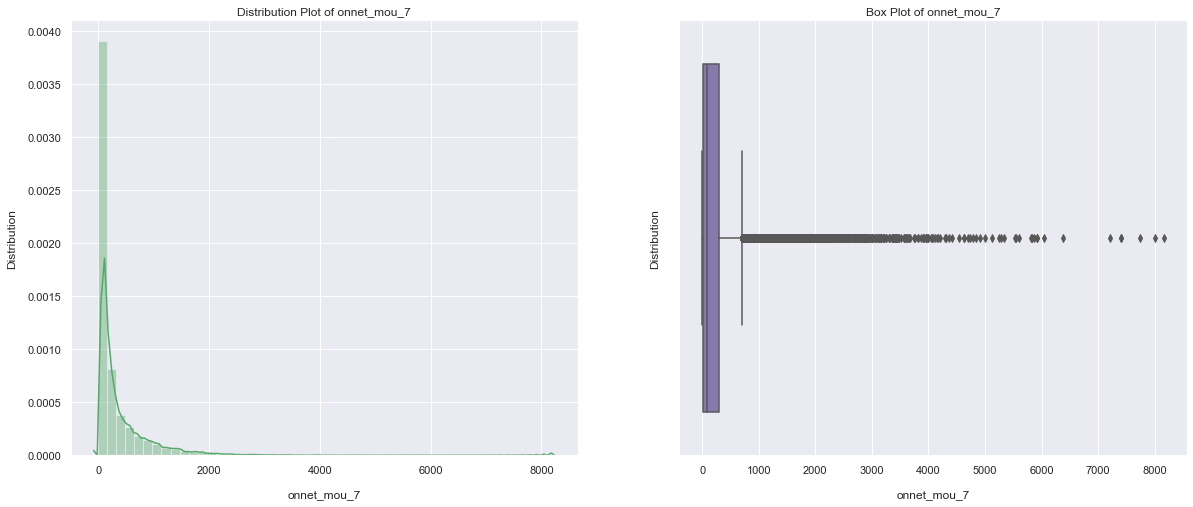

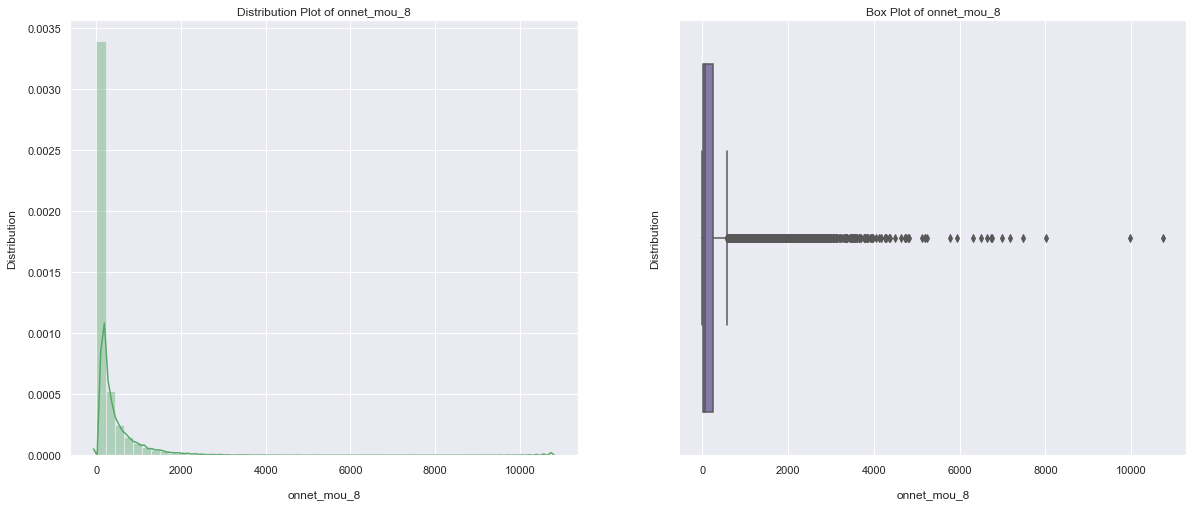

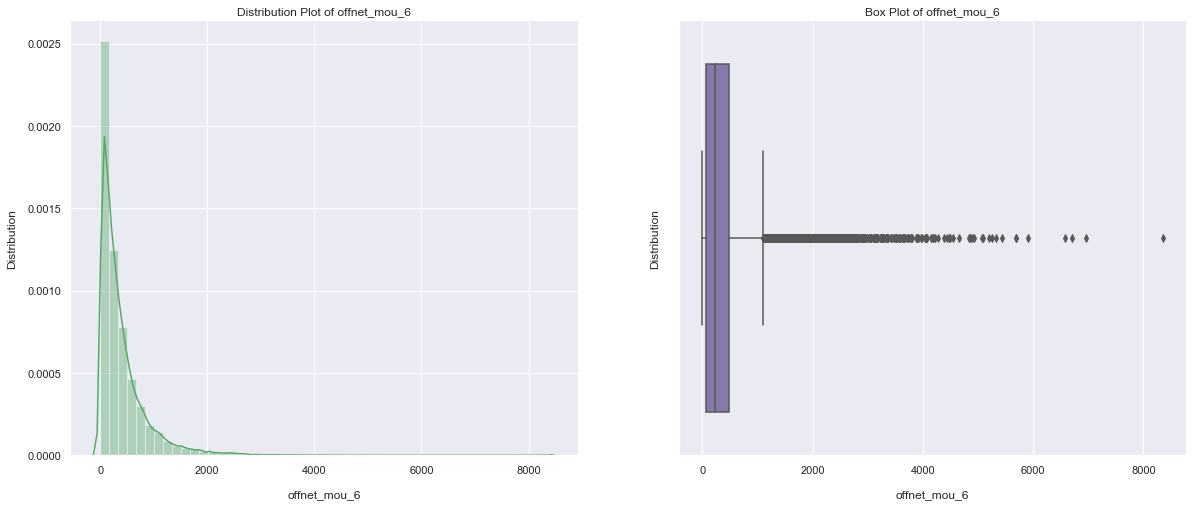

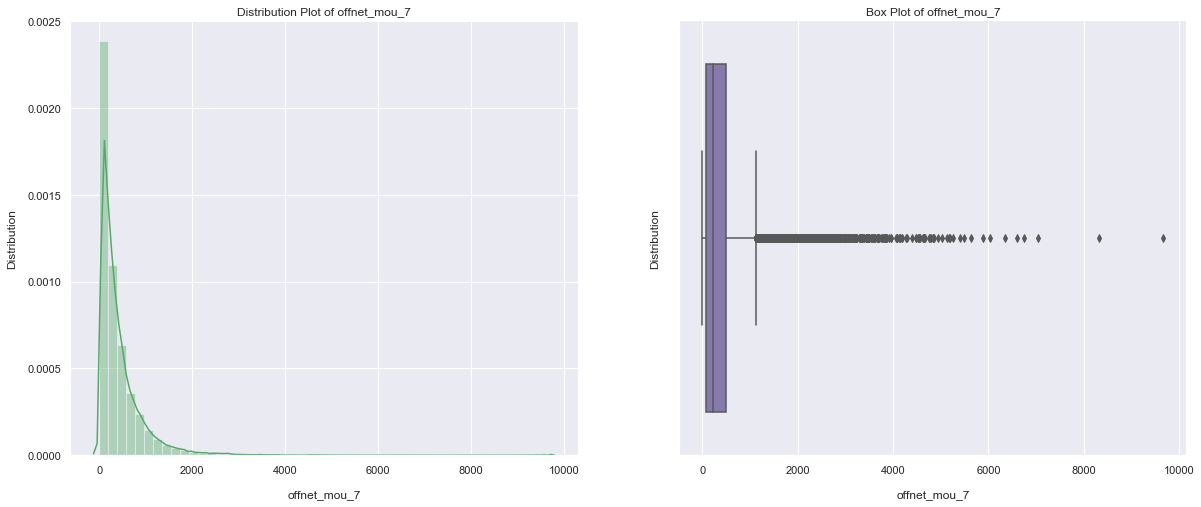

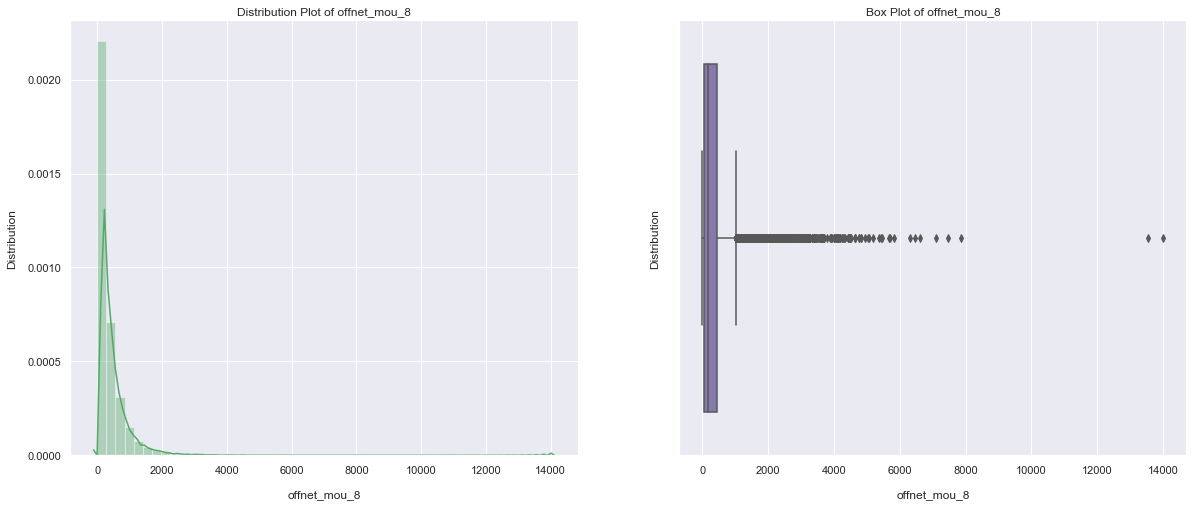

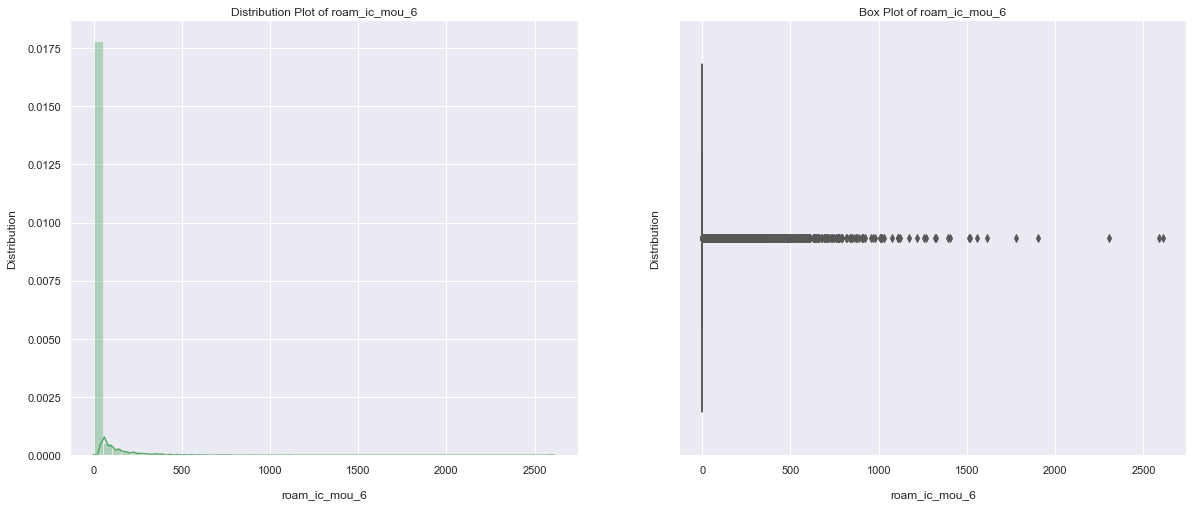

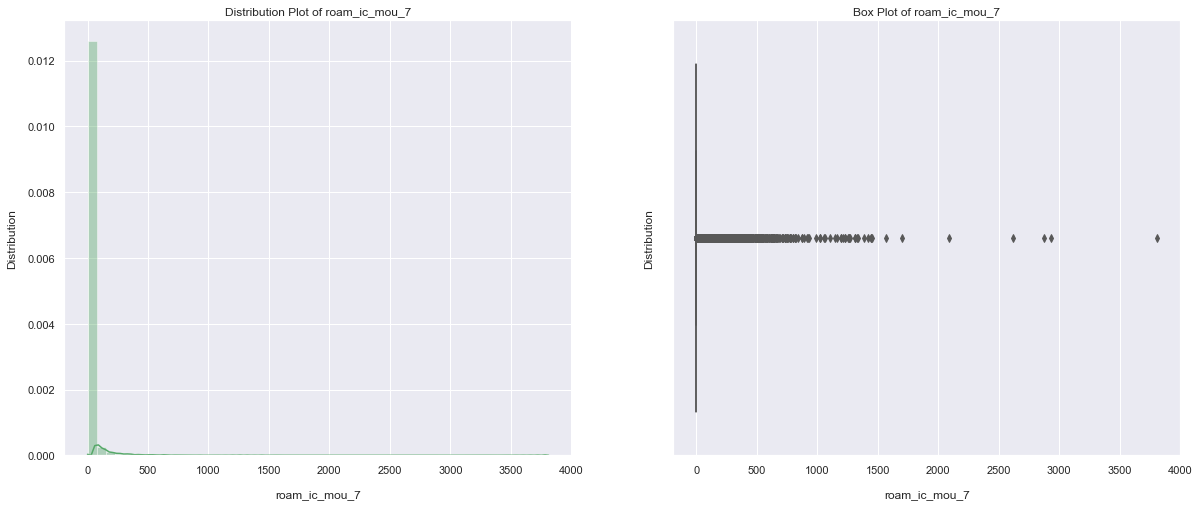

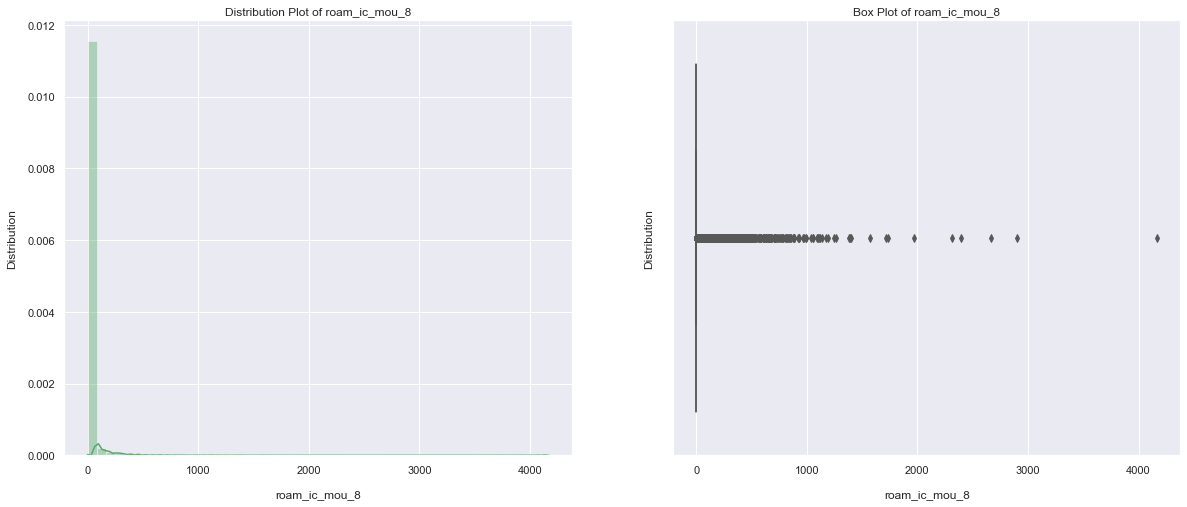

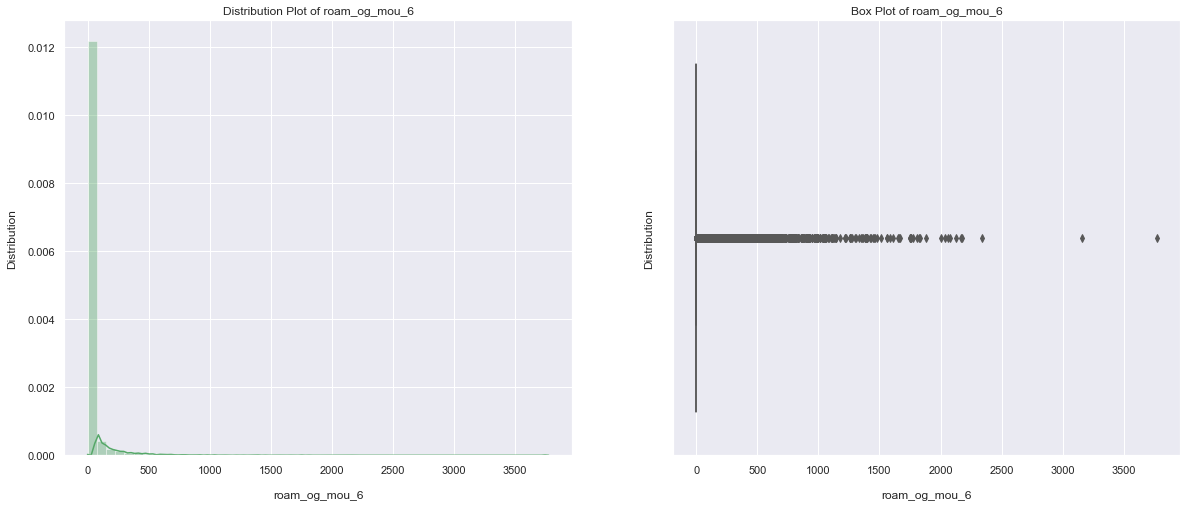

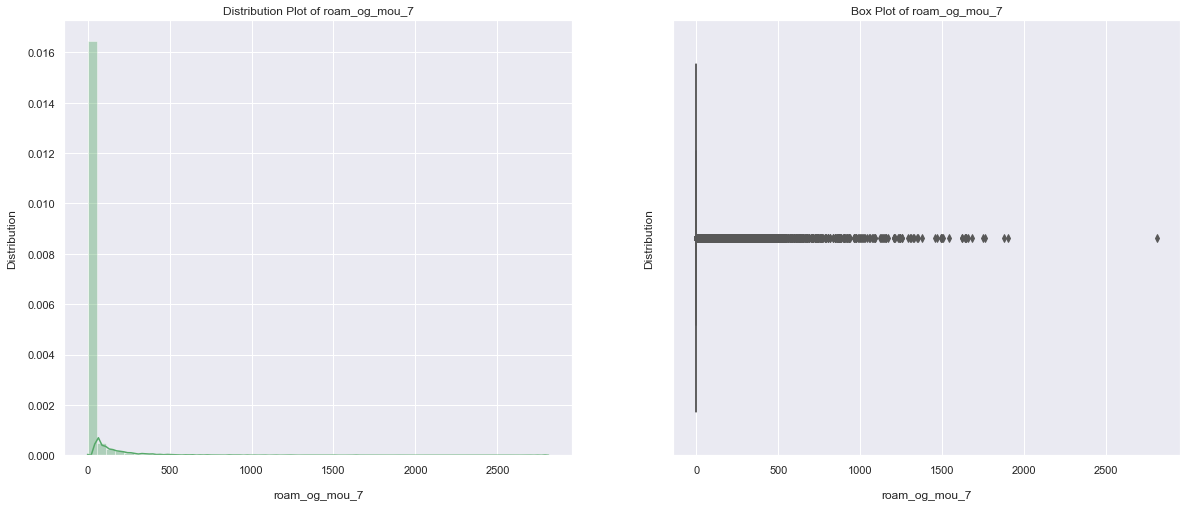

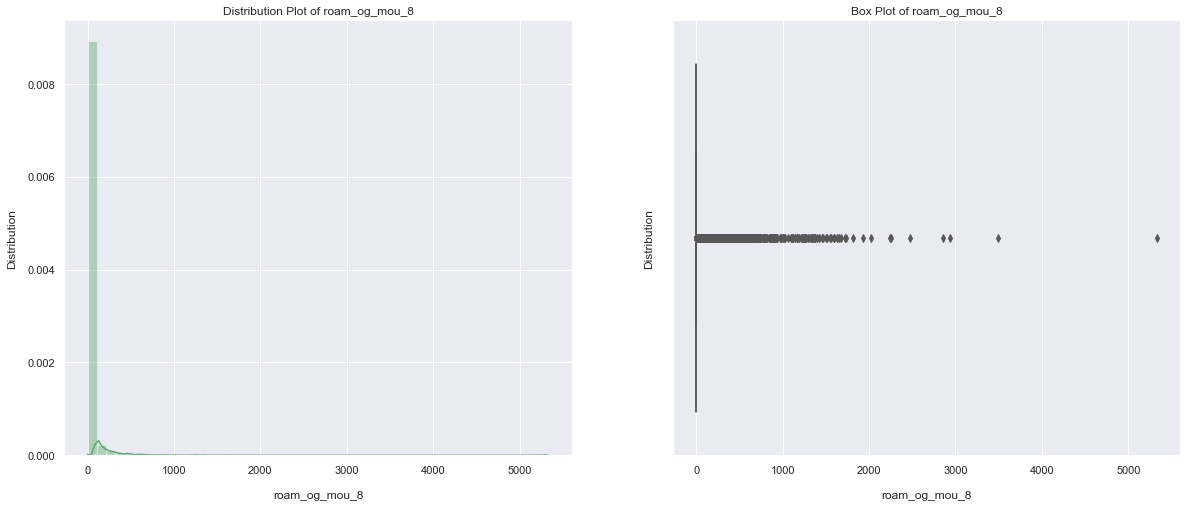

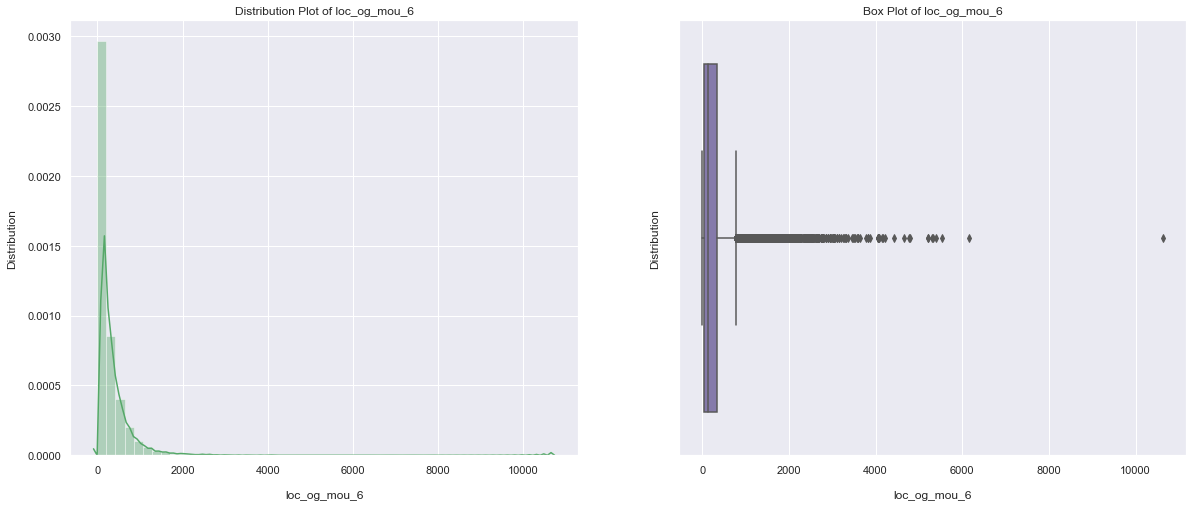

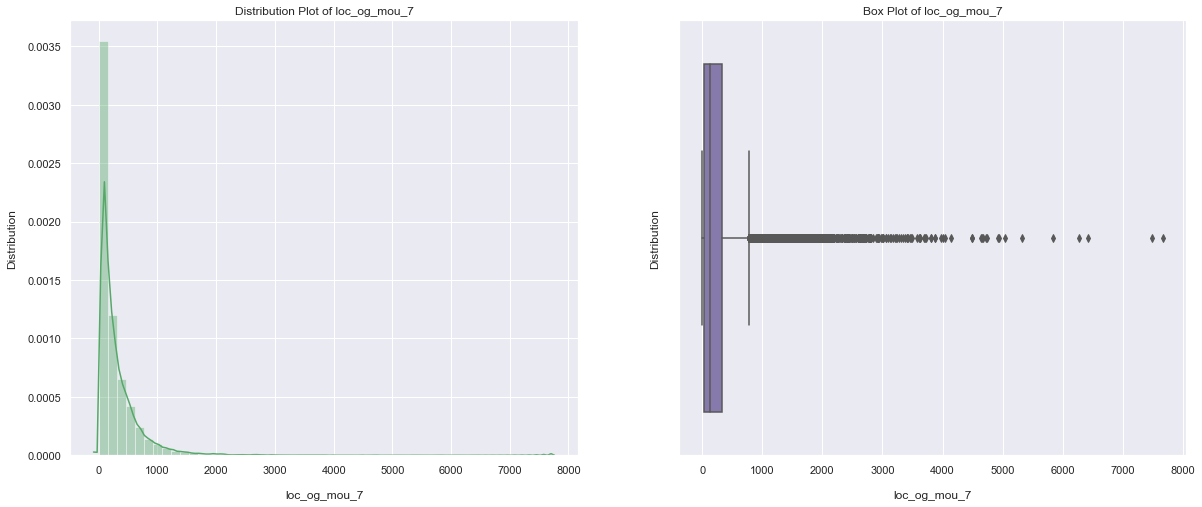

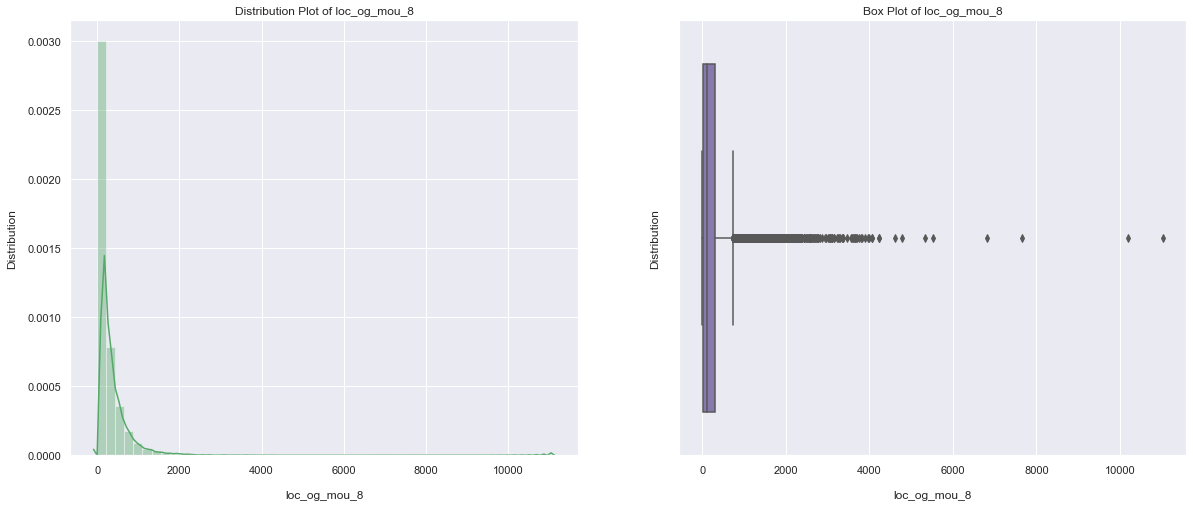

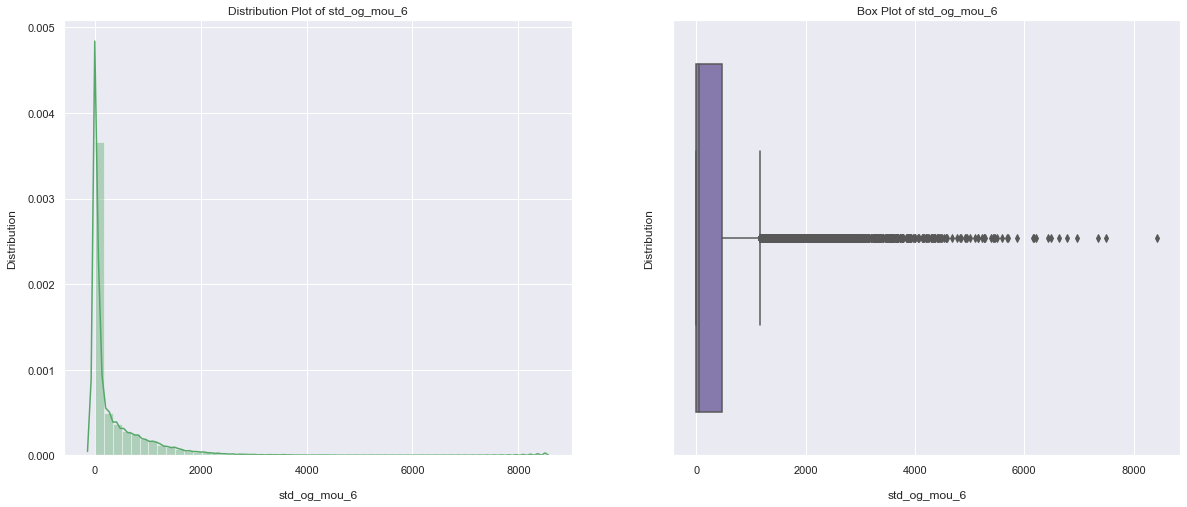

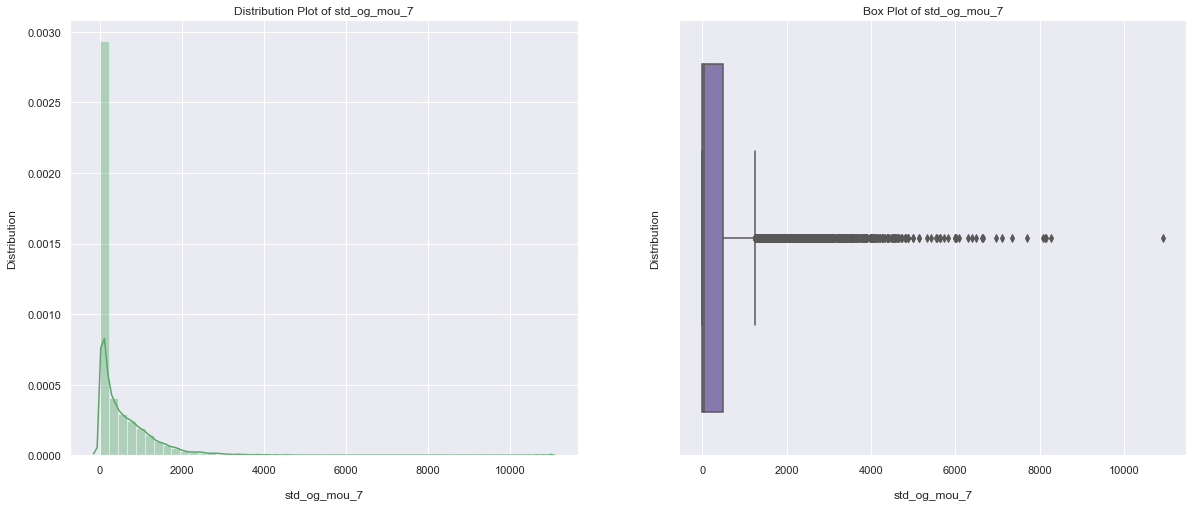

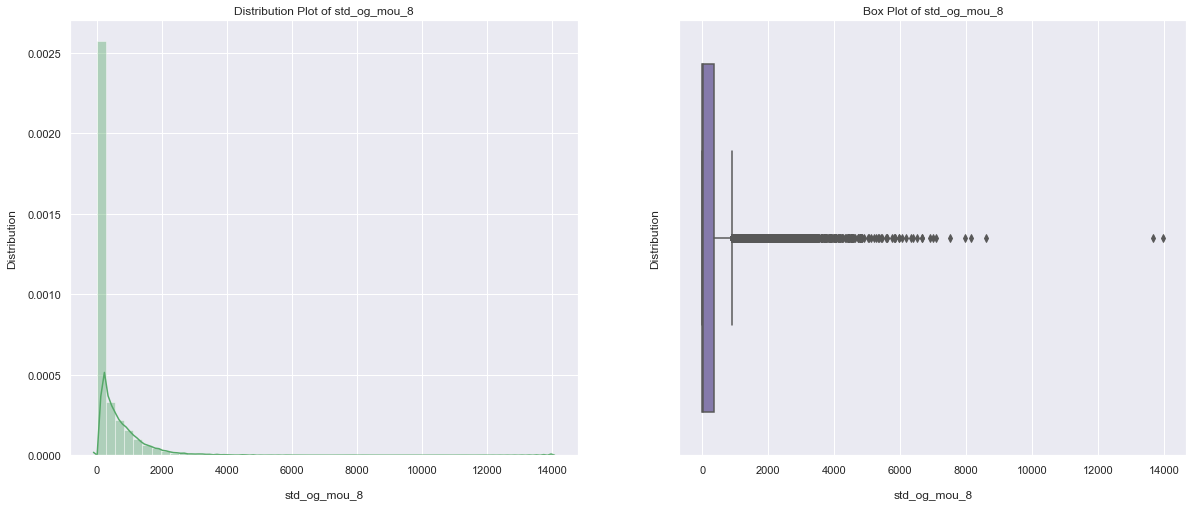

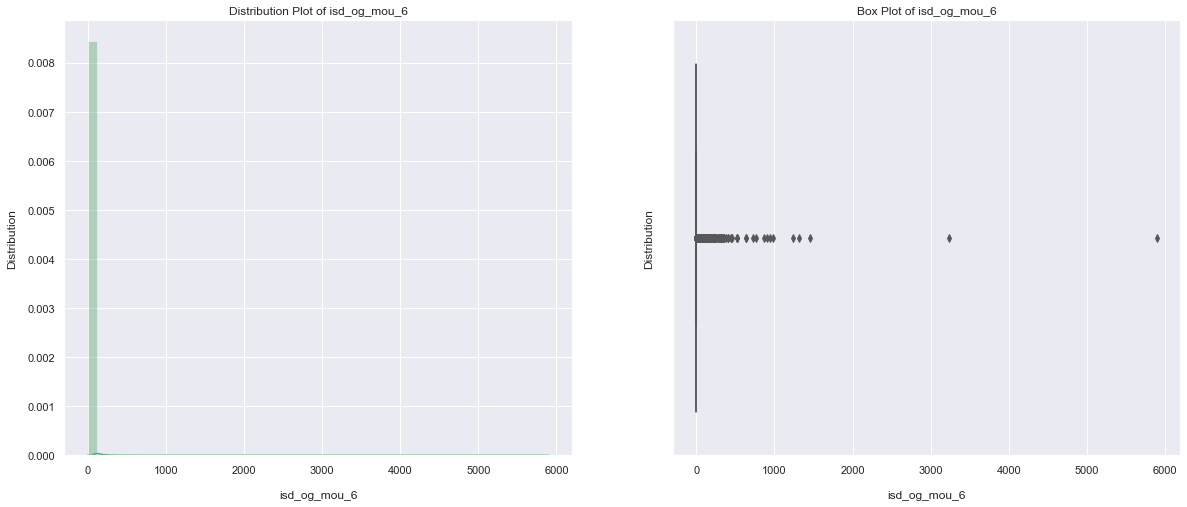

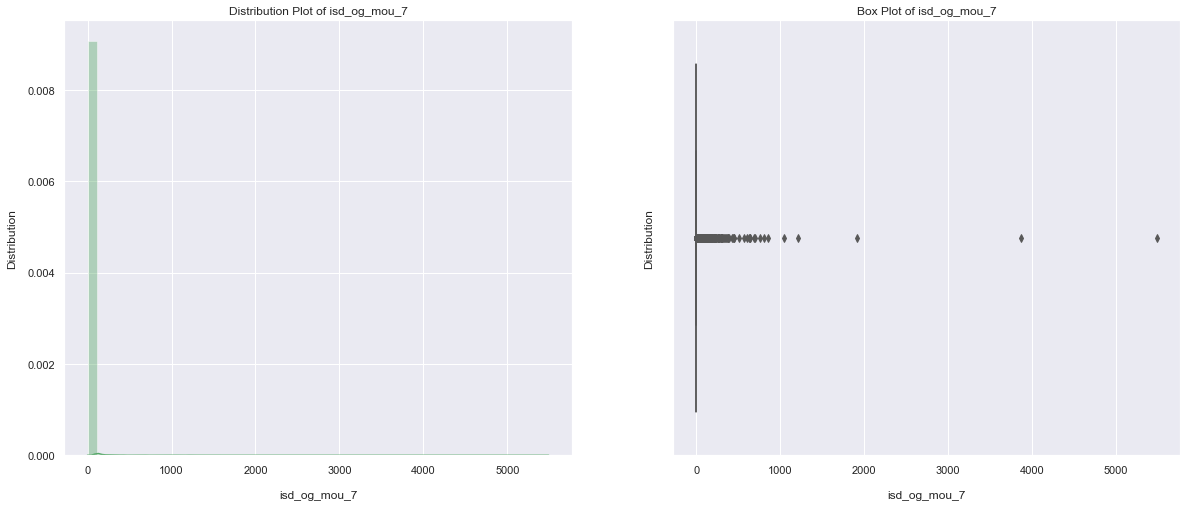

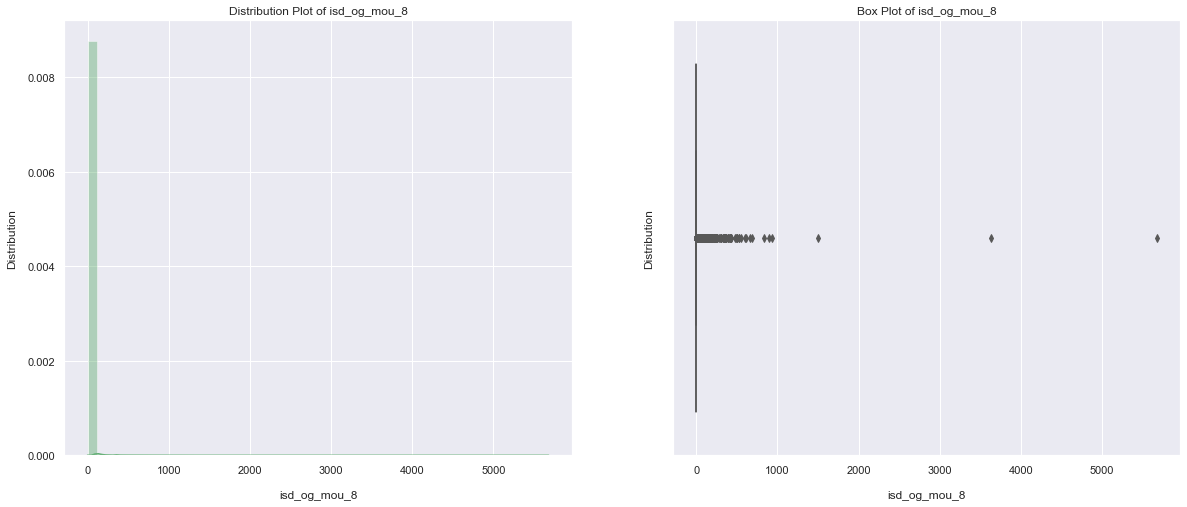

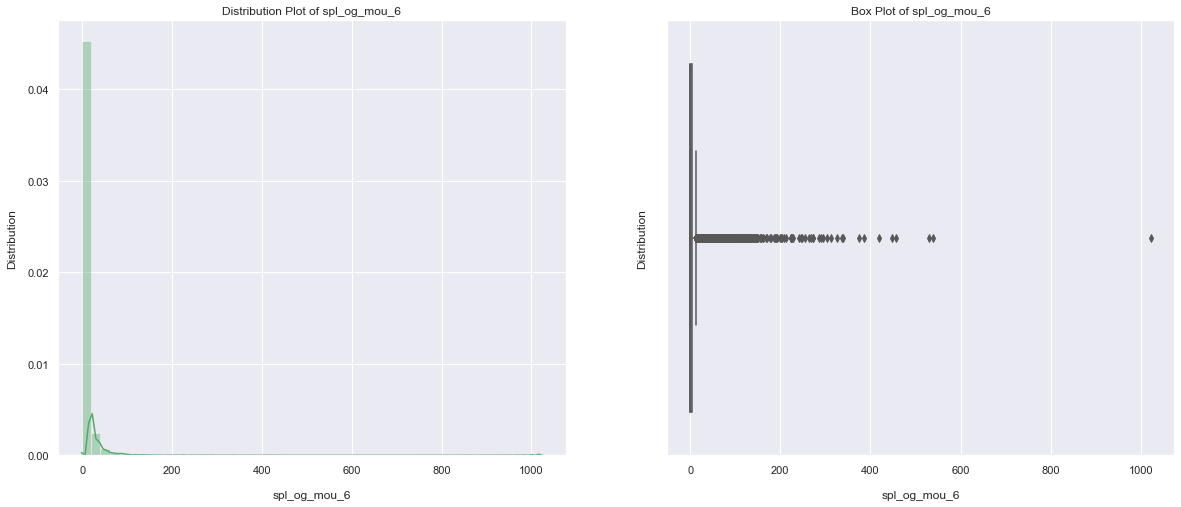

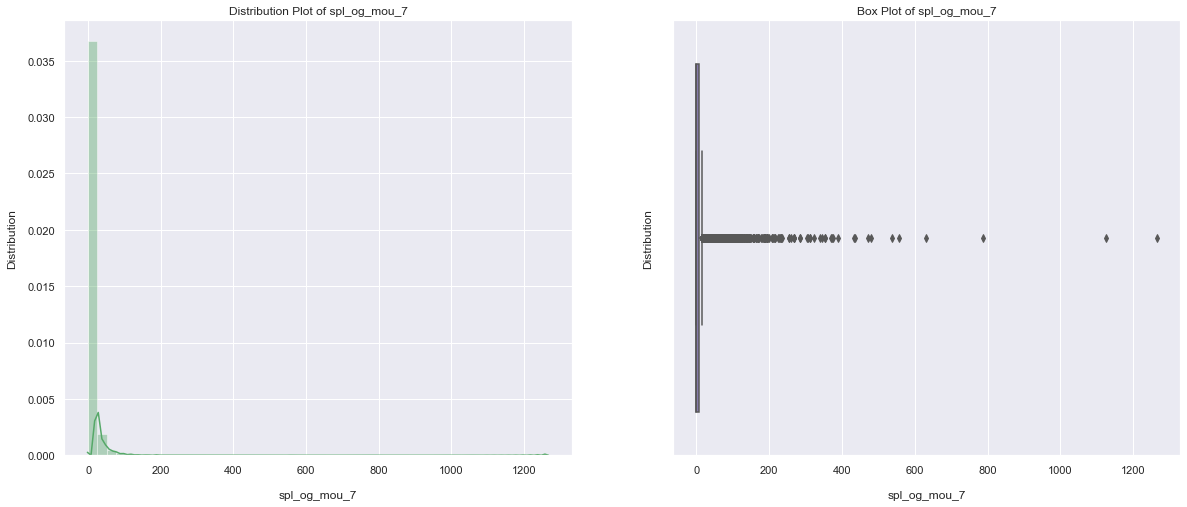

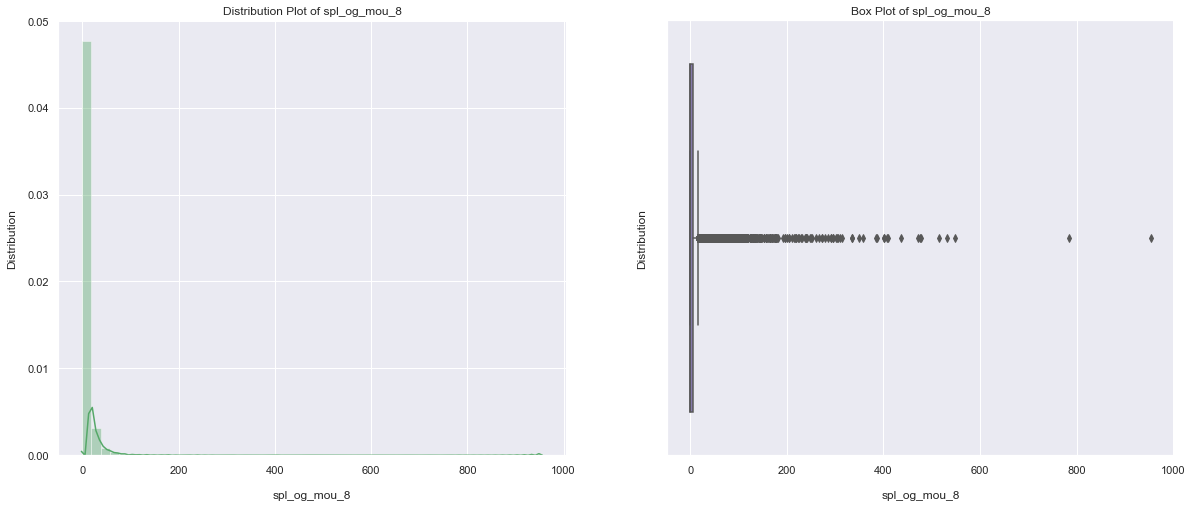

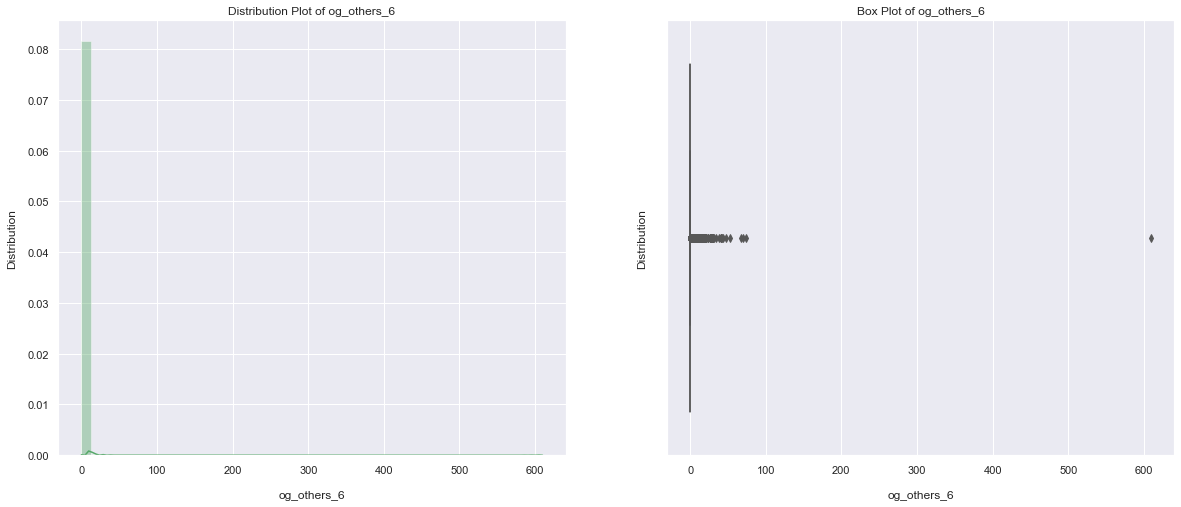

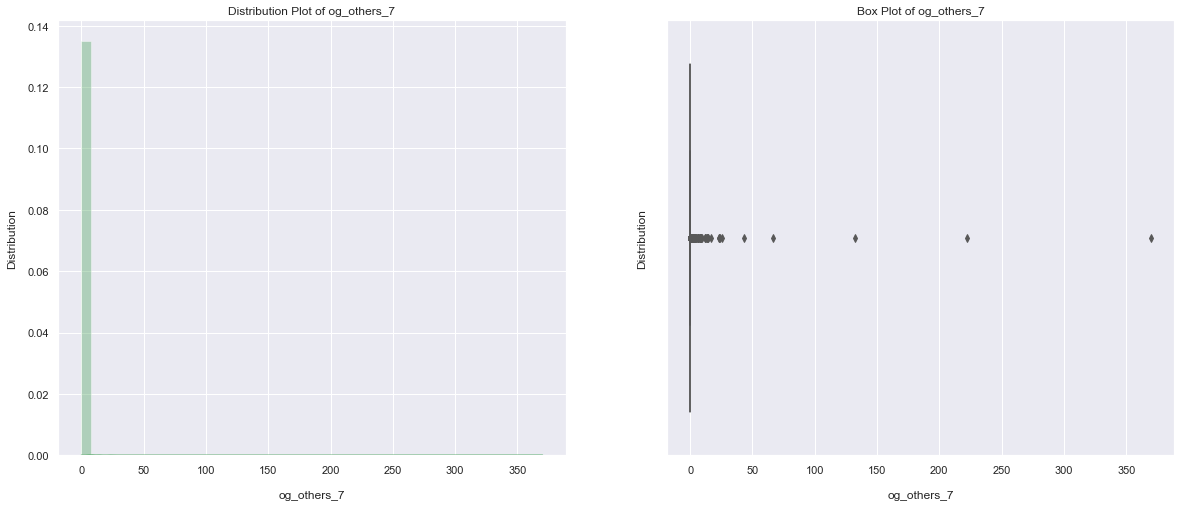

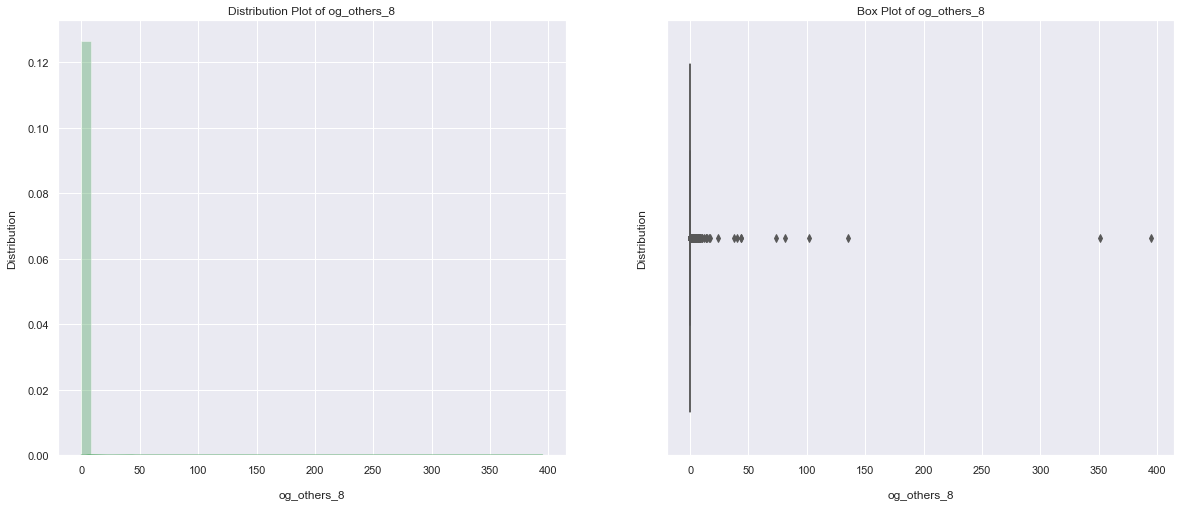

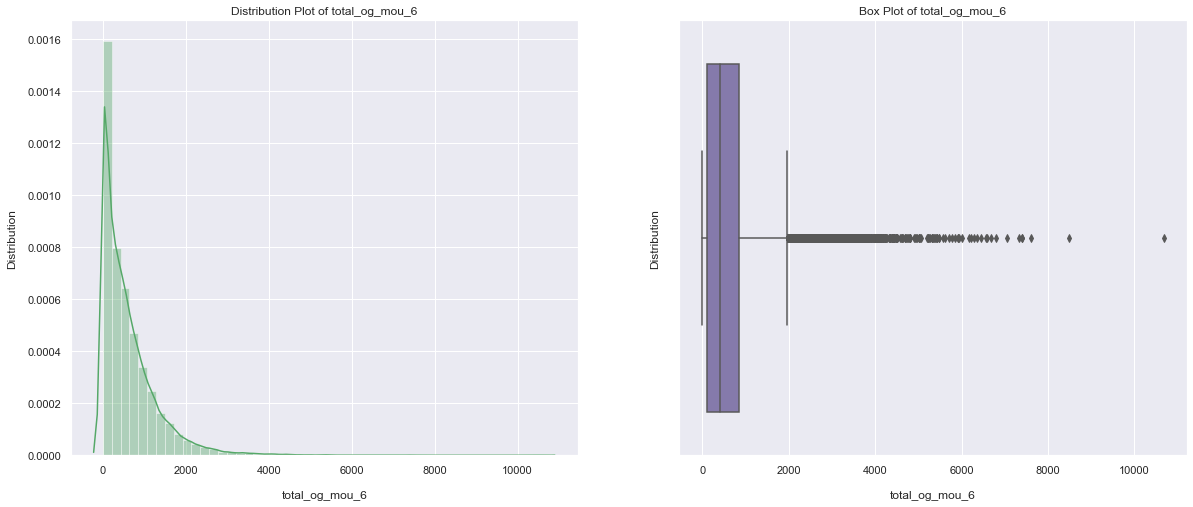

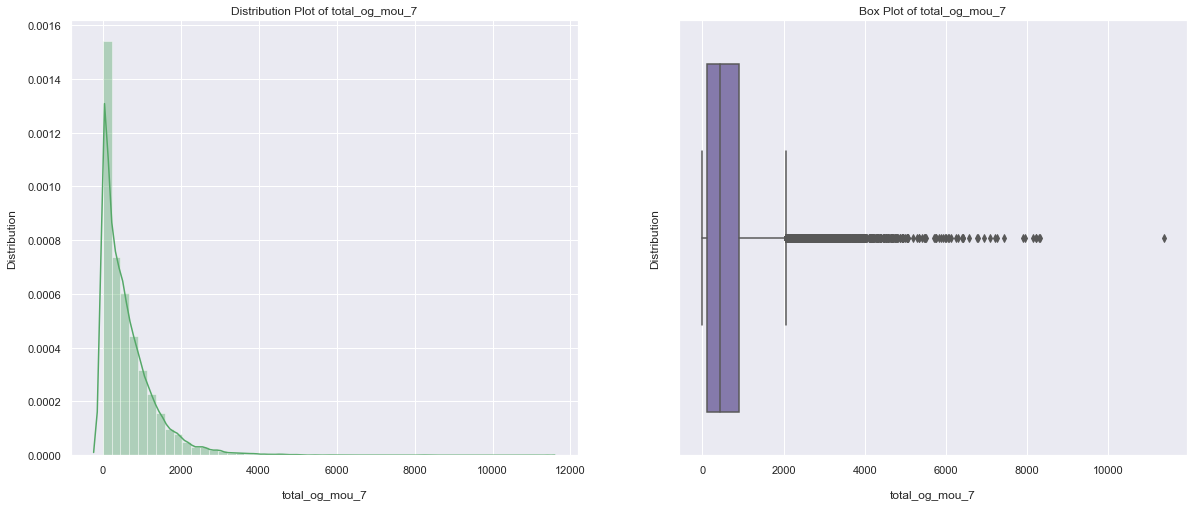

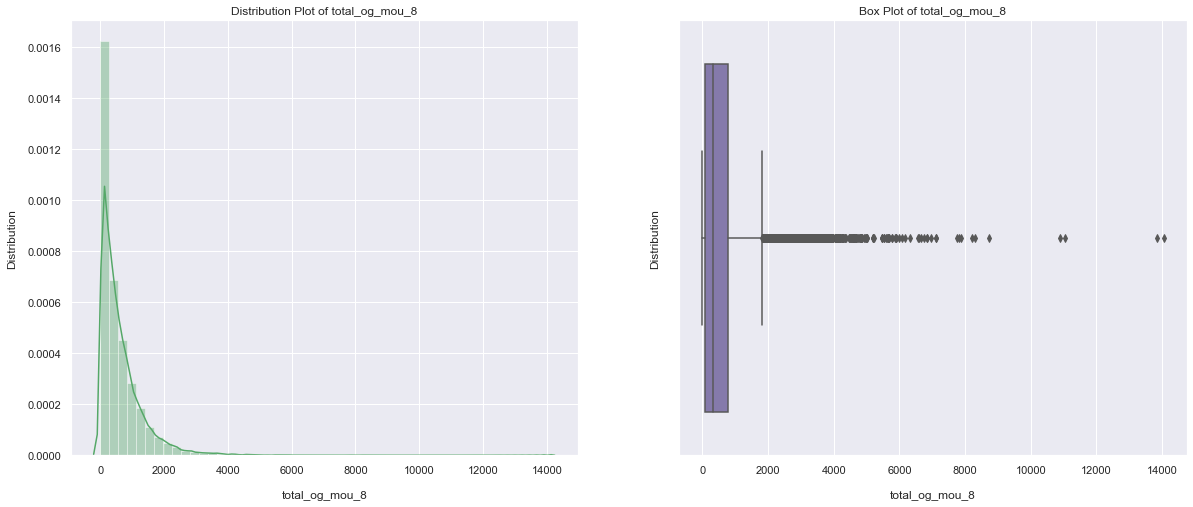

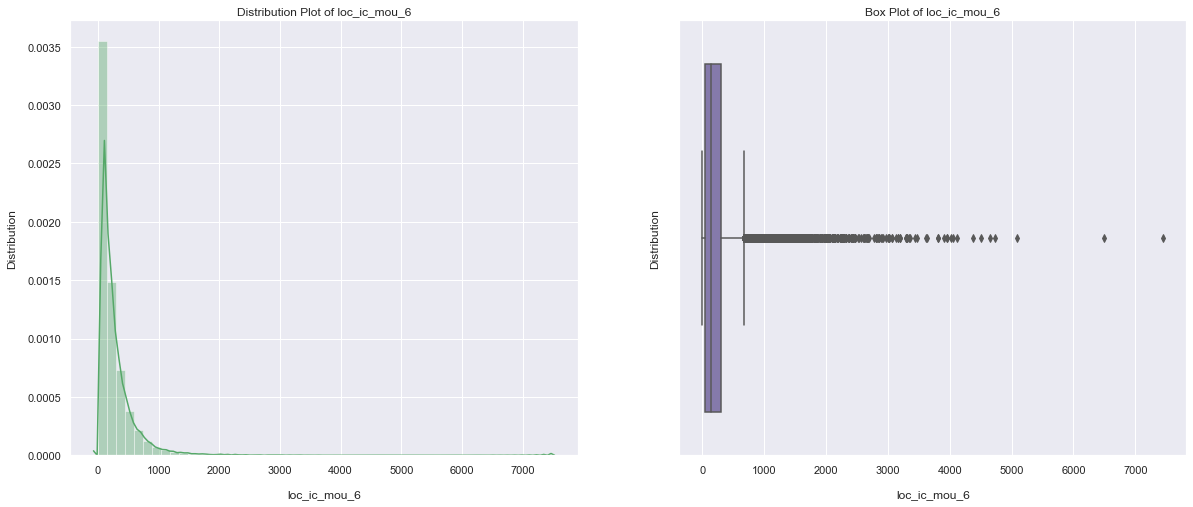

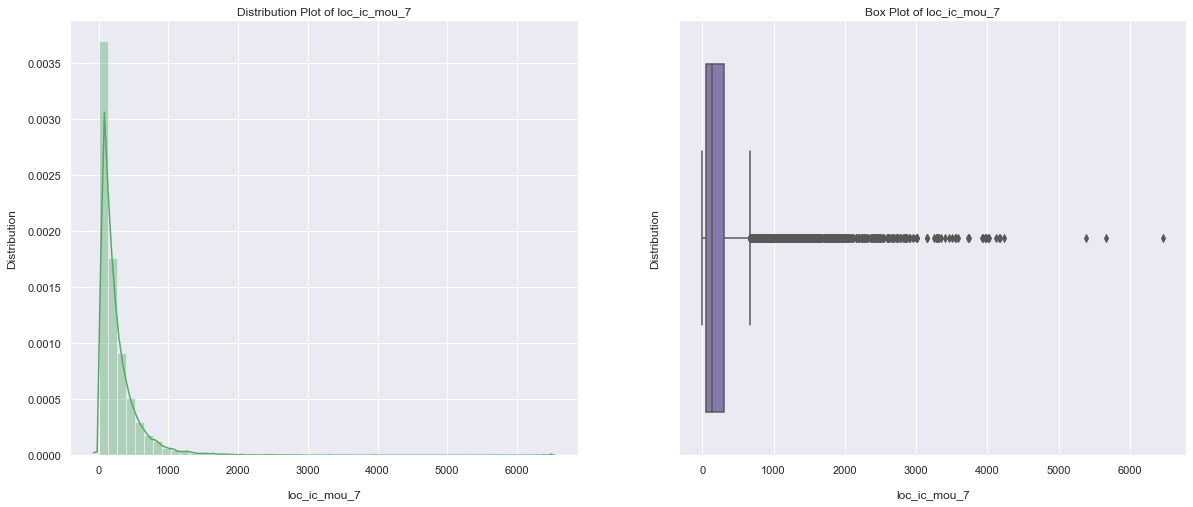

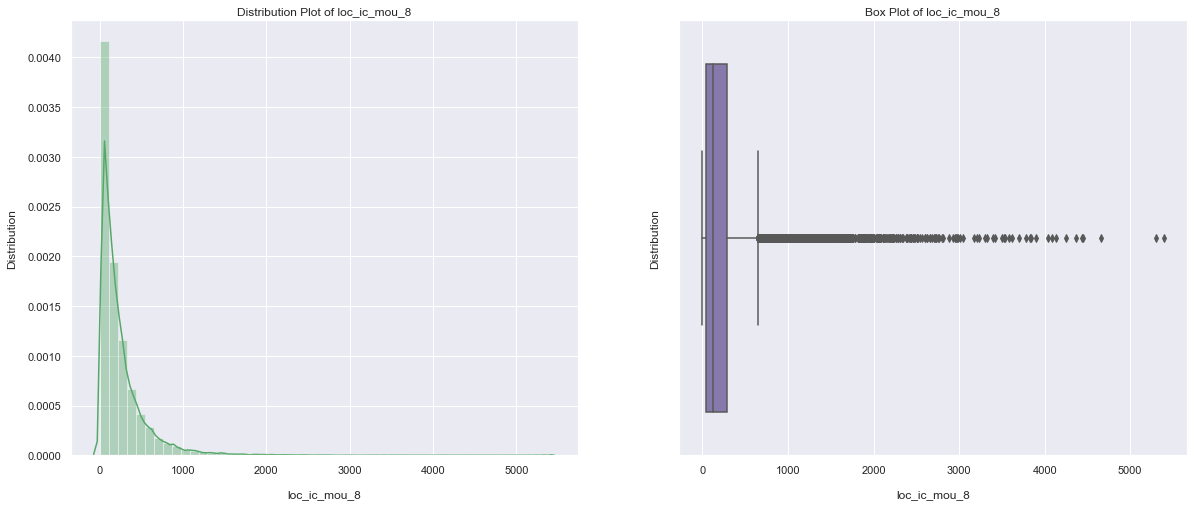

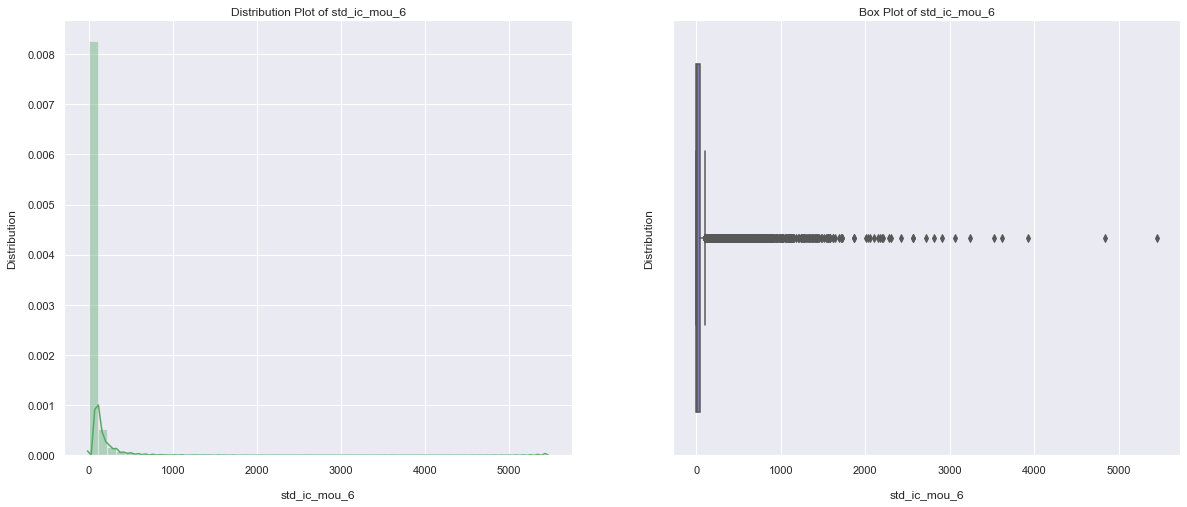

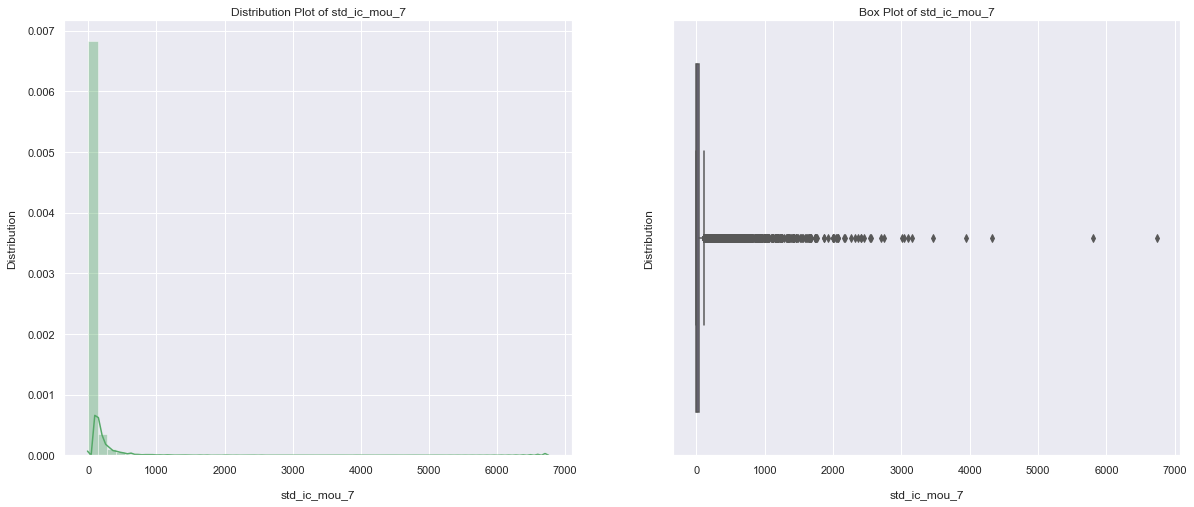

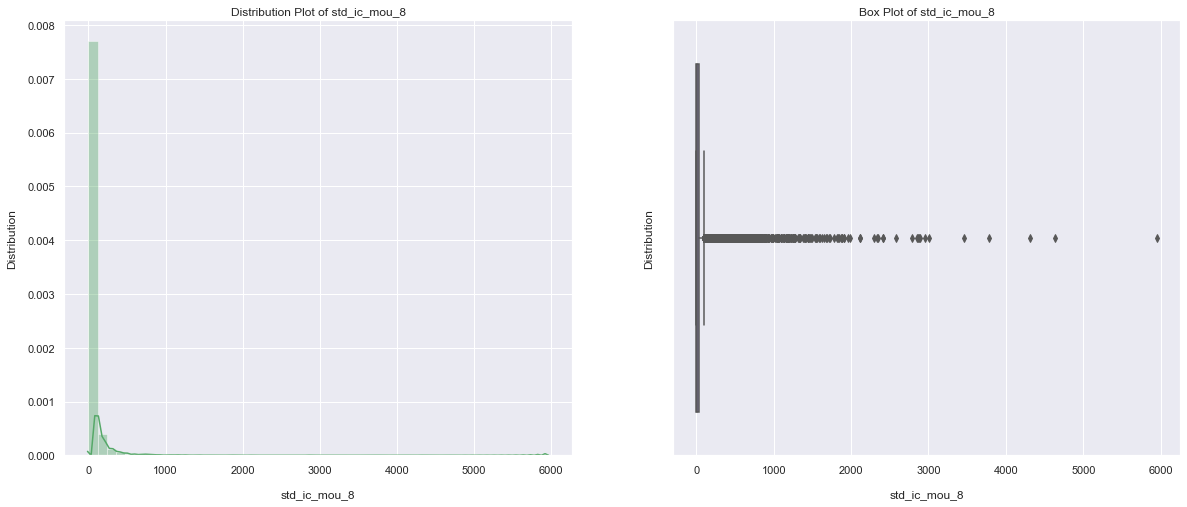

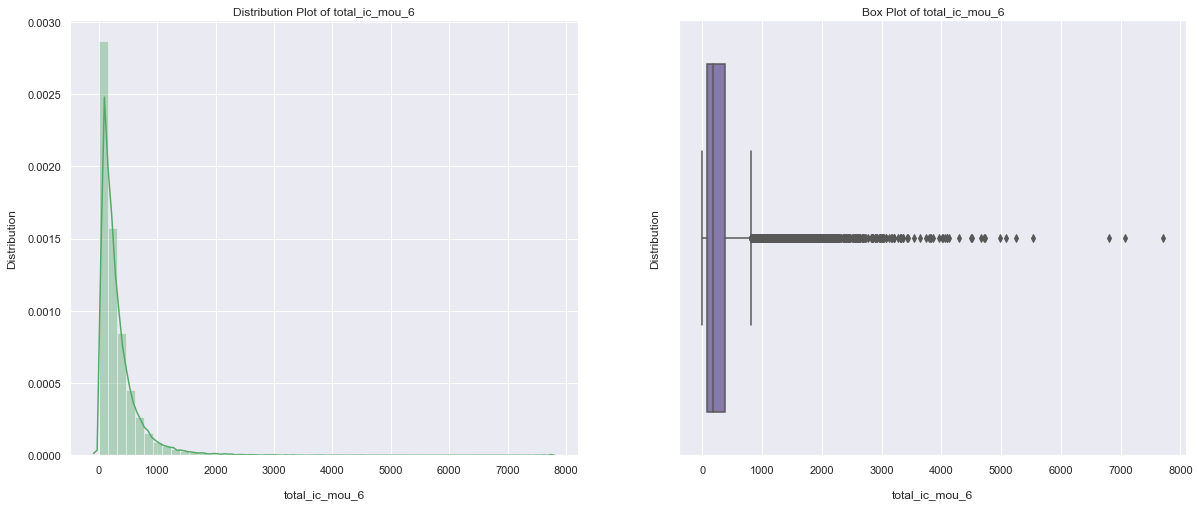

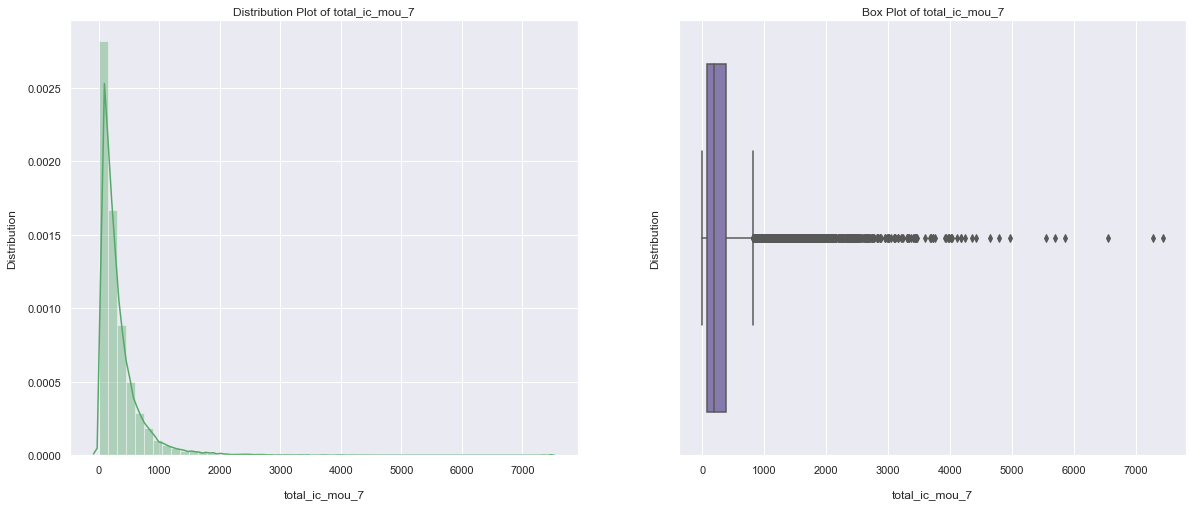

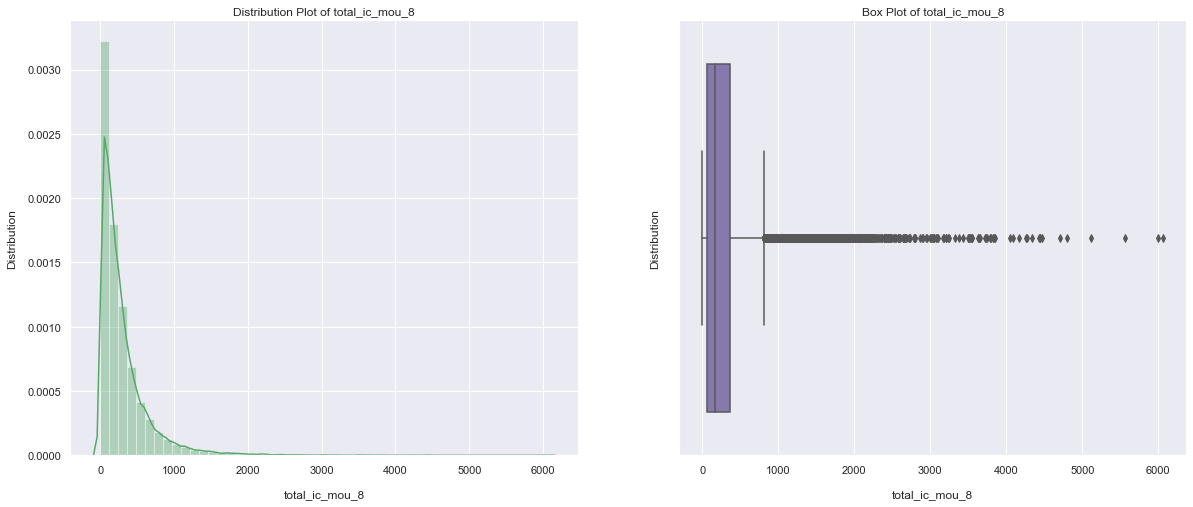

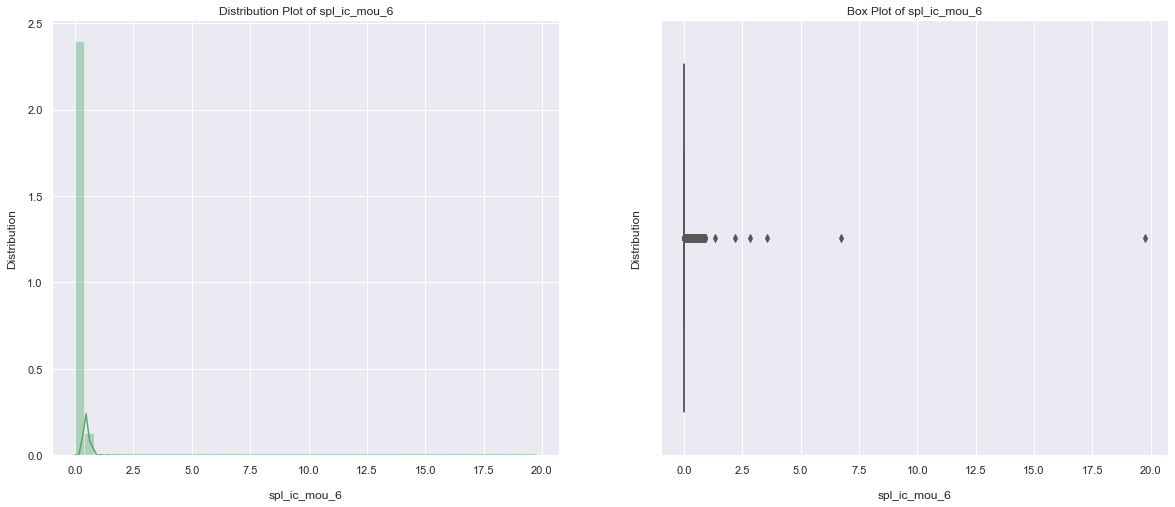

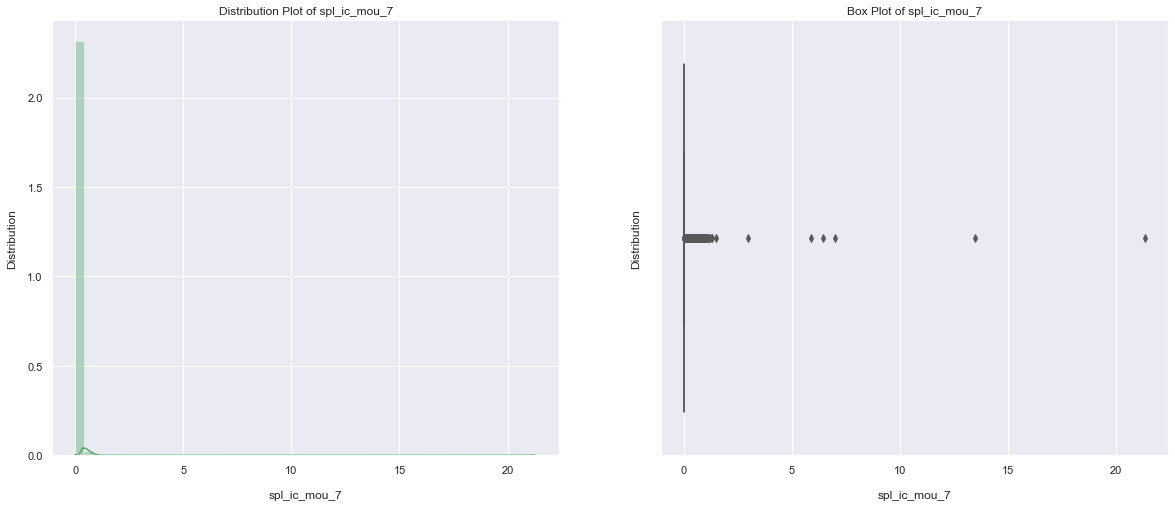

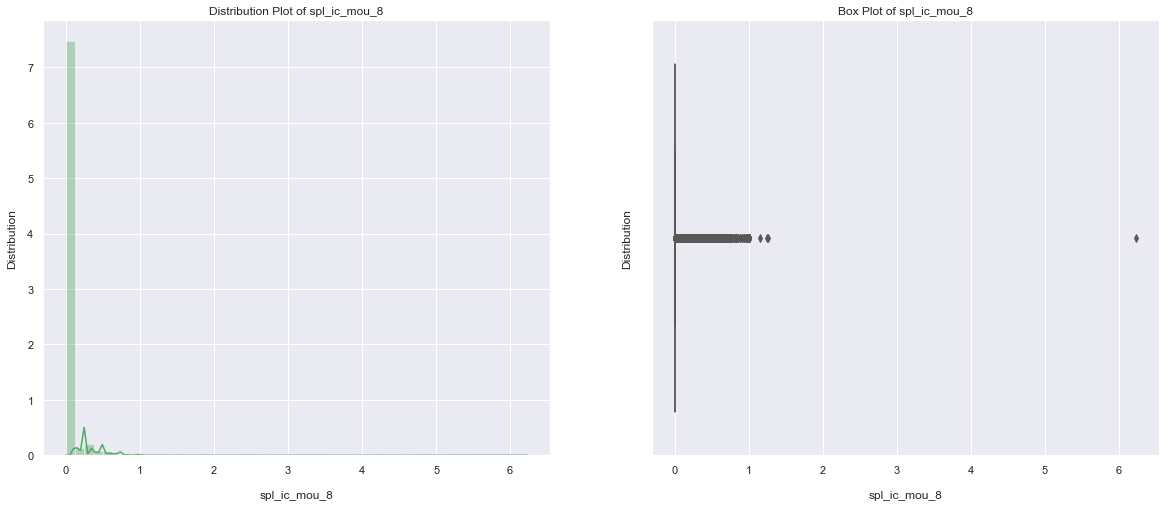

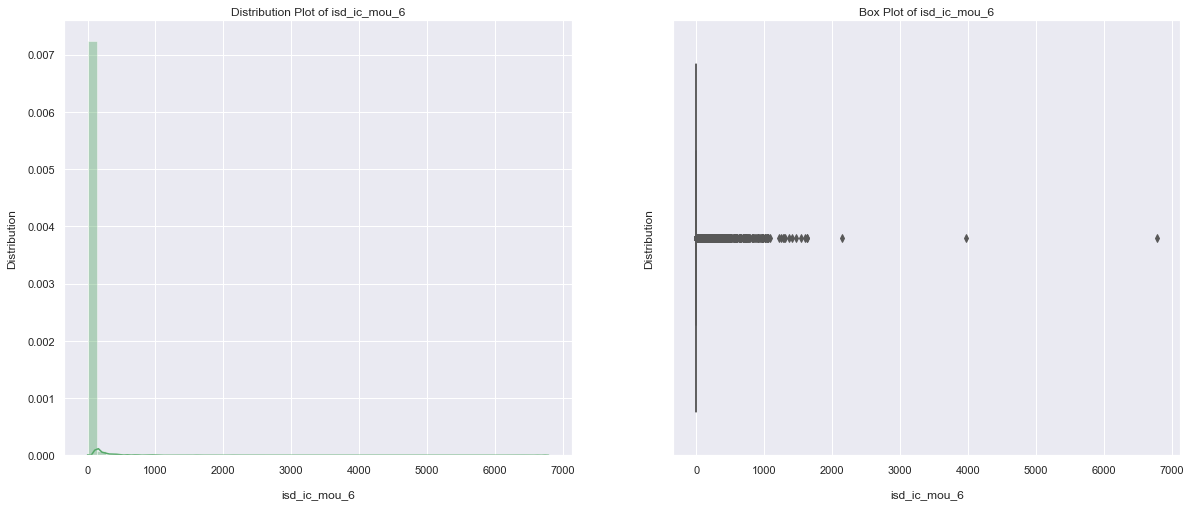

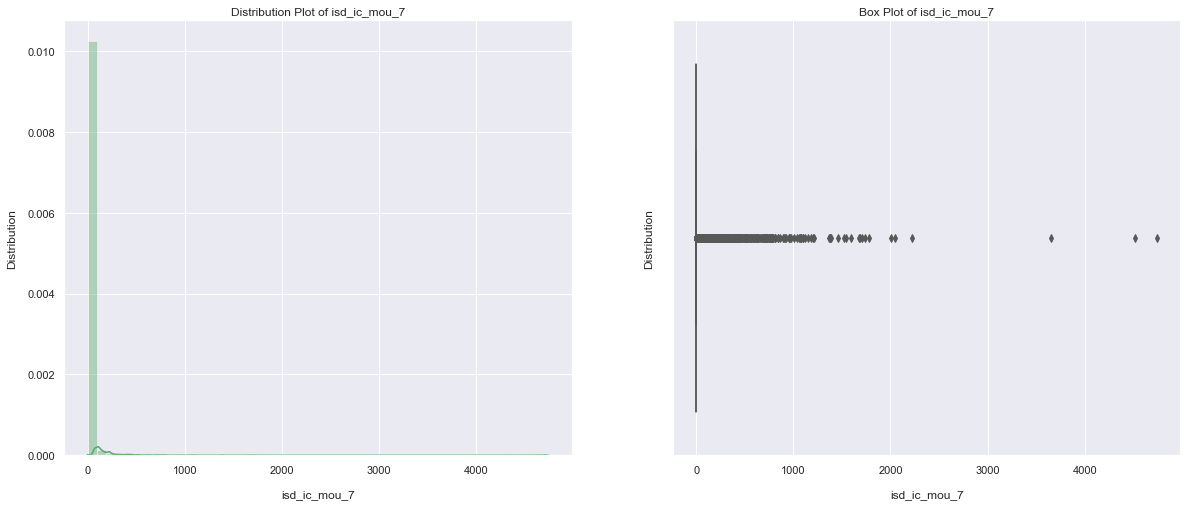

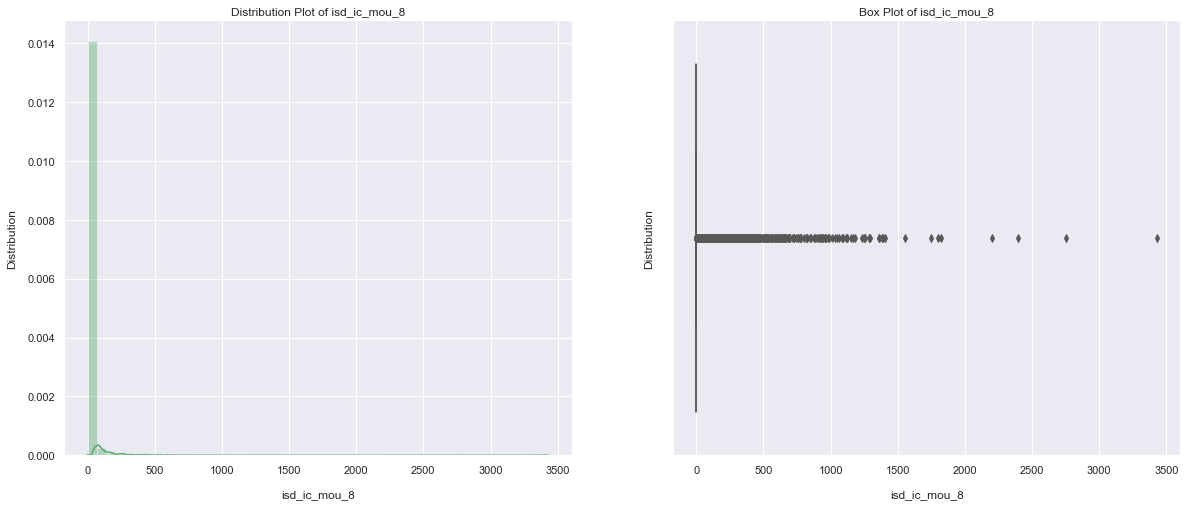

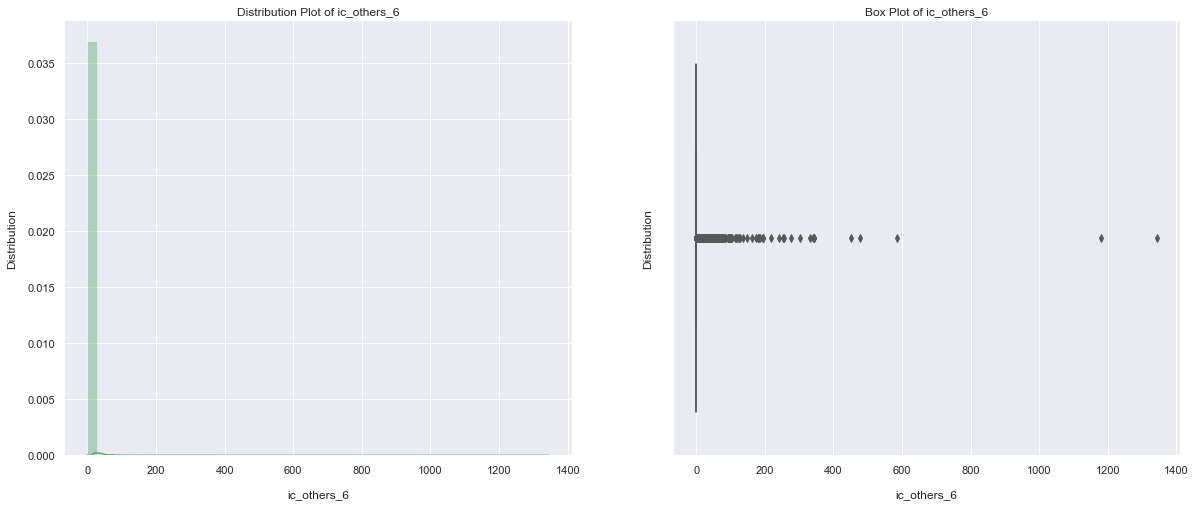

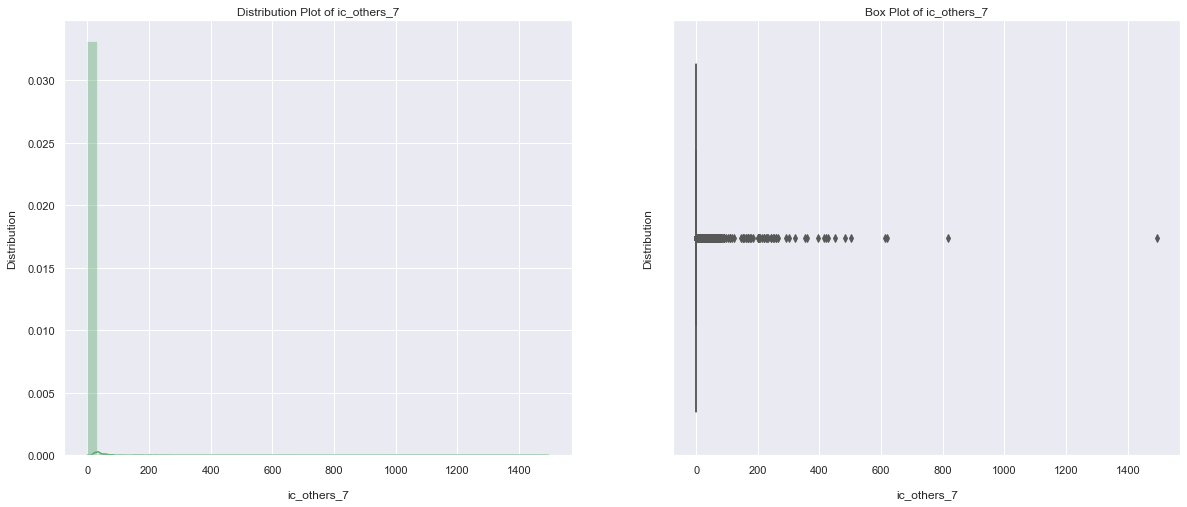

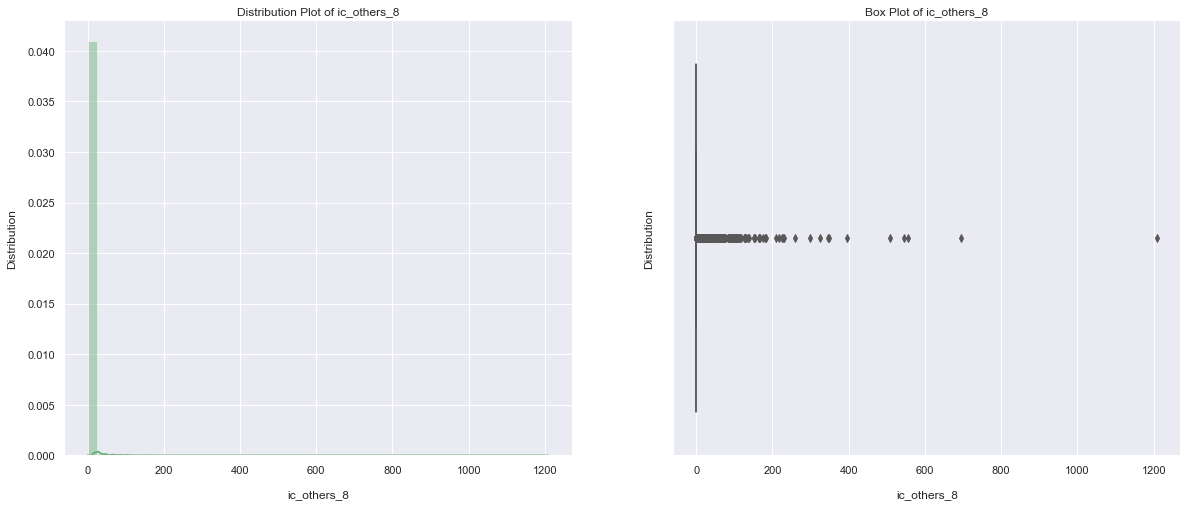

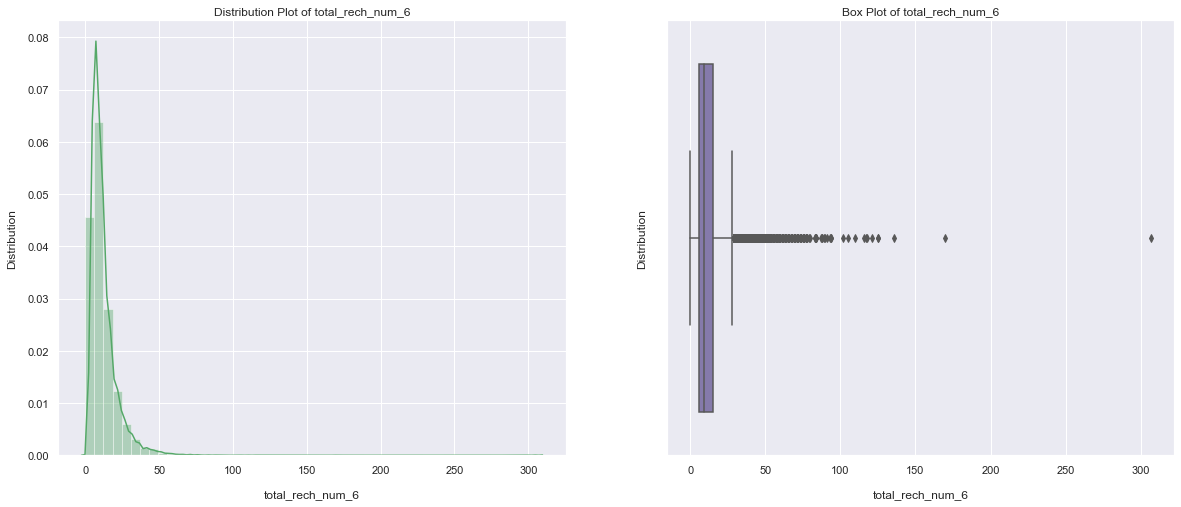

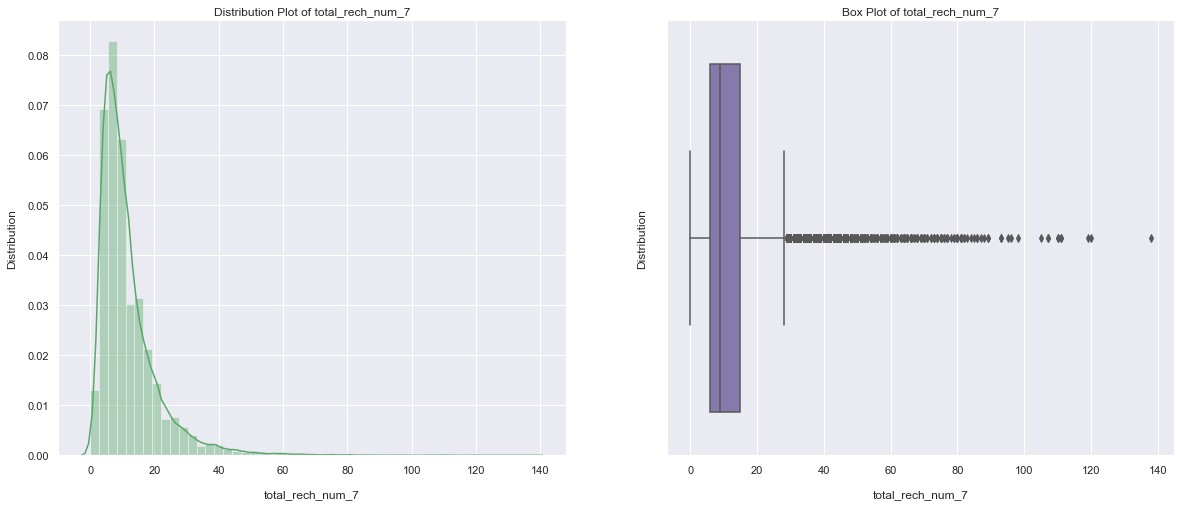

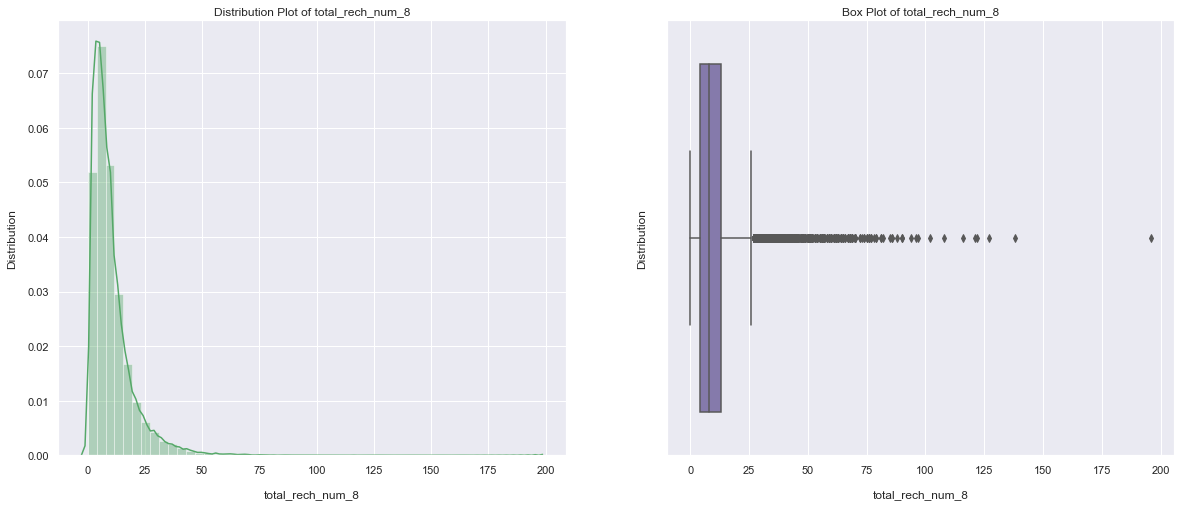

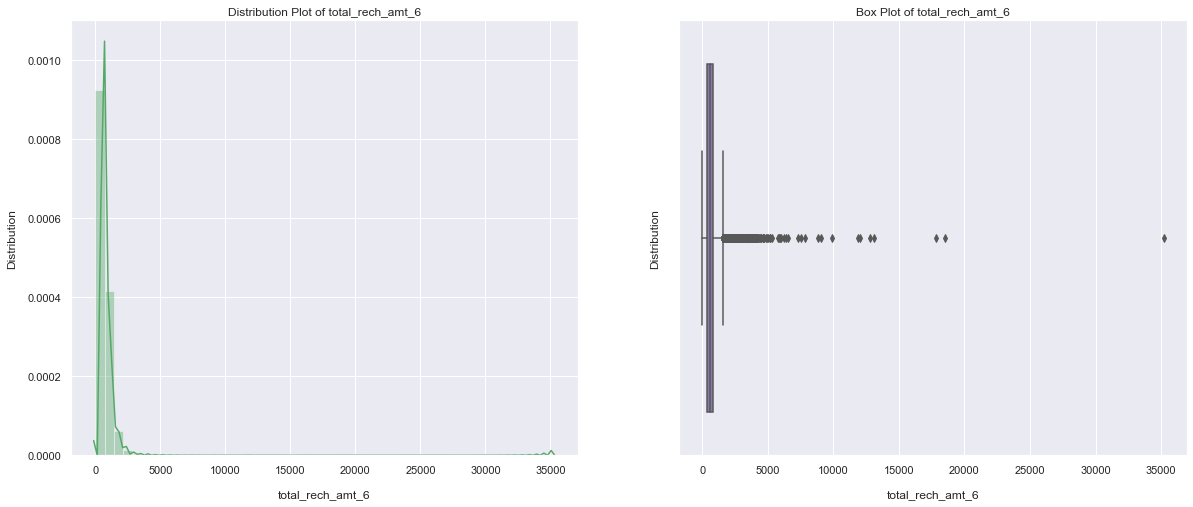

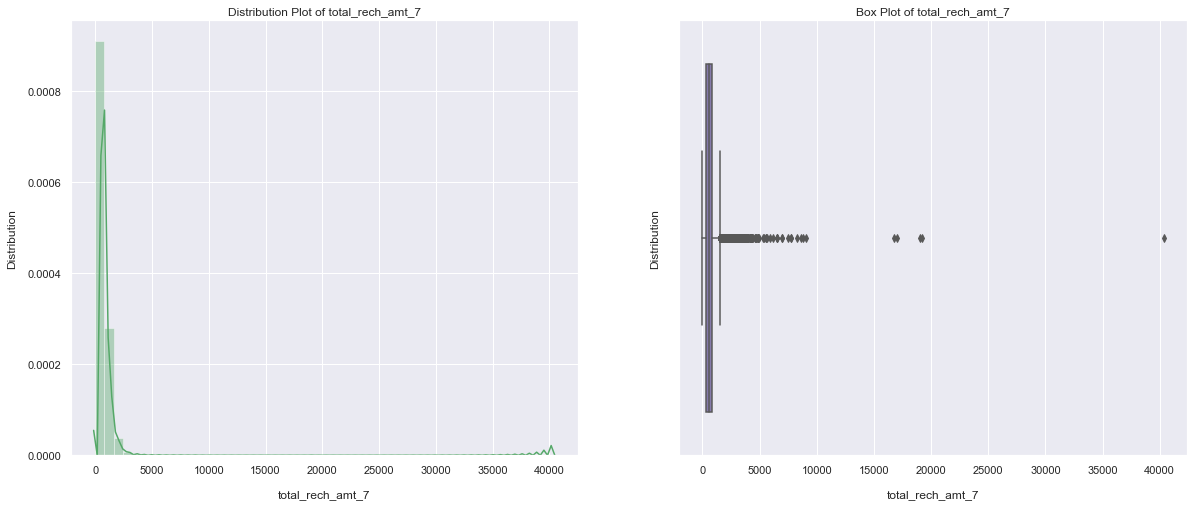

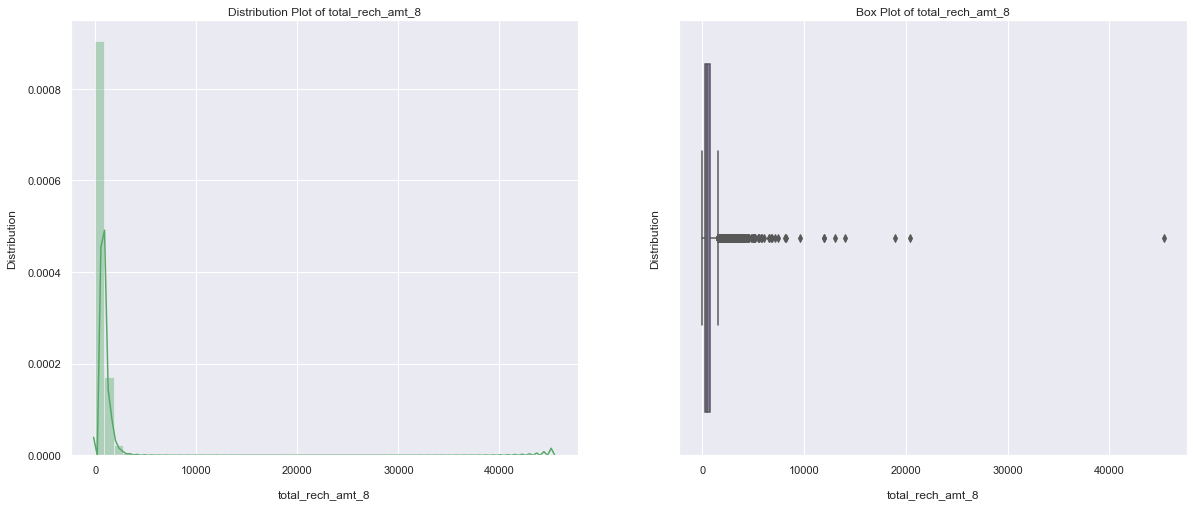

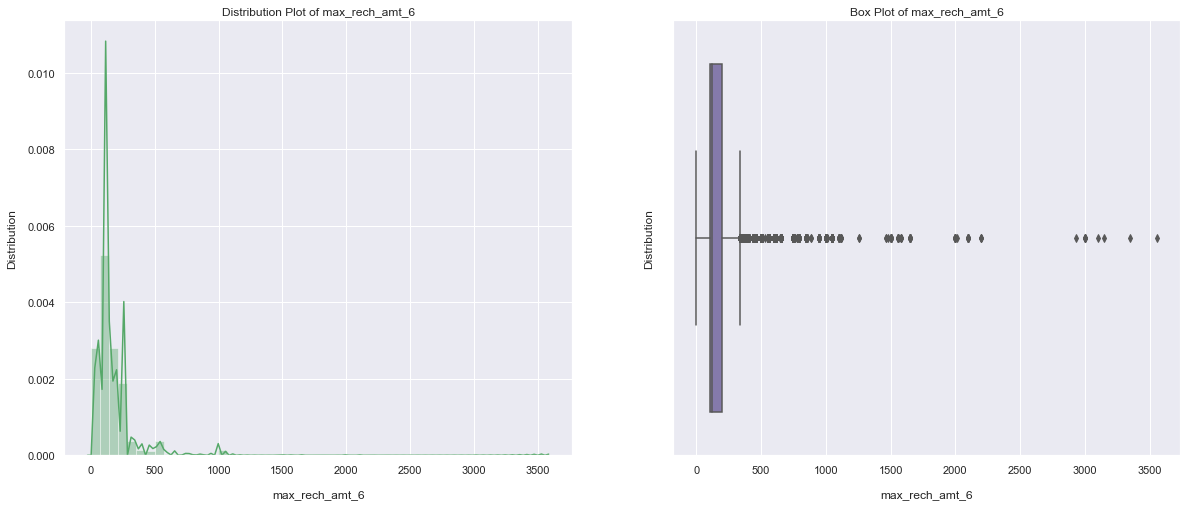

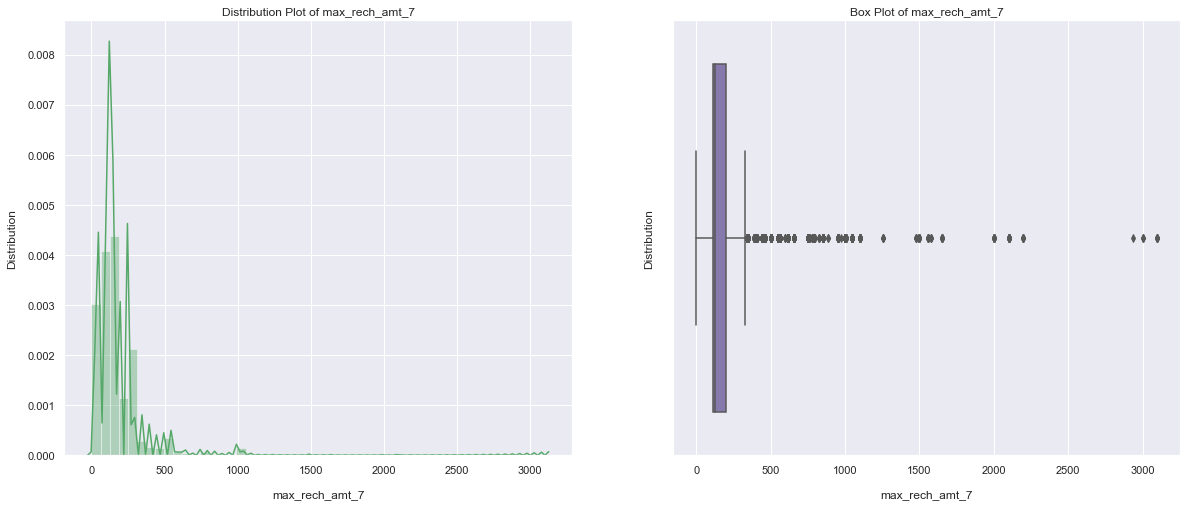

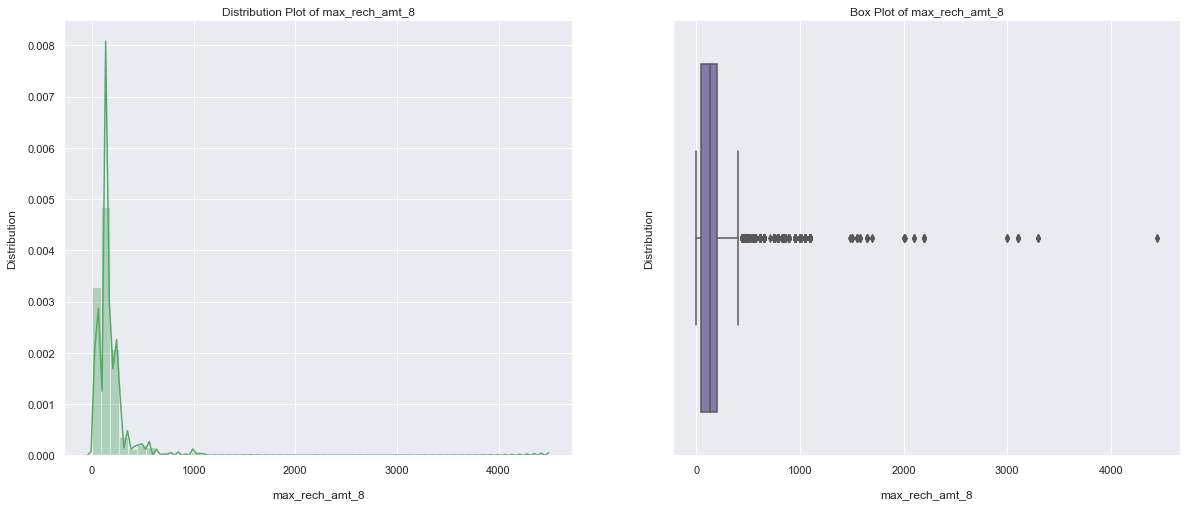

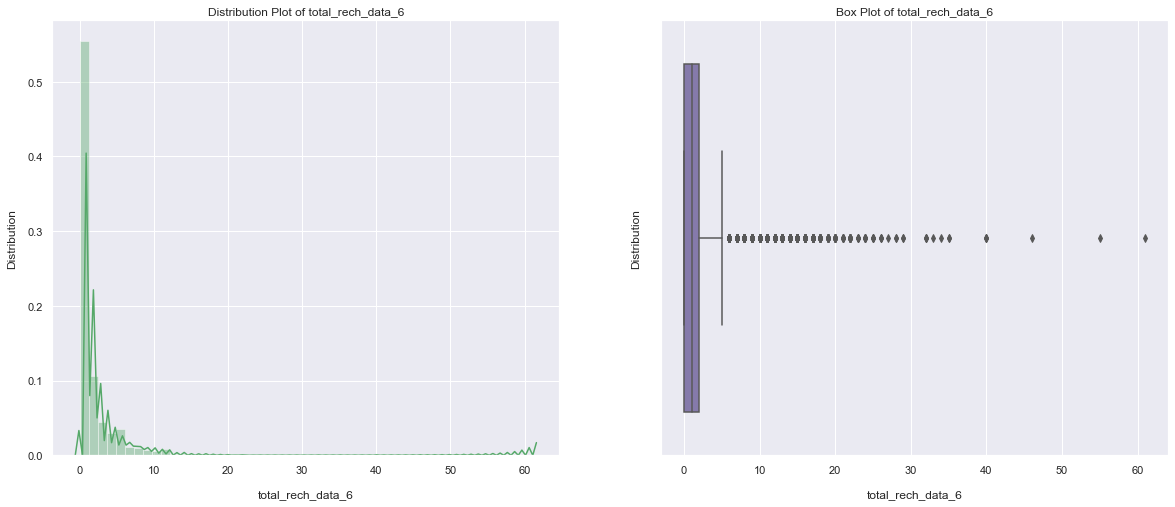

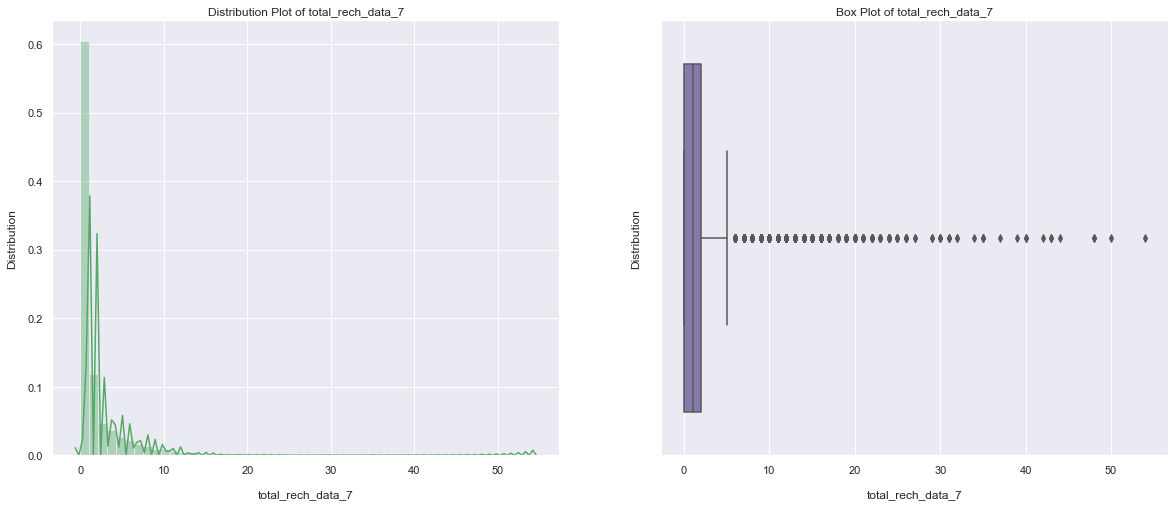

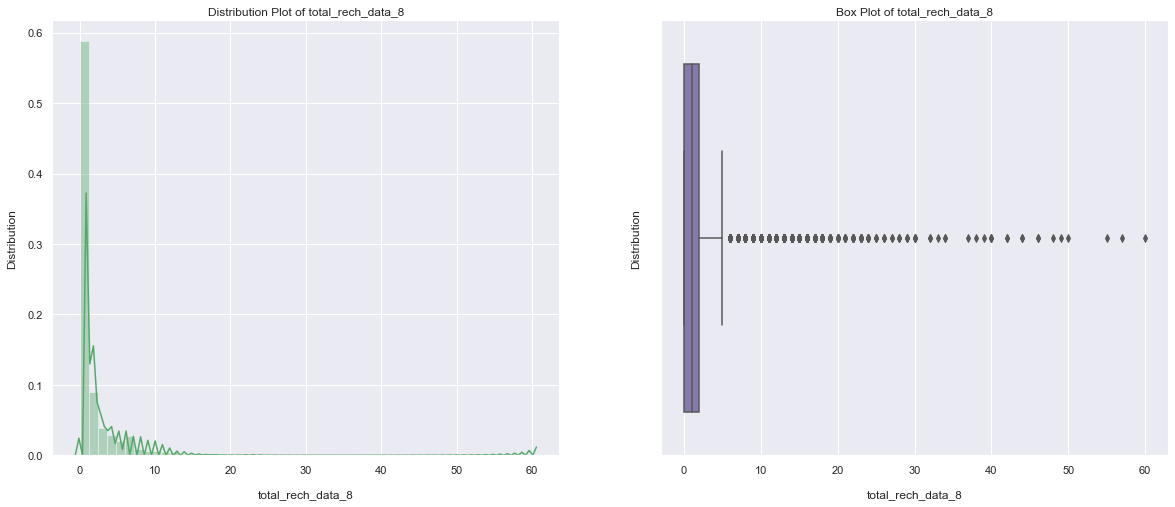

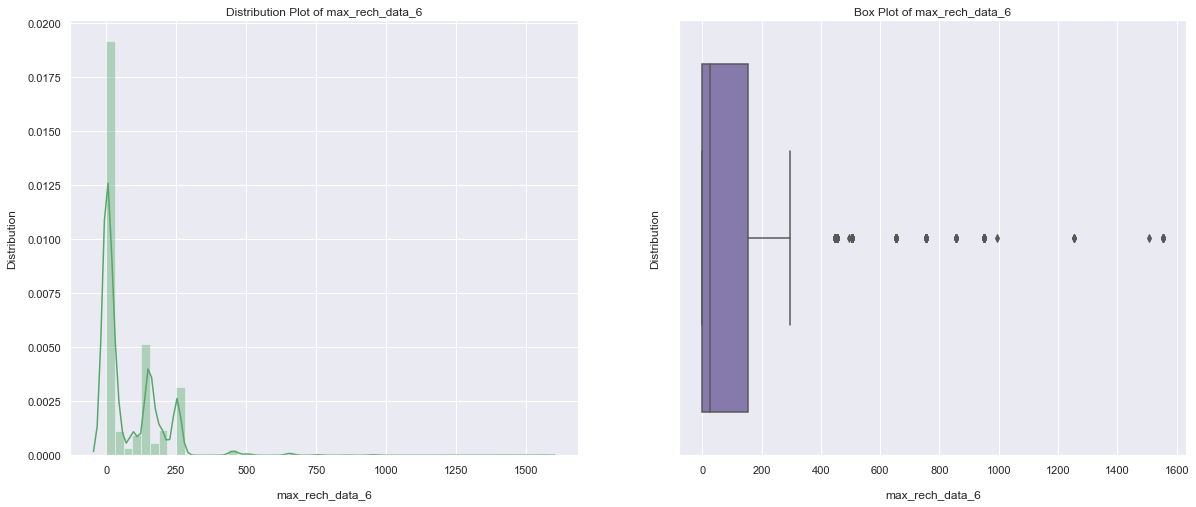

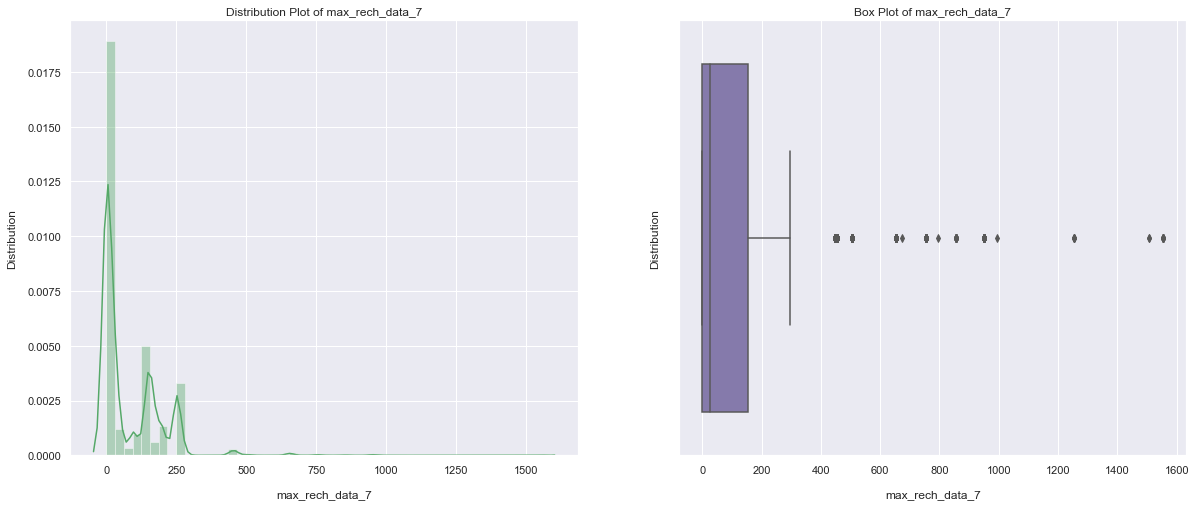

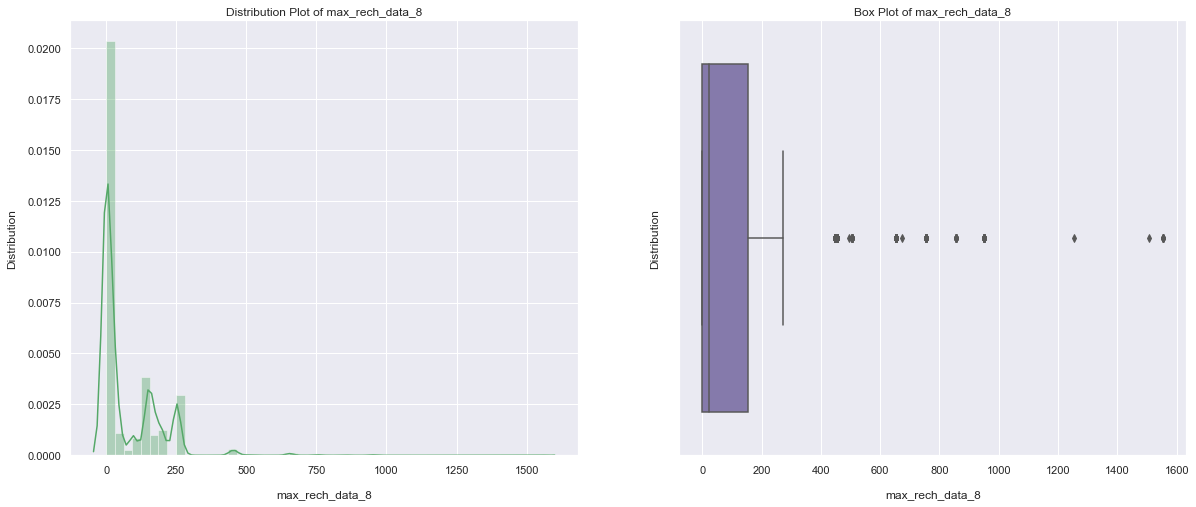

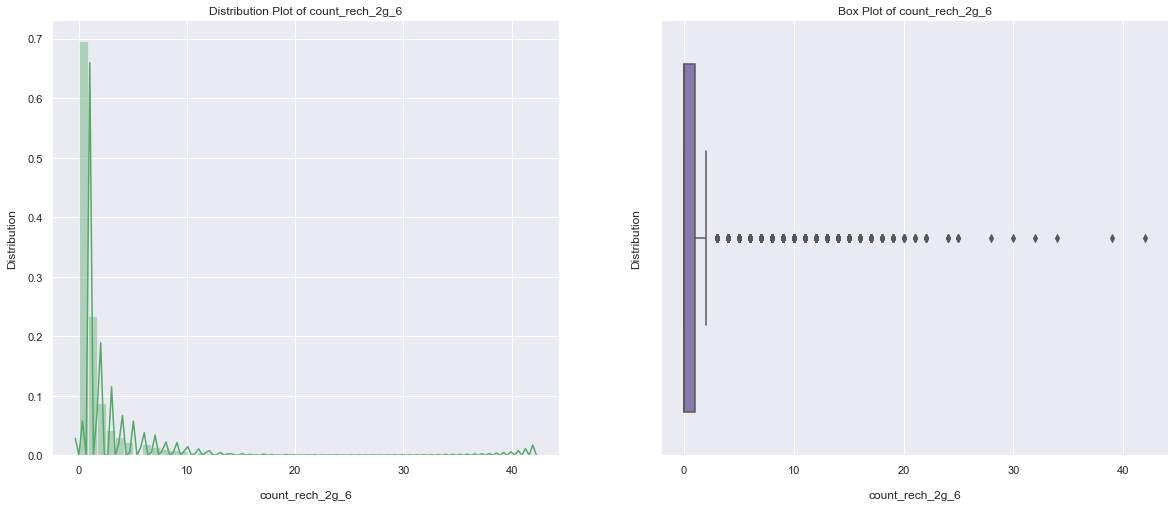

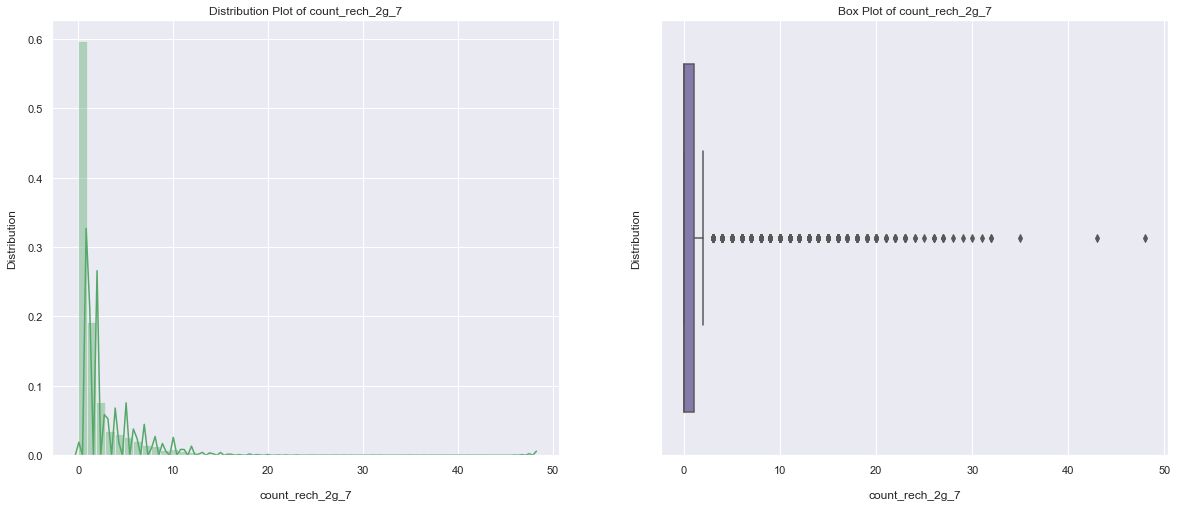

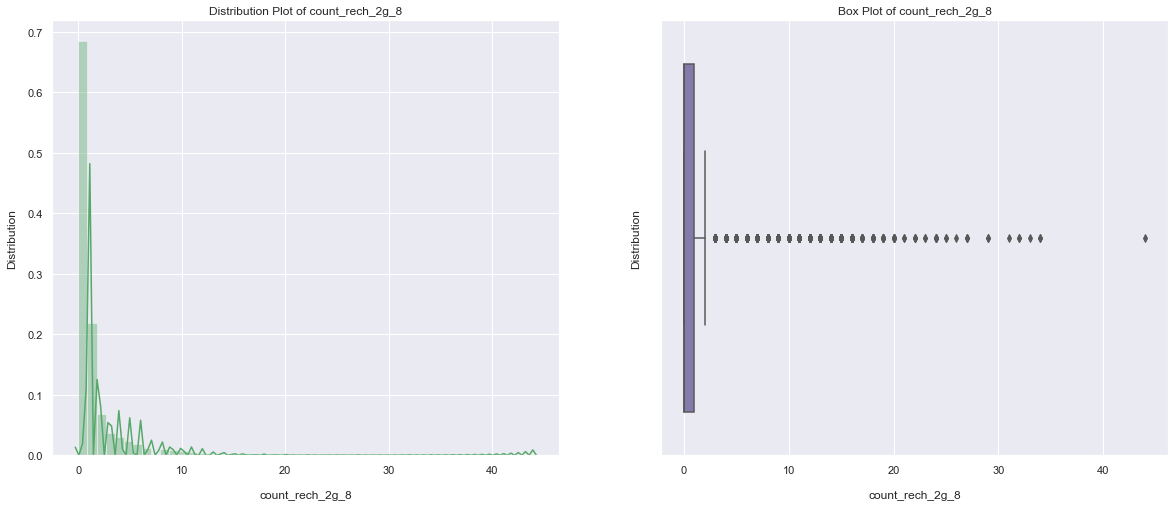

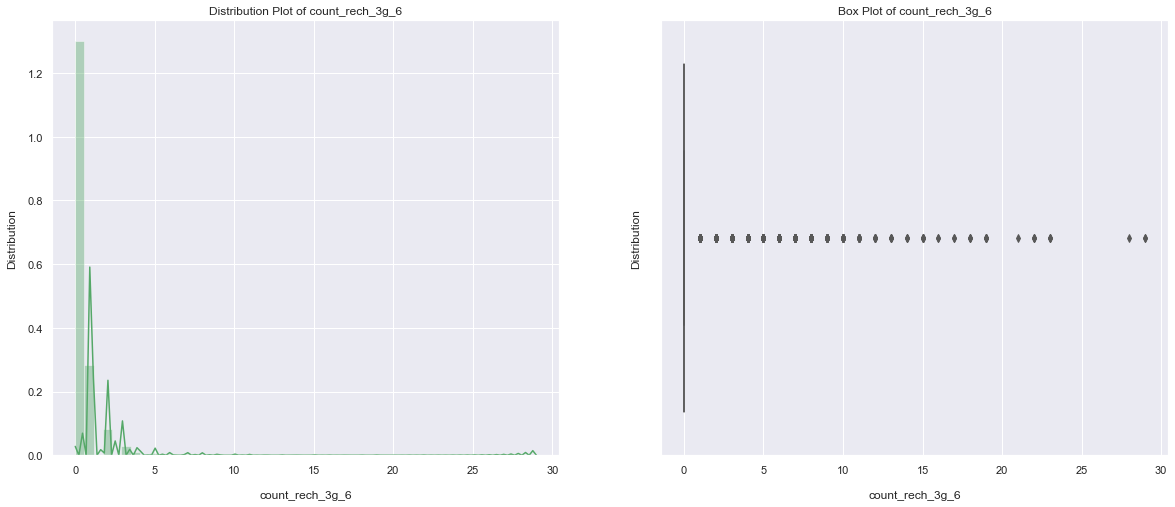

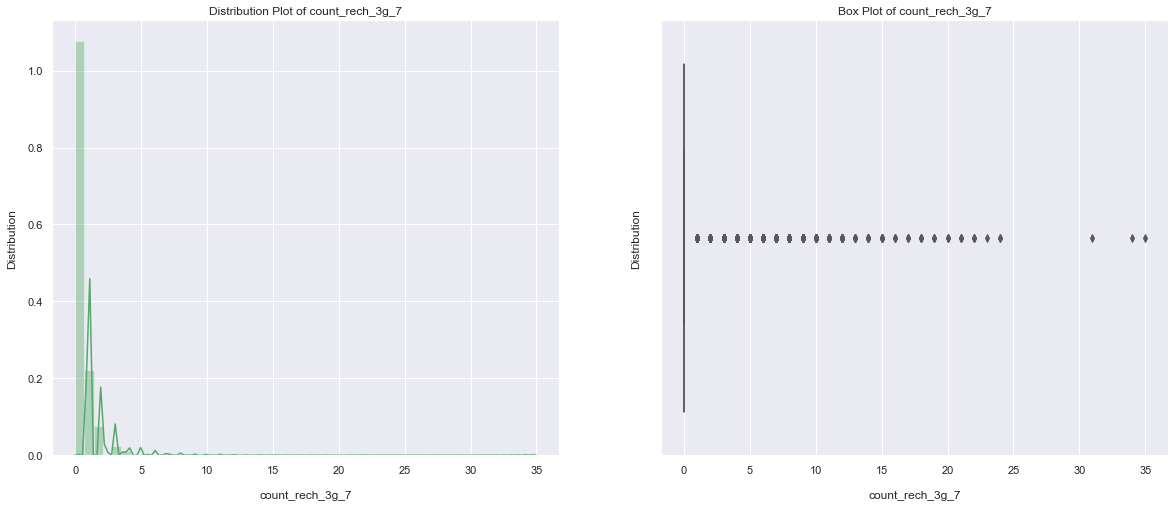

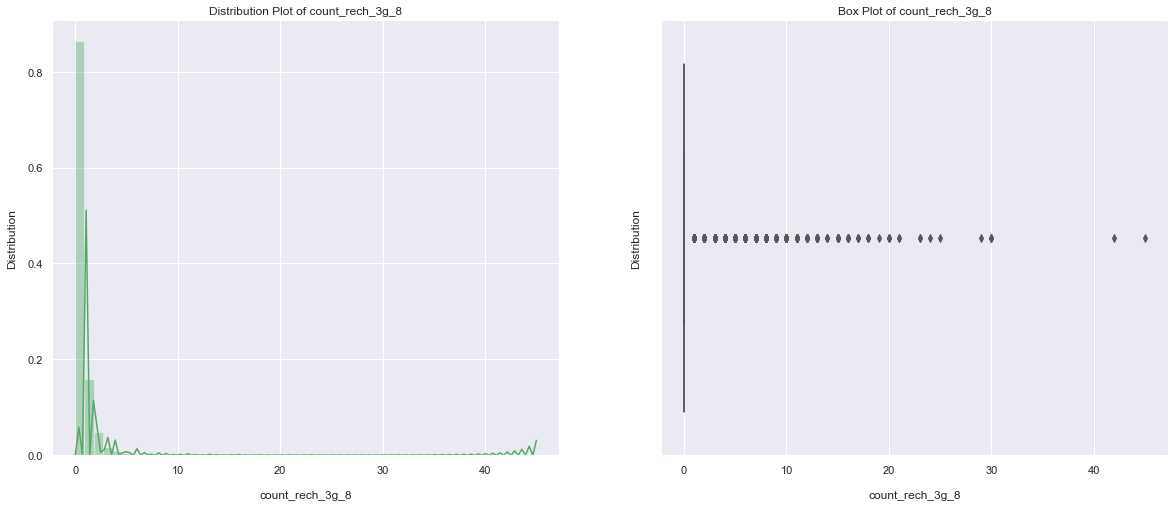

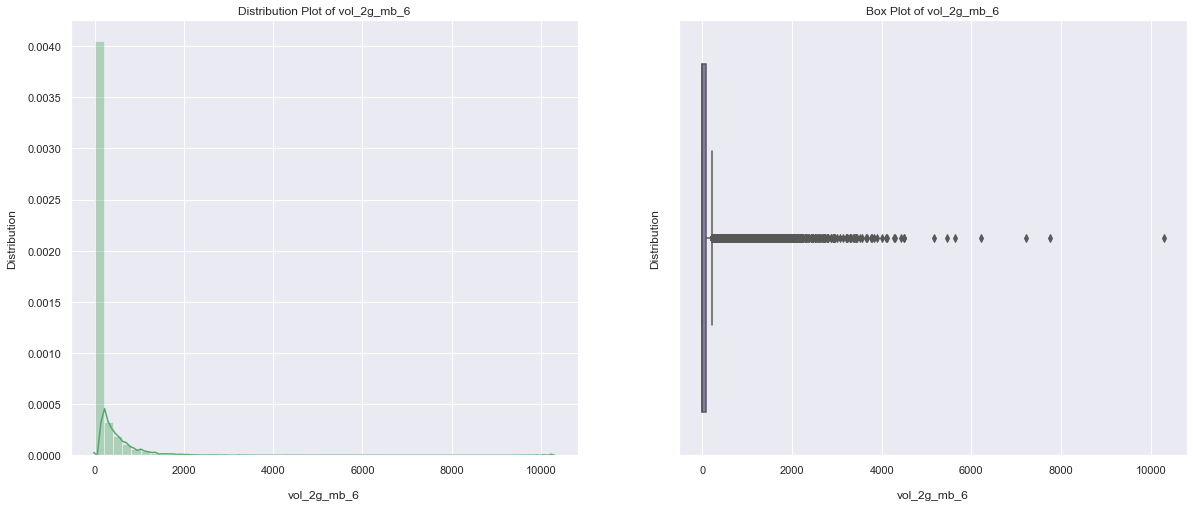

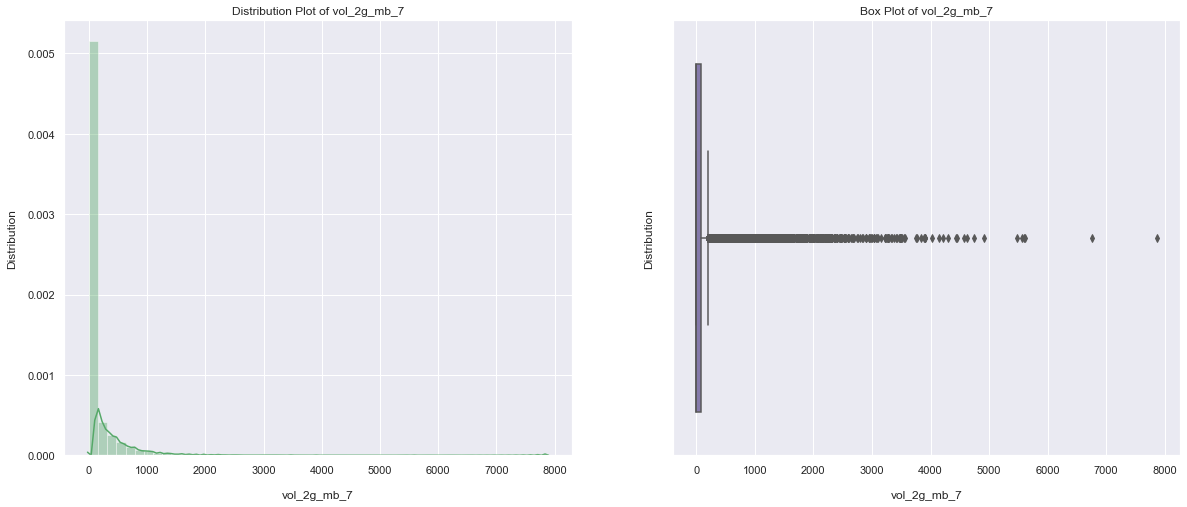

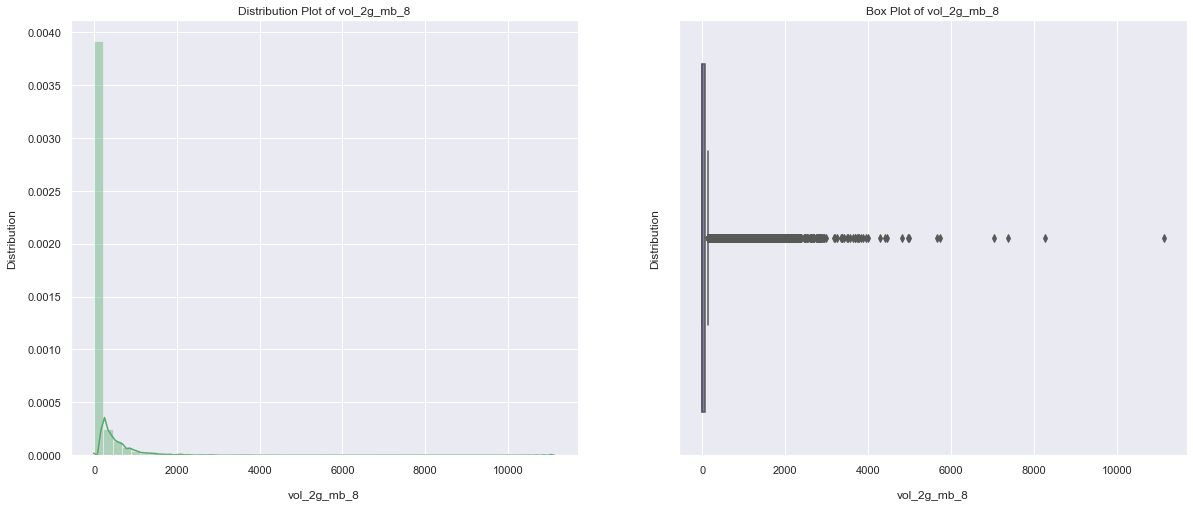

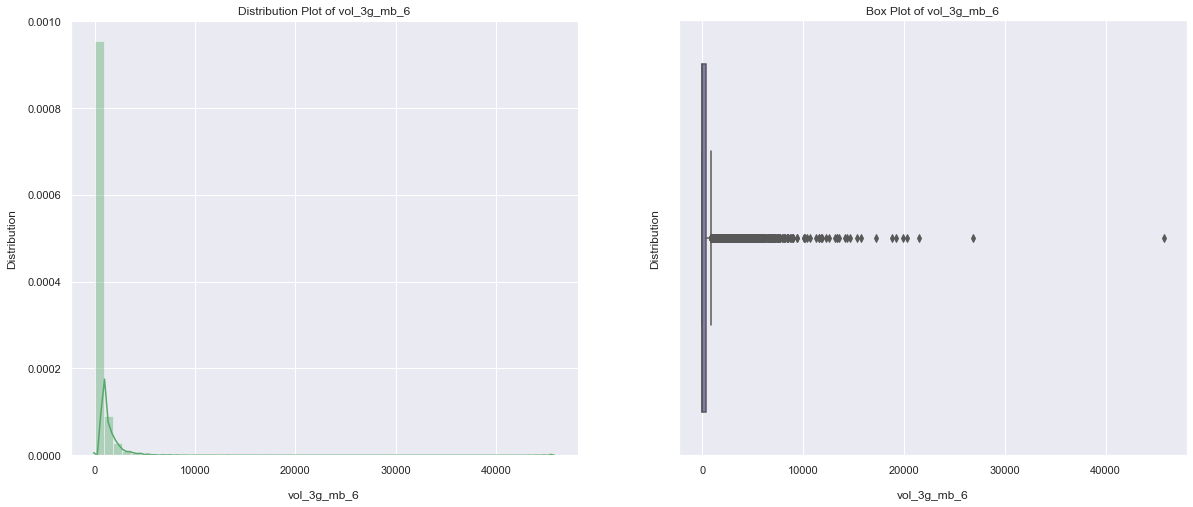

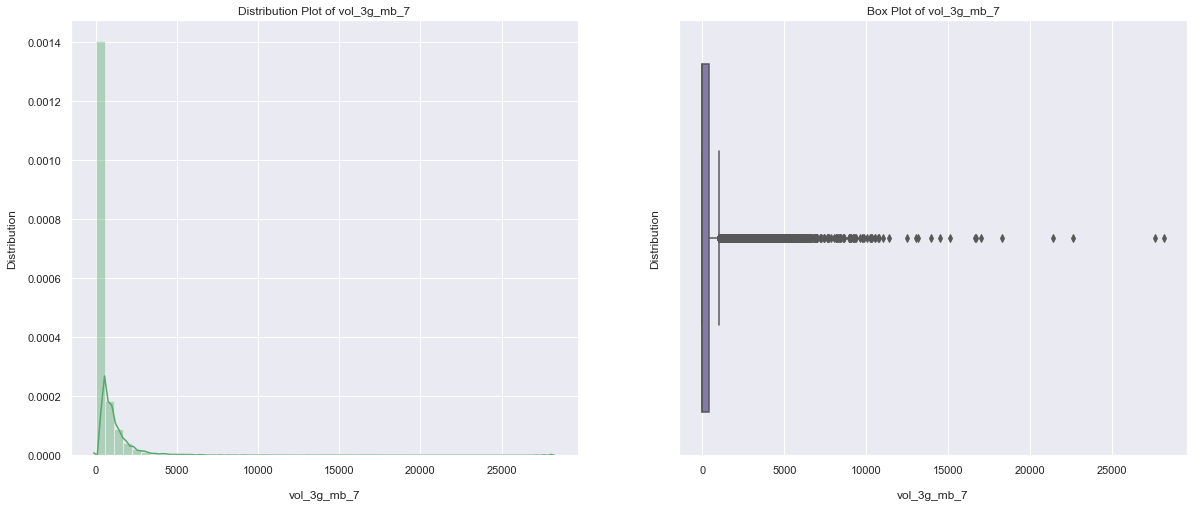

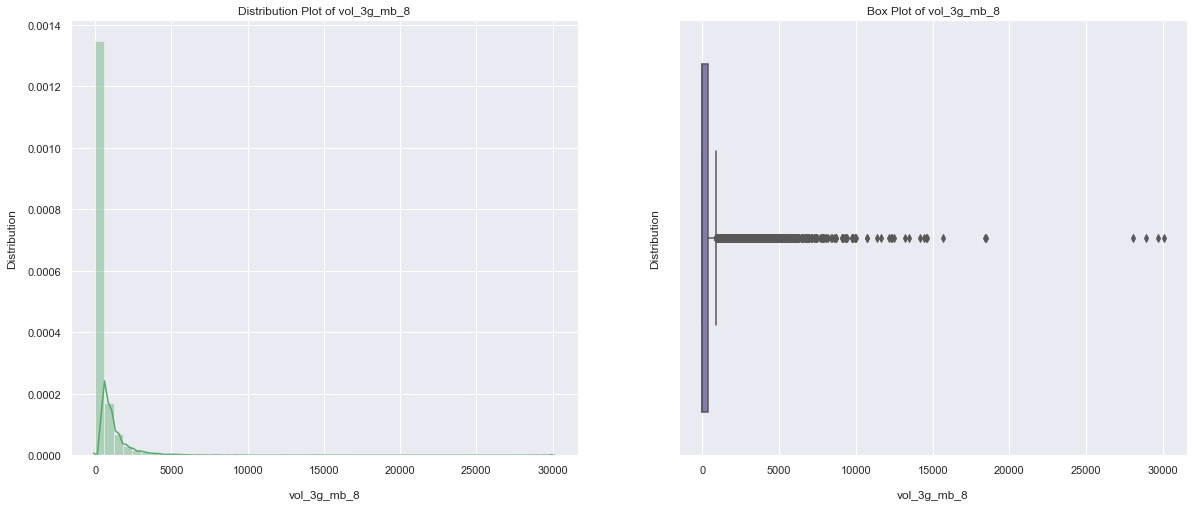

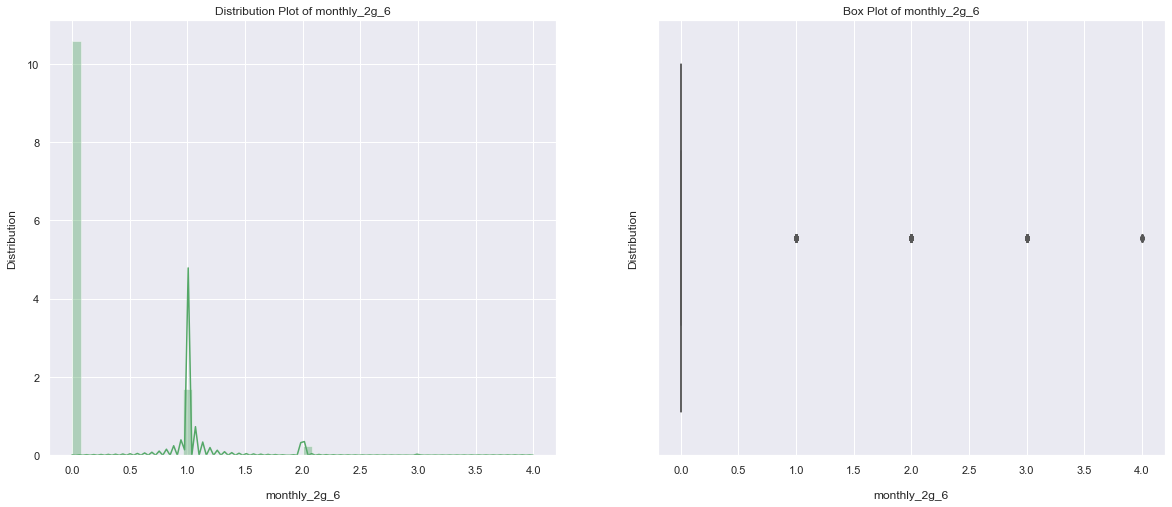

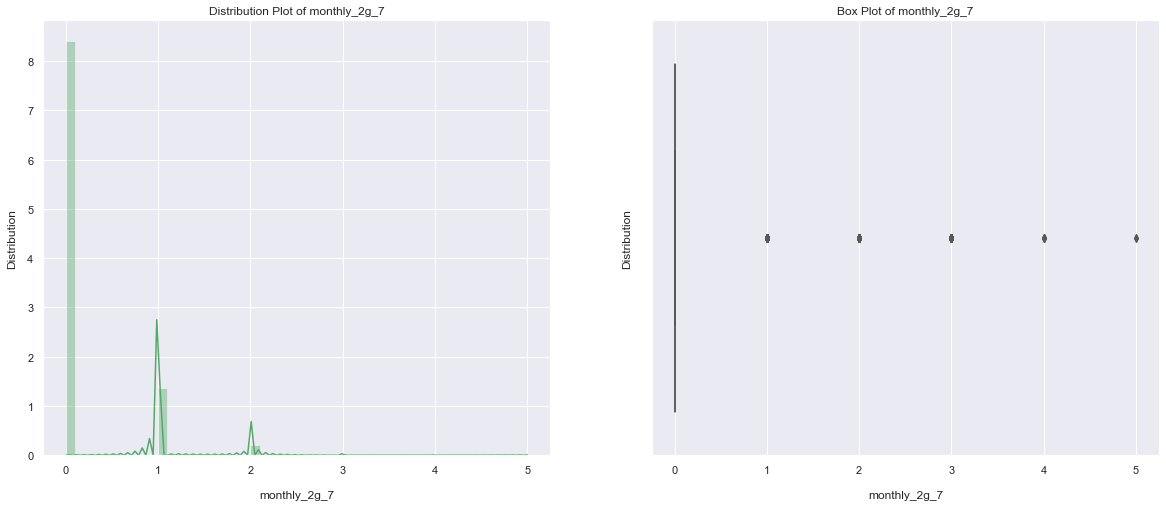

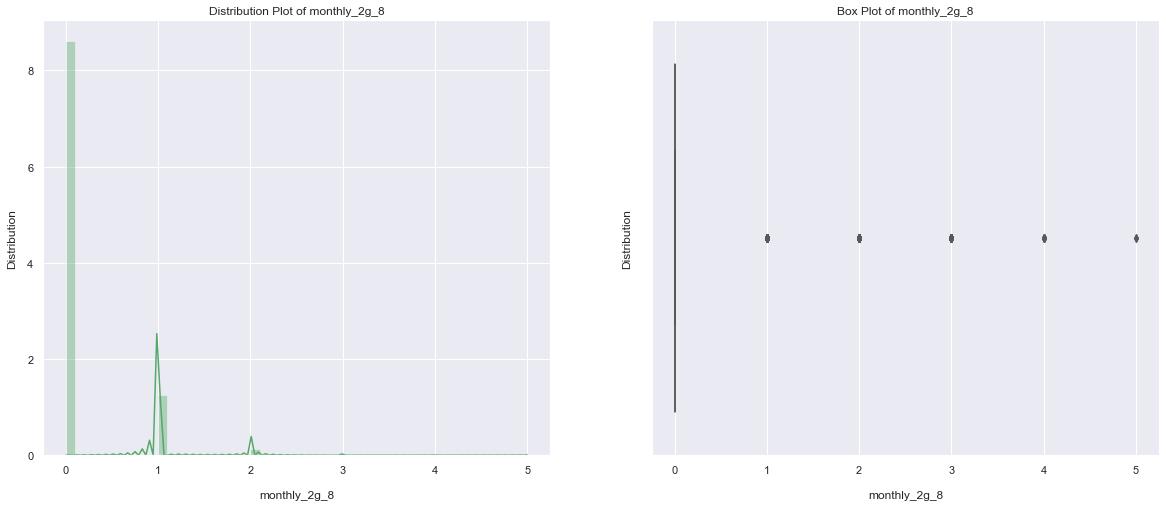

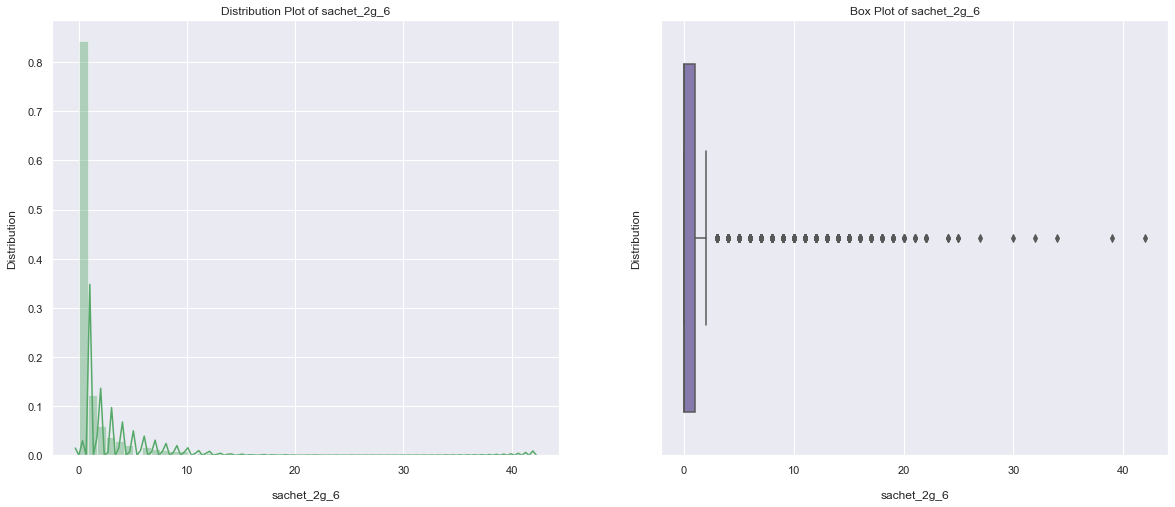

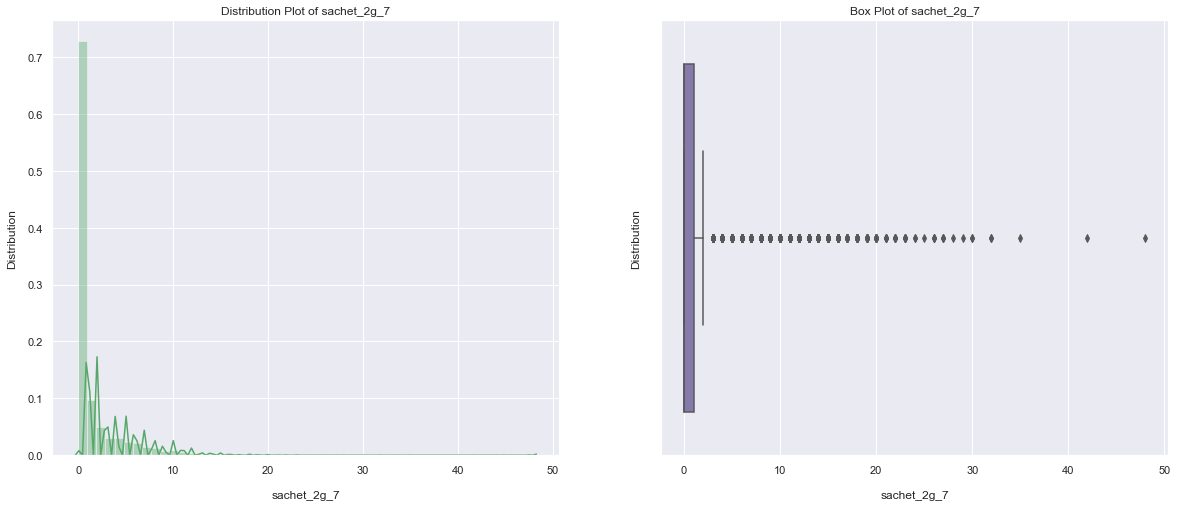

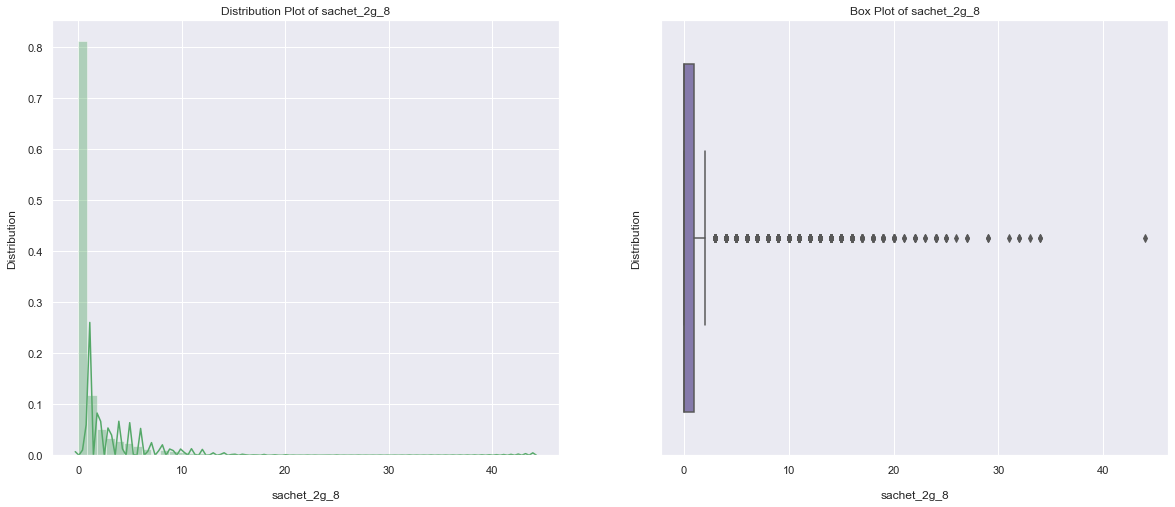

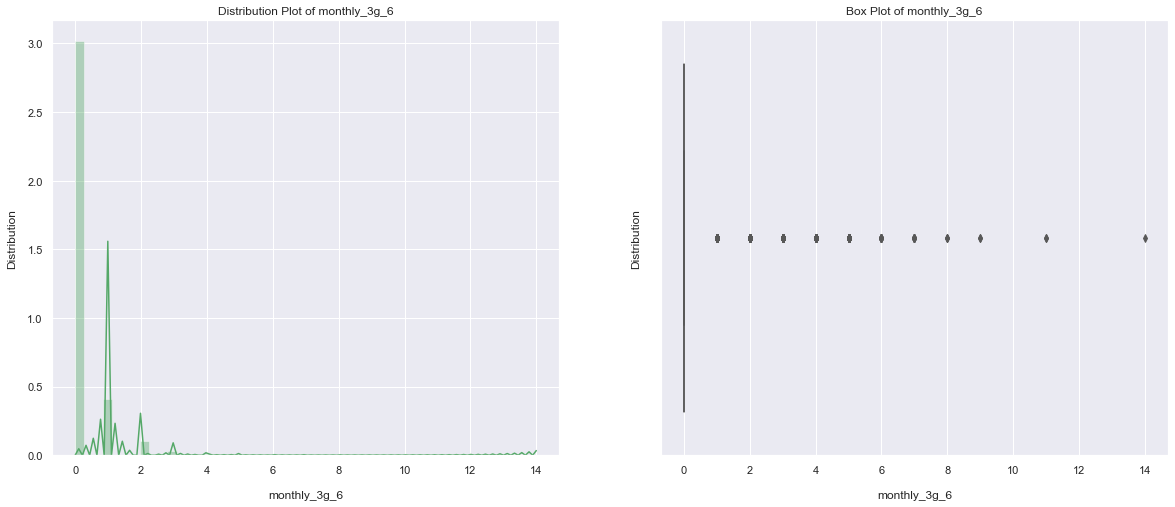

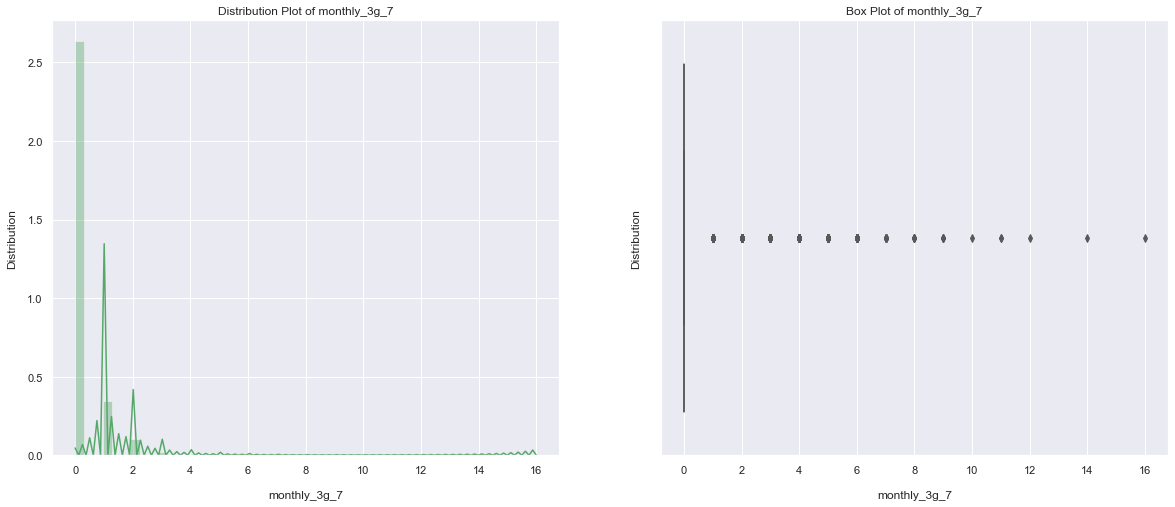

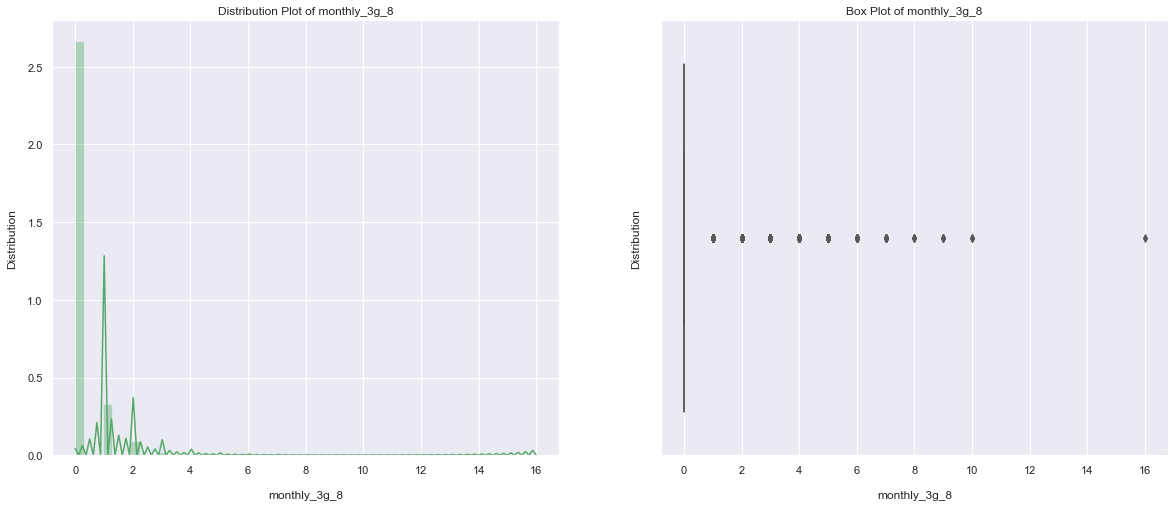

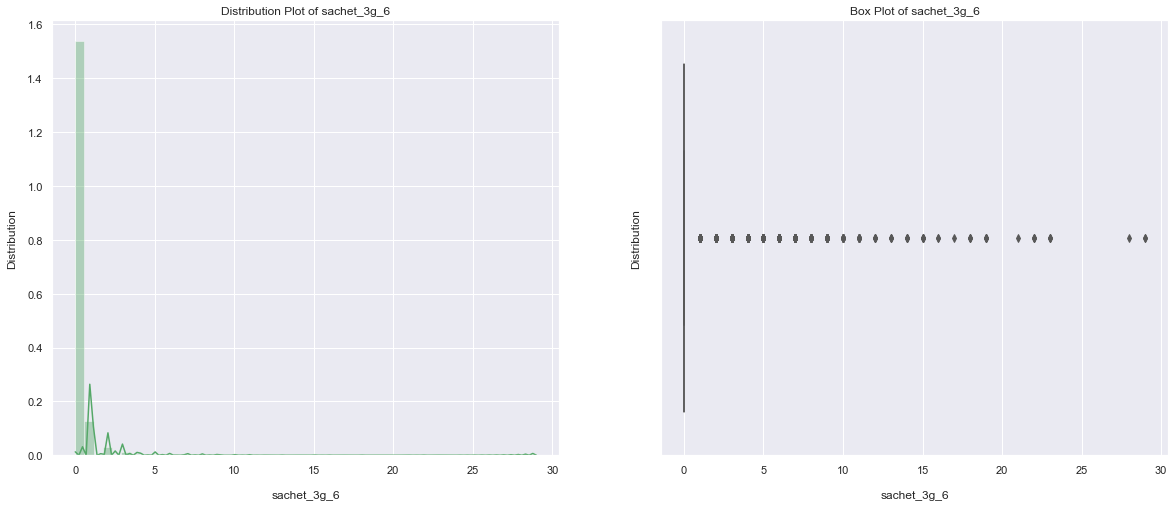

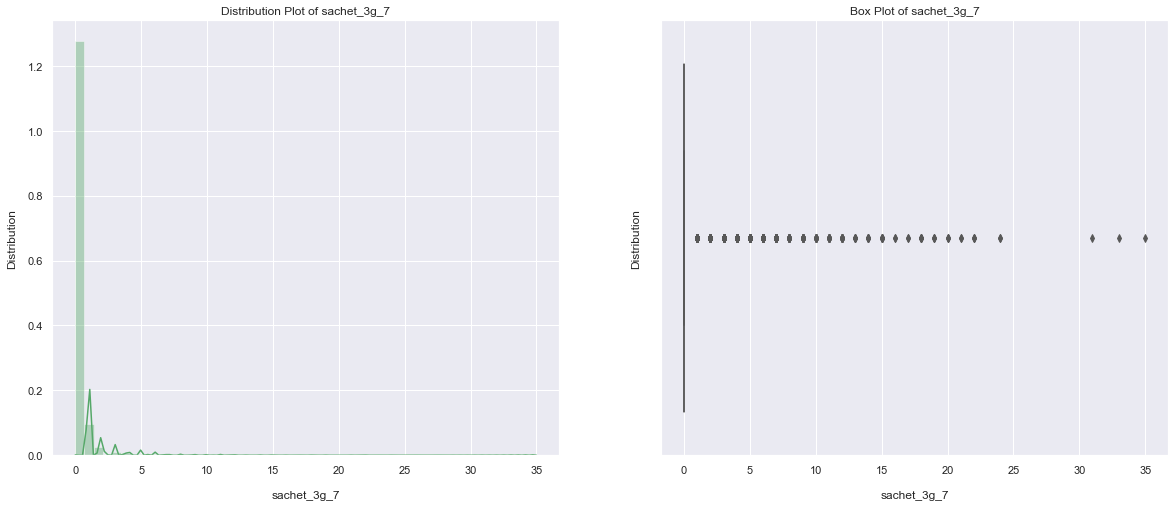

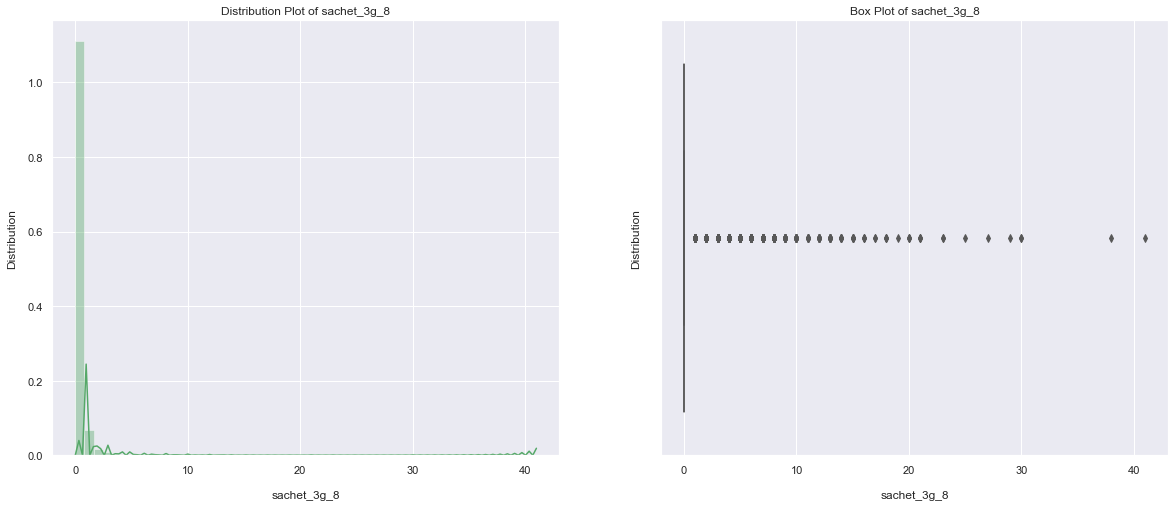

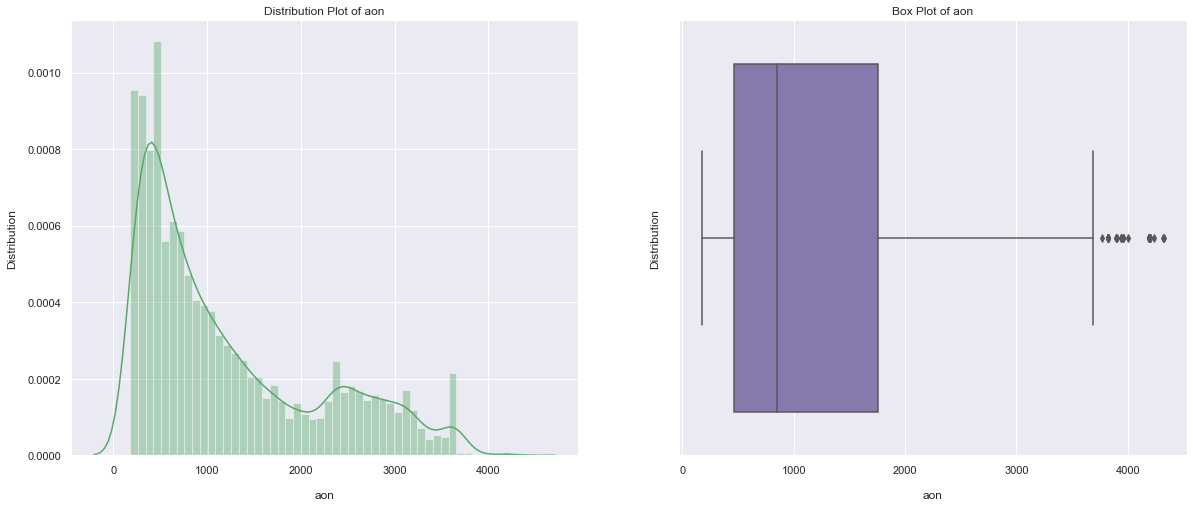

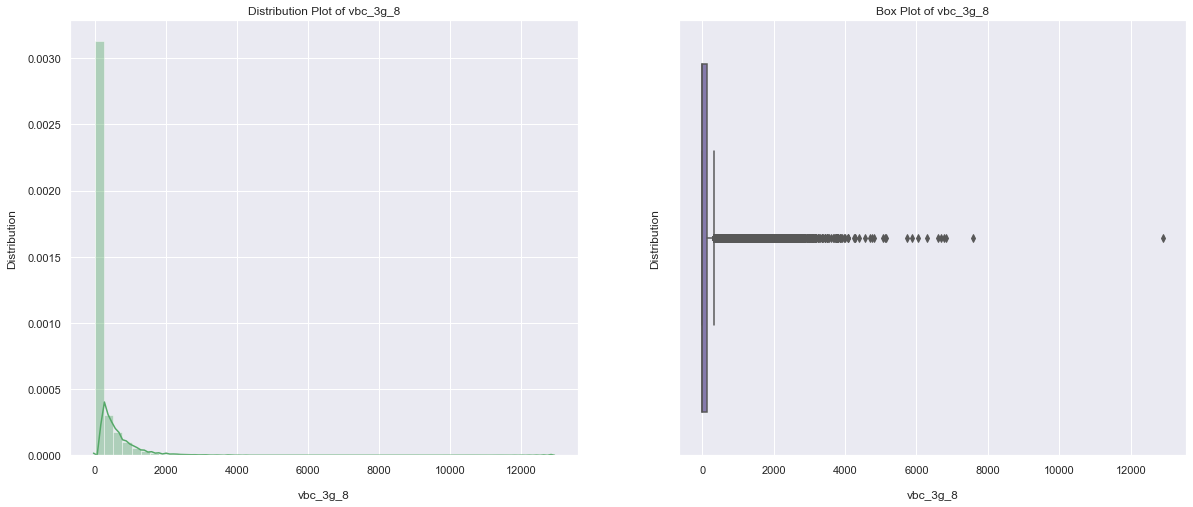

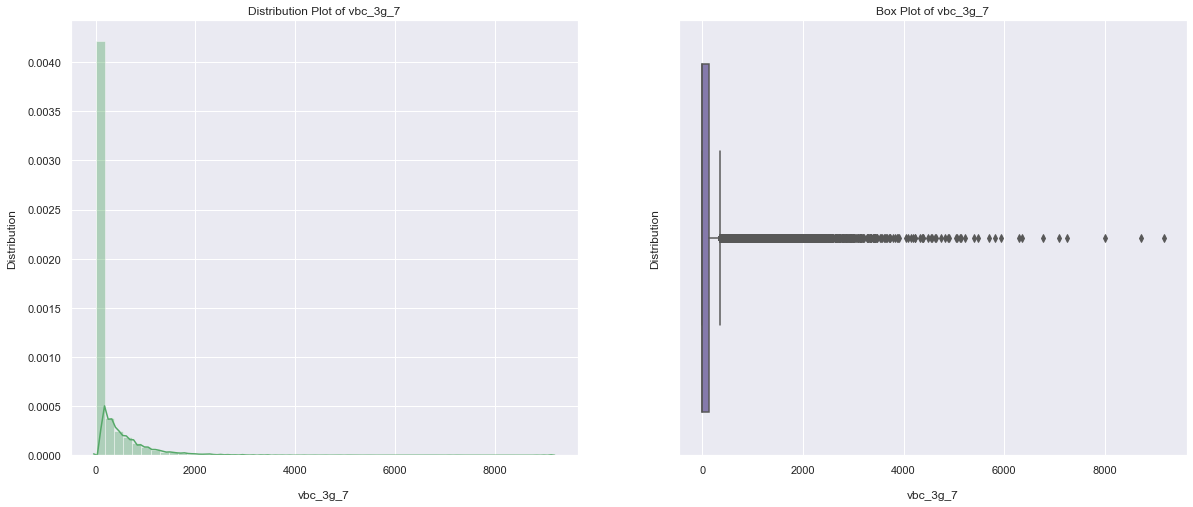

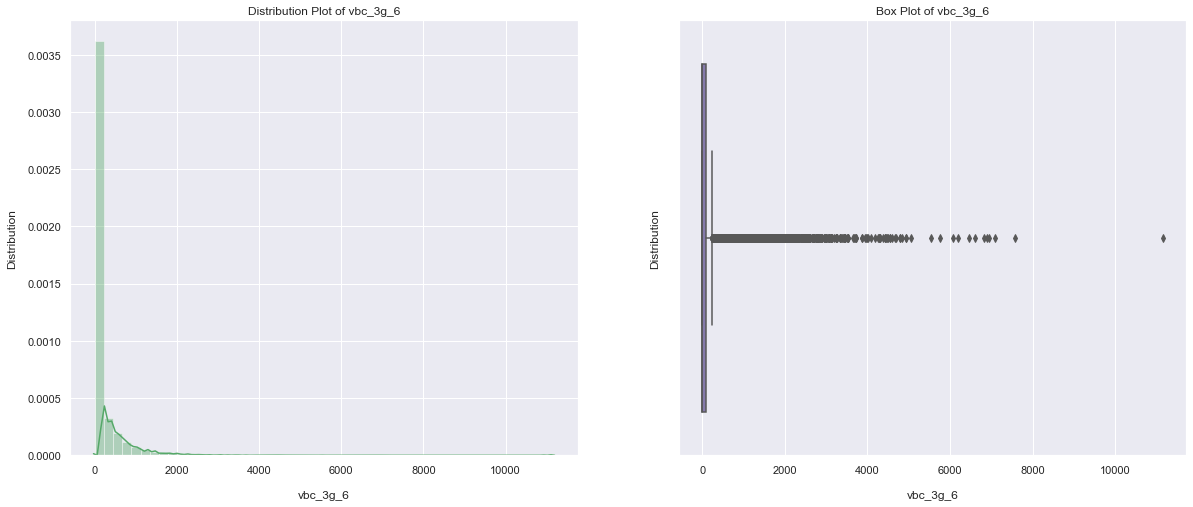

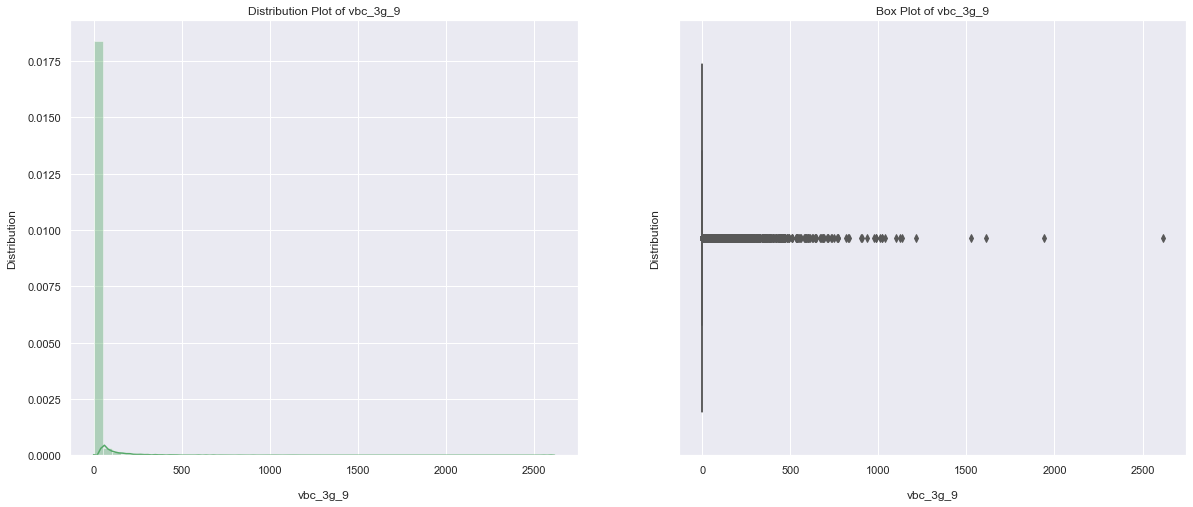

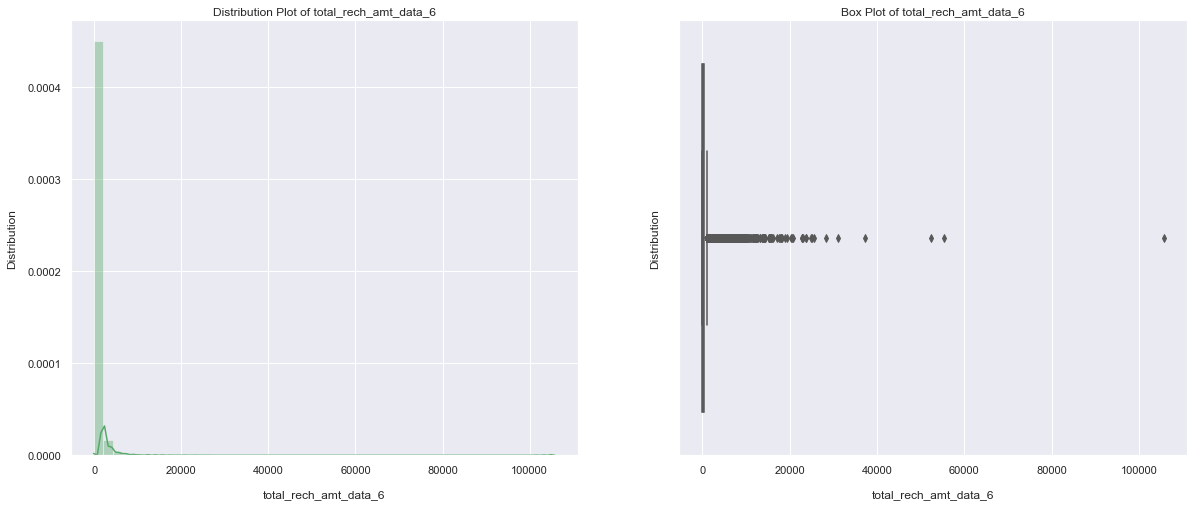

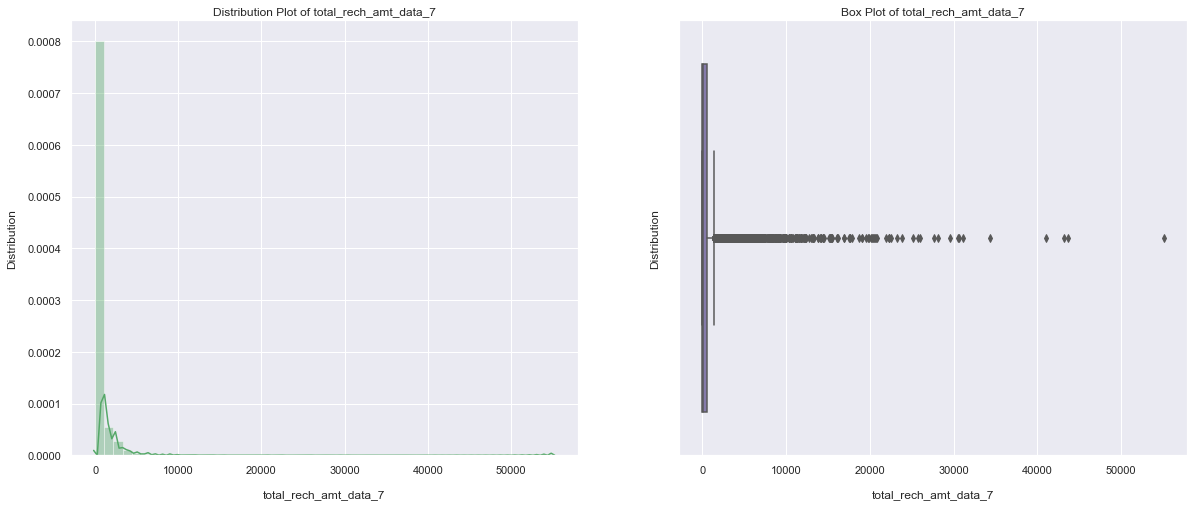

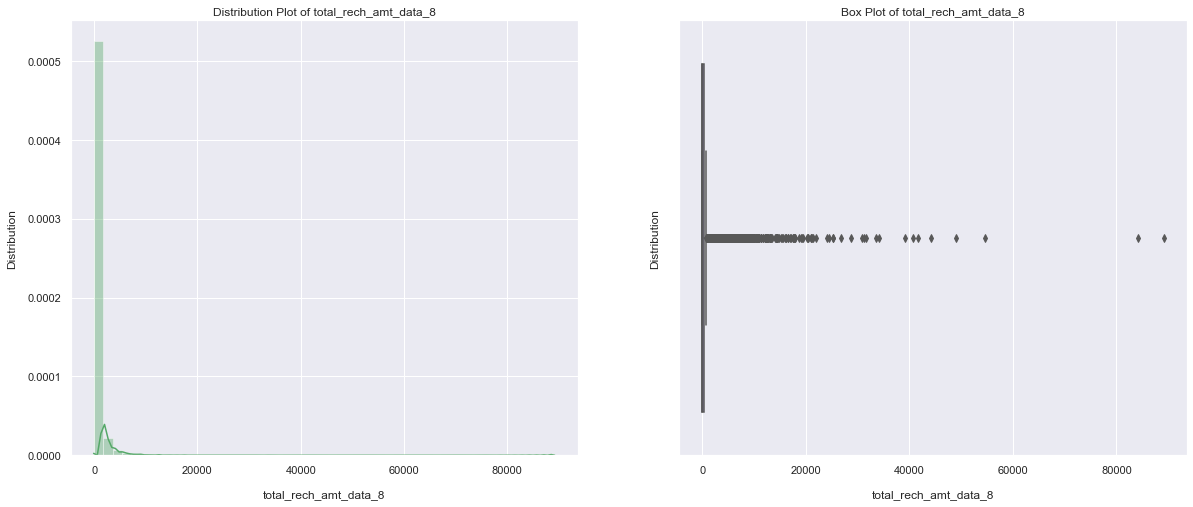

In [55]:
# Univariate Plot Analysis of Quantitative Variables

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in telecom_churn.columns:
    
    if col_list not in category_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = telecom_churn,
                        wspace = 0.2)

        counter += 1

- There are lot of Outliers present in the variables. 

### <font color = brown>4. Bivariate Analysis - Variables vs Churn</font>

In [56]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x=telecom_churn[x_axis], y=telecom_churn[y_axis + "_6"], hue = telecom_churn[x_axis], showfliers = False)
    
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x=telecom_churn[x_axis], y=telecom_churn[y_axis + "_7"], hue = telecom_churn[x_axis], showfliers = False)
    
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x=telecom_churn[x_axis], y=telecom_churn[y_axis + "_8"], hue = telecom_churn[x_axis], showfliers = False)
    
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.5)
    plt.show()


Data Visualization of churn vs arpu


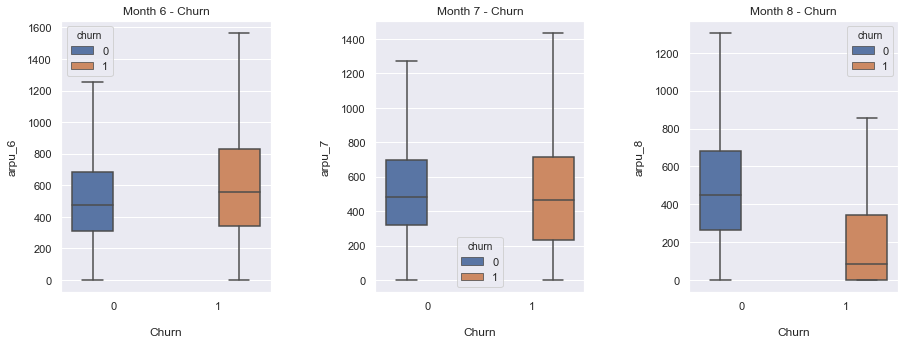


Data Visualization of churn vs onnet_mou


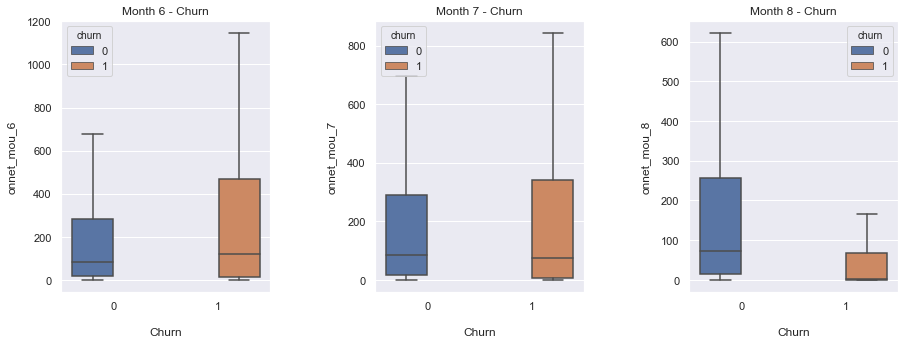


Data Visualization of churn vs offnet_mou


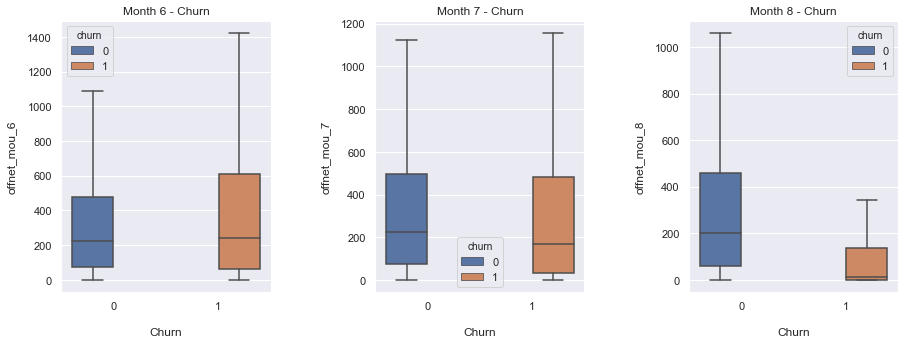


Data Visualization of churn vs total_og_mou


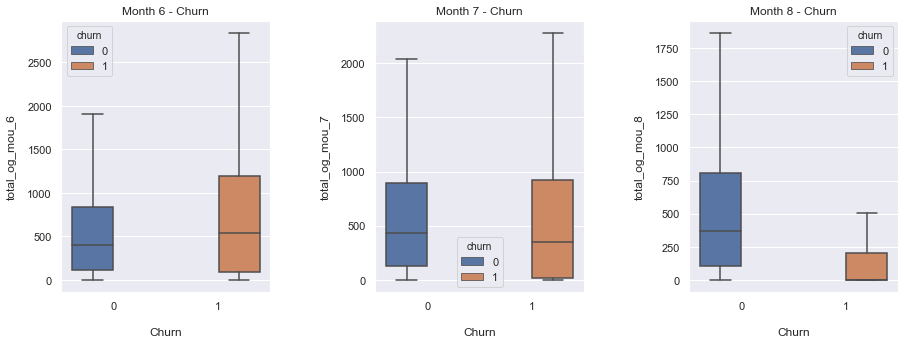


Data Visualization of churn vs total_ic_mou


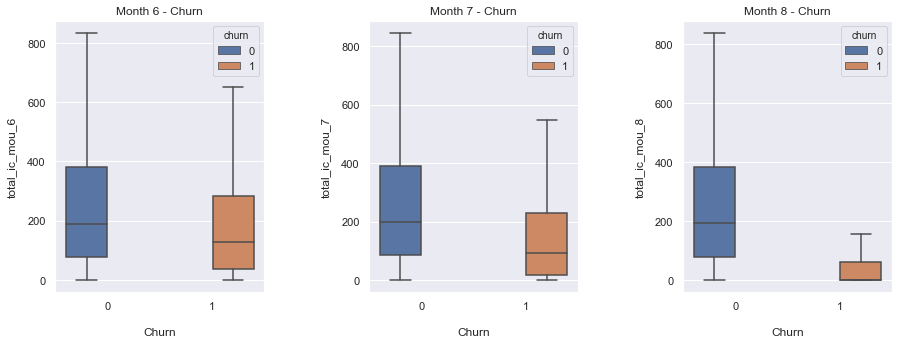


Data Visualization of churn vs total_rech_num


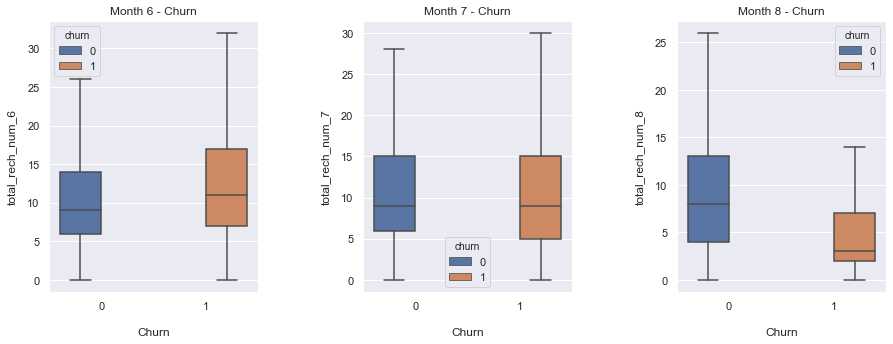


Data Visualization of churn vs total_rech_amt


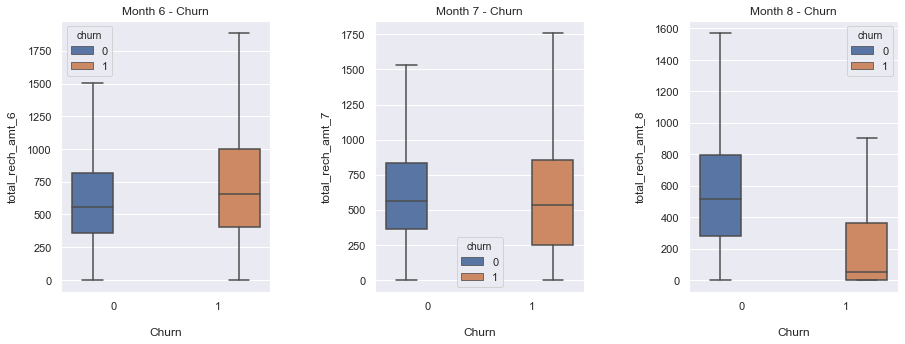


Data Visualization of churn vs total_rech_data


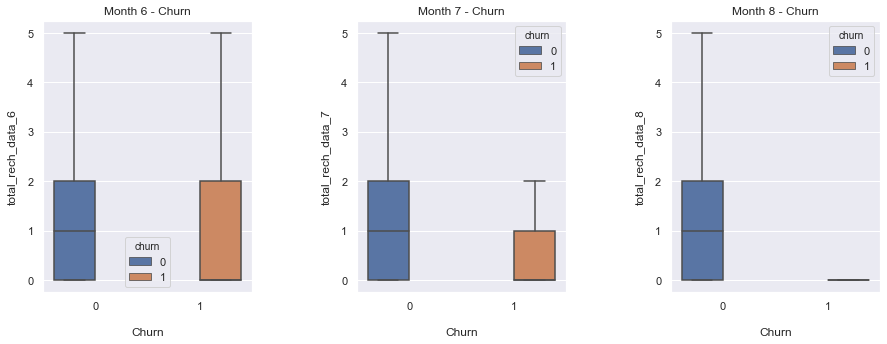


Data Visualization of churn vs vol_2g_mb


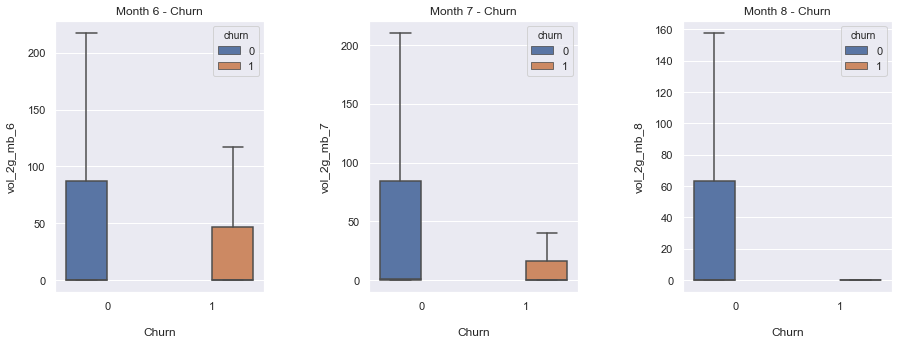


Data Visualization of churn vs vol_3g_mb


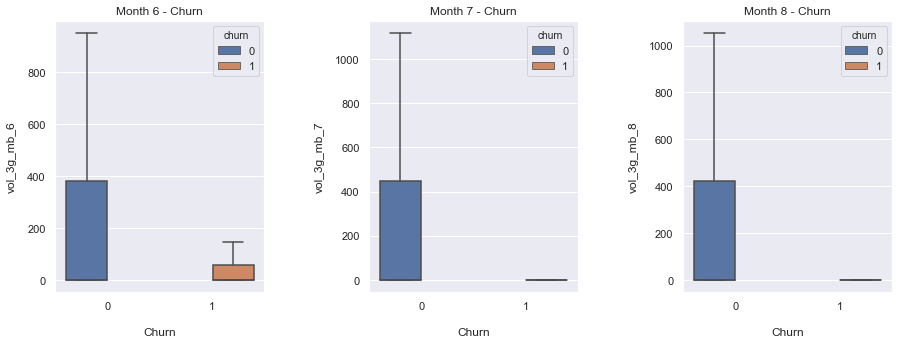


Data Visualization of churn vs vbc_3g


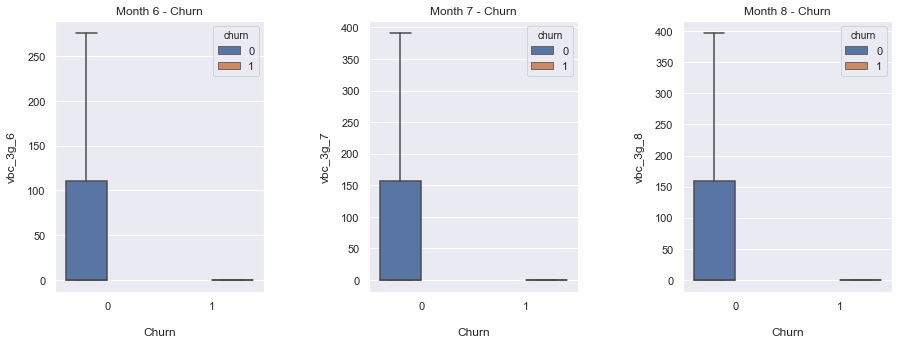


Data Visualization of churn vs total_rech_amt_data


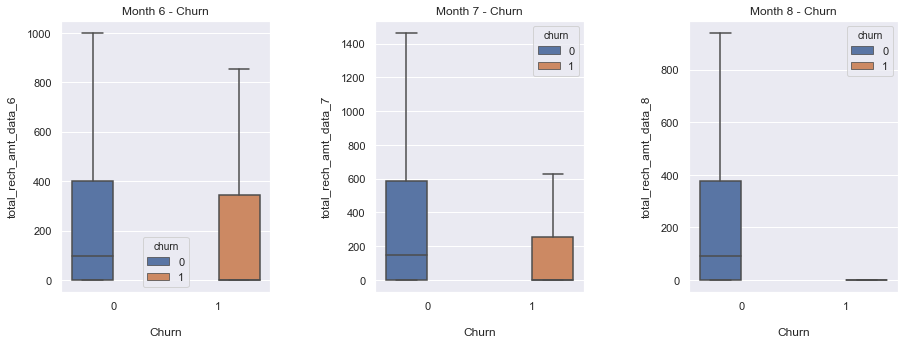

In [57]:
# Bivariate Analysis

column_list = ["arpu","onnet_mou","offnet_mou","total_og_mou","total_ic_mou","total_rech_num","total_rech_amt",\
               "total_rech_data","vol_2g_mb","vol_3g_mb","vbc_3g","total_rech_amt_data"]

for column_name in column_list:
    plot_bivariate(column_name)


*** There is a significant drop in the columns for data in 8th month for churned customers.  ***

### <font color = brown>5. Correlation Analysis</font> 

In [58]:
telecom_churn.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.682003  0.619778     0.343885     0.218888   
arpu_7                 0.682003  1.000000  0.767143     0.212713     0.321003   
arpu_8                 0.619778  0.767143  1.000000     0.150736     0.232295   
onnet_mou_6            0.343885  0.212713  0.150736     1.000000     0.751896   
onnet_mou_7            0.218888  0.321003  0.232295     0.751896     1.000000   
onnet_mou_8            0.190011  0.270779  0.345283     0.621407     0.806452   
offnet_mou_6           0.515151  0.355968  0.279095     0.088235     0.052263   
offnet_mou_7           0.344861  0.492669  0.376009     0.036756     0.081527   
offnet_mou_8           0.293097  0.397986  0.523837     0.033265     0.073065   
roam_ic_mou_6          0.126446  0.092642  0.088353     0.024091     0.038215   
roam_ic_mou_7          0.084451  0.093467  0.077881     0.024768     0.008461   
roam_ic_mou_8          0.091188  0.093837  0.110957     0.044219     0.037248   
roam_og_mou_6          0.193762  0.134787  0.130101     0.076006     0.082124   
roam_og_mou_7          0.144104  0.180120  0.141780     0.075626     0.068651   
roam_og_mou_8          0.125665  0.152270  0.199539     0.073057     0.083897   
loc_og_mou_6           0.332272  0.215675  0.208371     0.293235     0.201469   
loc_og_mou_7           0.250254  0.305336  0.264363     0.225099     0.302650   
loc_og_mou_8           0.228189  0.256323  0.347087     0.188050     0.238189   
std_og_mou_6           0.389018  0.250161  0.148893     0.628700     0.469192   
std_og_mou_7           0.233674  0.382571  0.257377     0.449339     0.625063   
std_og_mou_8           0.187182  0.306308  0.398798     0.369663     0.508153   
isd_og_mou_6           0.468214  0.420003  0.397011    -0.014594    -0.014313   
isd_og_mou_7           0.423341  0.511164  0.440010    -0.016056    -0.014017   
isd_og_mou_8           0.415527  0.454754  0.457025    -0.014064    -0.012222   
spl_og_mou_6           0.122977  0.068380  0.100929     0.098952     0.061966   
spl_og_mou_7           0.068927  0.115440  0.124794     0.079091     0.110041   
spl_og_mou_8           0.045037  0.070322  0.107687     0.083549     0.110168   
og_others_6            0.054344  0.018084  0.013613     0.054322     0.028640   
og_others_7            0.024506  0.026200  0.015812    -0.000490    -0.000414   
og_others_8            0.015547  0.017888  0.012377    -0.003241     0.002485   
total_og_mou_6         0.560203  0.368902  0.274829     0.717400     0.525254   
total_og_mou_7         0.369345  0.538390  0.400670     0.521161     0.720013   
total_og_mou_8         0.309954  0.431726  0.560766     0.421604     0.569349   
loc_ic_mou_6           0.181510  0.109477  0.116134     0.027408    -0.018035   
loc_ic_mou_7           0.142665  0.165308  0.158176     0.011159     0.019095   
loc_ic_mou_8           0.124397  0.143613  0.208142    -0.003189     0.005993   
std_ic_mou_6           0.124386  0.087636  0.073925     0.082800     0.049152   
std_ic_mou_7           0.085947  0.123759  0.099254     0.053420     0.076198   
std_ic_mou_8           0.079674  0.116897  0.139846     0.041200     0.064282   
total_ic_mou_6         0.225125  0.140187  0.143012     0.051286    -0.002348   
total_ic_mou_7         0.169390  0.211376  0.193330     0.025798     0.042644   
total_ic_mou_8         0.151226  0.184371  0.253321     0.009481     0.026406   
spl_ic_mou_6           0.030974  0.007778  0.009197     0.035402     0.016282   
spl_ic_mou_7          -0.034140 -0.015937 -0.016210    -0.030378    -0.012002   
spl_ic_mou_8          -0.011639 -0.007898  0.021543    -0.021840    -0.029643   
isd_ic_mou_6           0.101627  0.059973  0.070237    -0.016210    -0.023682   
isd_ic_mou_7           0.063595  0.100083  0.087563    -0.021260    -0.016569   
isd_ic_mou_8           0.071179  0.082853  0.106602    -0.017470    -0.016902   
ic_others_6            0.016058  0.008028  0.010694    -

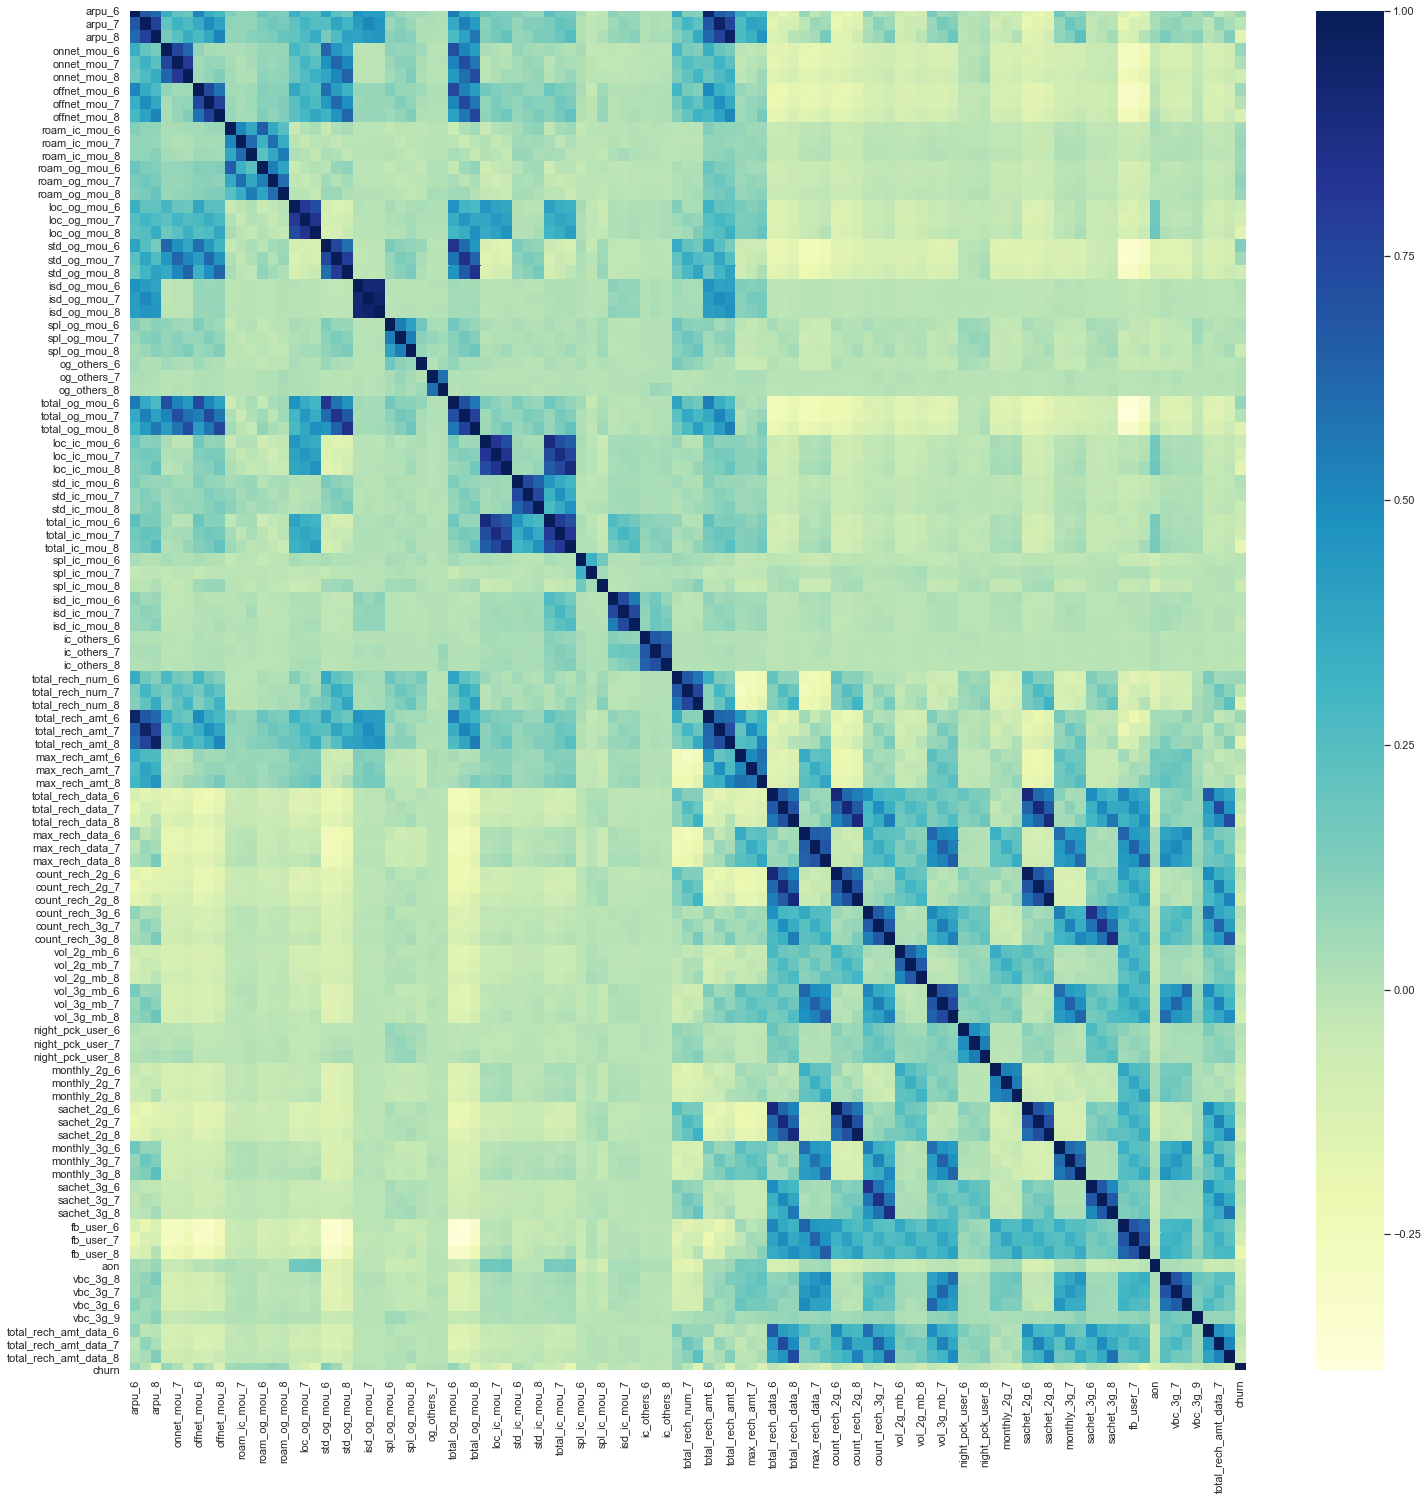

In [59]:
plt.figure(figsize=(25,25))
sns.heatmap(telecom_churn.corr(), cmap='YlGnBu')
plt.show()

Inference: As per the above correlation map there are high correlated features

In [60]:
# Method to compute the feature correlation and sort feature pairs based on their correlation

def get_feature_correlation(df, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True):
   
    corr_matrix_abs = df.corr(method=corr_method).abs()
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation (abs)']

    if top_n:
        return sorted_correlated_features[:top_n]

    return sorted_correlated_features

In [61]:
# Below are the list of column pairs where correlation is greater than 0.75

result = get_feature_correlation(telecom_churn)
top_results = result[result['Feature 1'] != result['Feature 2']] [result['Correlation (abs)'] > 0.75]
top_results

Feature 1              Feature 2  Correlation (abs)
105  total_rech_amt_data_8      total_rech_data_8           0.963019
107  total_rech_amt_data_7      total_rech_data_7           0.960546
109  total_rech_amt_data_6      total_rech_data_6           0.958404
111          roam_ic_mou_7          roam_og_mou_7           0.955411
113          roam_ic_mou_8          roam_og_mou_8           0.948468
115          roam_ic_mou_6          roam_og_mou_6           0.946227
117       total_rech_amt_8                 arpu_8           0.942785
119                 arpu_6       total_rech_amt_6           0.939148
121         total_ic_mou_8           loc_ic_mou_8           0.937894
123       total_rech_amt_7                 arpu_7           0.932476
125           loc_ic_mou_6         total_ic_mou_6           0.931429
127         total_ic_mou_7           loc_ic_mou_7           0.926011
129        max_rech_data_8              fb_user_8           0.891517
131              fb_user_8            vol_2g_mb_8           0.886293
133        max_rech_data_6              fb_user_6           0.880466
135              fb_user_6  total_rech_amt_data_6           0.878675
137        max_rech_data_7              fb_user_7           0.878417
139        max_rech_data_8  total_rech_amt_data_8           0.877602
141            vol_2g_mb_6              fb_user_6           0.877229
143              fb_user_8  total_rech_amt_data_8           0.873186
145            vol_2g_mb_7              fb_user_7           0.868471
147            sachet_2g_8        count_rech_2g_8           0.863079
149        count_rech_2g_7            sachet_2g_7           0.861128
151              fb_user_7  total_rech_amt_data_7           0.858527
153        count_rech_2g_6            sachet_2g_6           0.853275
155  total_rech_amt_data_6        max_rech_data_6           0.851645
157              fb_user_6      total_rech_data_6           0.850309
159            onnet_mou_6            onnet_mou_7           0.846012
161           loc_og_mou_8           loc_og_mou_7           0.845403
163           loc_ic_mou_8           loc_ic_mou_7           0.843666
165           offnet_mou_8         total_og_mou_8           0.839796
167           std_og_mou_6           std_og_mou_7           0.838260
169           loc_og_mou_6           loc_og_mou_7           0.836824
171              fb_user_8      total_rech_data_8           0.833823
173           loc_ic_mou_6           loc_ic_mou_7           0.833392
175            onnet_mou_8            onnet_mou_7           0.831485
177        count_rech_2g_7      total_rech_data_7           0.830539
179  total_rech_amt_data_7        max_rech_data_7           0.827520
181      total_rech_data_7              fb_user_7           0.826310
183               vbc_3g_8               vbc_3g_7           0.825296
185      total_rech_data_6        count_rech_2g_6           0.824042
187      total_rech_data_8        count_rech_2g_8           0.823965
189         total_ic_mou_7         total_ic_mou_8           0.822180
191           std_og_mou_7           std_og_mou_8           0.822082
193            onnet_mou_8         total_og_mou_8           0.810684
195           offnet_mou_7           offnet_mou_8           0.810302
197         total_ic_mou_6         total_ic_mou_7           0.806952
199           offnet_mou_6           offnet_mou_7           0.805669
201               vbc_3g_6               vbc_3g_7           0.802901
203            vol_3g_mb_6               vbc_3g_6           0.801303
205            vol_2g_mb_8  total_rech_amt_data_8           0.798741
207           offnet_mou_7         total_og_mou_7           0.797695
209  total_rech_amt_data_6            vol_2g_mb_6           0.797213
211         total_og_mou_6           offnet_mou_6           0.793508
213        max_rech_data_8            vol_2g_mb_8           0.792187
215           loc_og_mou_8           loc_ic_mou_8           0.789554
217      total_rech_data_6            vol_2g_mb_6           0.785609
219      total_

In [62]:
top_results.shape

(87, 3)

- There are almost 87 columns where the correlation is greater than 0.75
- These columns has to be removed at later stage

In [63]:
# Custom Function to derive new good phase columns and drop the original columns 

def derive_good_action_phase_features(col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    telecom_churn[good_phase_col] = (telecom_churn[col_6] + telecom_churn[col_7])/2
    telecom_churn[action_phase_col] = telecom_churn[col_8] - telecom_churn[good_phase_col]
    
    telecom_churn.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    

In [64]:
column_list = ["arpu","onnet_mou","offnet_mou","roam_ic_mou","total_rech_amt","max_rech_amt","total_rech_data","max_rech_data",
"count_rech_2g","count_rech_3g","vol_2g_mb","vol_3g_mb","monthly_2g","sachet_2g","monthly_3g","sachet_3g",
"vbc_3g","total_rech_amt_data","og_others","total_og_mou","loc_ic_mou","roam_og_mou","loc_og_mou","std_og_mou",
"isd_og_mou","spl_og_mou","total_rech_num","std_ic_mou","spl_ic_mou","isd_ic_mou","ic_others","total_ic_mou"]

for col_name in column_list:
    derive_good_action_phase_features(col_name)


In [65]:
telecom_churn.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0                 0                 0                 0          1          1   
1                 0                 0                 0          0          0   
2                 0                 0                 0          0          1   
3                 0                 0                 0          0          0   
4                 0                 0                 0          0          1   

   fb_user_8  aon  vbc_3g_9  churn  arpu_good_phase  arpu_action_phase  \
0          1  968      3.58      1         206.1005             7.7025   
1          0  802      0.00      1        1209.5150          1961.9650   
2          1  315      0.00      0         435.4720          -298.1100   
3          0  720      0.00      0         556.1030            81.6570   
4          1  604      0.00      0         134.1235           232.8425   

   onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  \
0                  0.00                    0.00                  0.000   
1                 56.26                   -3.97                510.295   
2                382.36                 -347.28                 87.645   
3                117.26                  -32.12                827.305   
4                 49.81                  -16.23                 87.385   

   offnet_mou_action_phase  roam_ic_mou_good_phase  roam_ic_mou_action_phase  \
0                    0.000                    0.00                      0.00   
1                 -184.385                   24.86                      6.78   
2                   48.835                    0.00                      0.00   
3                  156.085                    0.00                      0.00   
4                  118.505                    0.00                      0.00   

   total_rech_amt_good_phase  total_rech_amt_action_phase  \
0                      307.0                        -55.0   
1                     1185.0                       2453.0   
2                      519.0                       -399.0   
3                      640.0                         78.0   
4                      227.0                        212.0   

   max_rech_amt_good_phase  max_rech_amt_action_phase  \
0                    252.0                        0.0   
1                   1185.0                      395.0   
2                    122.0                      -92.0   
3                     50.0                        0.0   
4                     89.5                       89.5   

   total_rech_data_good_phase  total_rech_data_action_phase  \
0                         1.0                           0.0   
1                         0.0                           0.0   
2                         1.0                           2.0   
3                         0.0                           0.0   
4                         1.0                           1.0   

   max_rech_data_good_phase  max_rech_data_action_phase  \
0                     252.0                         0.0   
1                       0.0                         0.0   
2                      77.0                       -54.0   
3                       0.0                         0.0   
4                      89.5                        89.5   

   count_rech_2g_good_phase  count_rech_2g_action_phase  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       1.0                         2.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   count_rech_3g_good_phase  count_rech_3g_action_phase  vol_2g_mb_good_phase  \
0                       1.0                         0.0                15.725   
1                       0.0                         0.0                 0.000   
2                       0.0                         0.0               178.000   
3                     

In [66]:
telecom_churn.shape

(29824, 73)

## <font color = "purple"> Model Building </font>

### <font color = brown>1. Train / Test Split</font>

In [67]:
X = telecom_churn.drop('churn', axis = 1)
y = telecom_churn[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100, stratify = y)

print("X_Train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_Train:  (20876, 72)
y_train:  (20876, 1)
X_test:  (8948, 72)
y_test:  (8948, 1)


In [68]:
# Normalize the data
scaler = MinMaxScaler()

x_train_cols = X_train.columns
x_test_cols = X_test.columns

X_train[x_train_cols] = scaler.fit_transform(X_train[x_train_cols])
X_test[x_test_cols] = scaler.transform(X_test[x_test_cols])

## <font color = brown>3. Handling Imbalanced Dataset</font>


 - **It is not possible to check different sampling techniques on very cost sensitive Machine Learning models like Decision Trees, Random Forest, XGBoost. For this Case Study, we will particularily use SMOTEENN sampling technique to handle imbalanced dataset as it is uses both over-sampling and under-sampling method and helps in cleaning noisy samples.**

In [69]:
# Implement SMOTEENN
def implement_smoteenn(X_train, y_train):
    
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)
    
    X_train_resampled.columns = X_train.columns.to_list()
    y_train_resampled.columns = y_train.columns.to_list()

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

<b><u><h3><font color = 'Indigo'> Models to Consider </h3></u></b>


<b><o><h4><font color = 'Indigo'> 1. Logistic Regression </h4></o></b>
<b><o><h4><font color = 'Indigo'> 2. Decision Tree </h4></o></b>
<b><o><h4><font color = 'Indigo'> 3. Random Forest </h4></o></b>
<b><o><h4><font color = 'Indigo'> 4. XGBoost </h4></o></b>

In [70]:
# custom function to get classification report
def get_classification_test_metrics(test_df, test_predicted_df ):
    
    fpr, tpr, thresholds = roc_curve(test_df.values.ravel(), test_predicted_df)

    model_f1_score = f1_score(test_df.values.ravel(), test_predicted_df)
    model_precision_score = precision_score(test_df.values.ravel(), test_predicted_df)
    model_recall_score = recall_score(test_df.values.ravel(), test_predicted_df)
    model_accuracy_score = accuracy_score(test_df.values.ravel(), test_predicted_df)
    model_auc_roc = auc(fpr, tpr)

    print("\n confusion Matrix\n")
    print(confusion_matrix(test_df.values.ravel(), test_predicted_df))
    
    
    f1_score_fin =  round(model_f1_score, 2)
    precision = round(model_precision_score, 2)
    recall = round(model_recall_score, 2)
    accuracy = round(model_accuracy_score, 2)
    auc_roc = round(model_auc_roc, 2)
    
    print('')
    print('classification report')
    print('')
    
    
    print('|  f1  |  precision  | recall  | accuracy | auc_roc  |')
    print('-------------------------------------------------------')
    print('|',f1_score_fin,'|  ', precision, '     |', recall, '   |', accuracy, '    |' ,auc_roc, '    |')


In [71]:
def Plot_accuracy_curves():

    # Plot ROC curves 

    plt.subplots(2,2,figsize=(15,5));
    plt.subplot(121)
    plt.plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc = "lower right")
    plt.ylabel("False Positive Rate")
    plt.xlabel("True Positive Rate")
    plt.title("AUC ROC curve")

    # Plot Precision Recall curves


    plt.subplot(122)
    plt.plot(threshold, p[:-1], "g-")
    plt.plot(threshold, r[:-1], "r-")
    plt.title('precision / recall curve')
    plt.show();


In [72]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))
    var_cumu = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(var_cumu)

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.vlines(x=9, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
    plt.show()

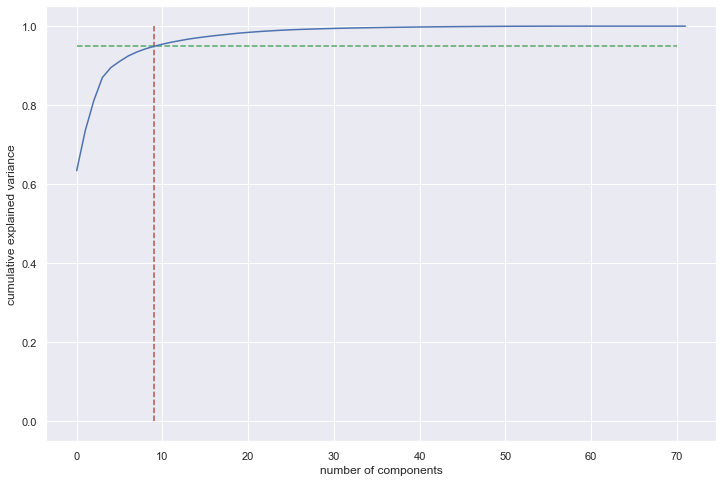

In [73]:
perform_PCA(X_train)

Number of components to consider is 9 to achieve 95% accuracy (explained variance)

In [74]:
pca_final = IncrementalPCA(n_components=9)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20876, 9)

In [75]:
def incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA 

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print("X_train_pca.shape", X_train_pca.shape)
    print("y_train.shape", y_train.shape)
    print("X_test_pca.shape", X_test_pca.shape)
    print("y_test.shape", y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #Plotting the heatmap of the correlation matrix
    plt.figure(figsize=[20,15])
    sns.heatmap(corrmat, annot=True)
    
    plt.show()
    
    # Remove all the diagonal 1s to get the maximum/minimum correlation
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    
    
    return X_train_pca, X_test_pca 

X_train_pca.shape (20876, 16)
y_train.shape (20876, 1)
X_test_pca.shape (8948, 16)
y_test.shape (8948, 1)


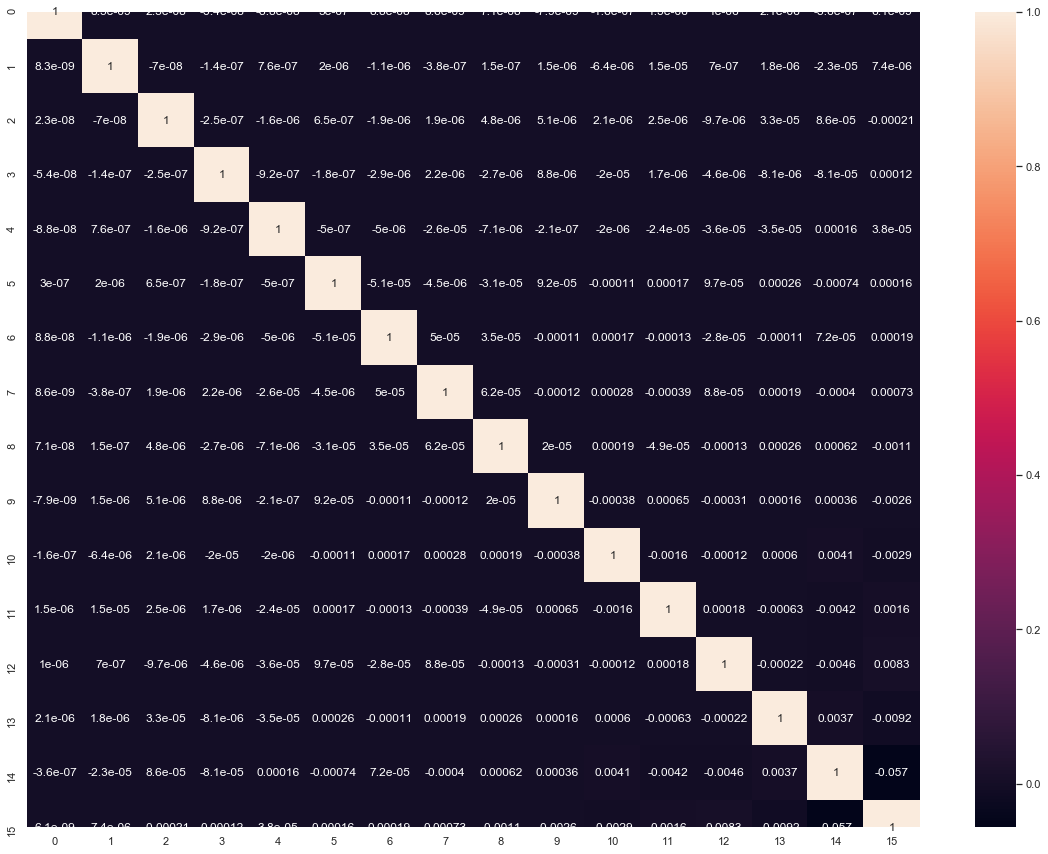

max corr: 0.008336264952330886 , min corr:  -0.05655721519113233


In [76]:
X_train_pca, X_test_pca = incremental_PCA(X_train, y_train, 16)

- As we can see from the above graph there is not much correlation between two variables

In [77]:
X_test_pca.shape
X_test.shape

(8948, 72)

<b><h5><font color = 'green'> Applying logistic regression on the data on our Principal components </h5></b>

### <font color = OrangeRed>1. Logistic Regression</font>

### a. Without resampling 

In [78]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train_pca, y_train)

f1 score:  0.14
precision:  0.59
recall:  0.08
accuracy:  0.92
auc_roc:  0.54
Overall Accuracy:  0.85

 confusion Matrix

[[8201   38]
 [ 654   55]]


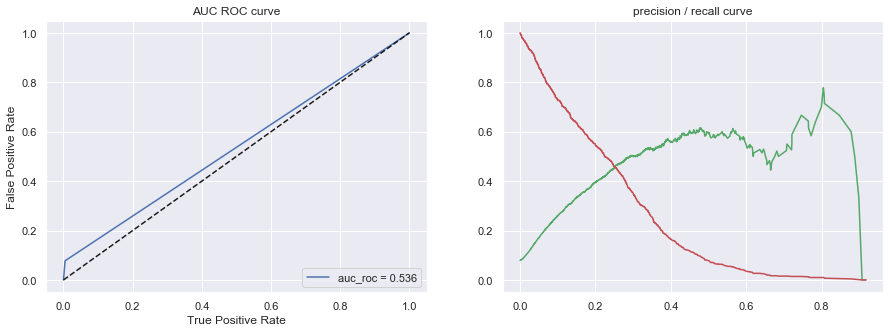

In [79]:
pred_test = lr_model.predict(X_test_pca.values)

pred_test_probs = lr_model.predict_proba(X_test_pca.values)[:, 1:]

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)
p, r, threshold = precision_recall_curve(y_test.churn, pred_test_probs)
#auc(p, r)

model_f1_score = f1_score(y_test.churn, pred_test)
model_precision_score = precision_score(y_test.churn, pred_test)
model_recall_score = recall_score(y_test.churn, pred_test)
model_accuracy_score = accuracy_score(y_test.churn, pred_test)
model_auc_roc = auc(fpr, tpr)

print("f1 score: ", round(model_f1_score,2))
print("precision: ", round(model_precision_score,2))
print("recall: ", round(model_recall_score,2))
print("accuracy: ", round(model_accuracy_score,2))
print("auc_roc: ", round(model_auc_roc,2))
print("Overall Accuracy: ", "{:2.2}".format(metrics.roc_auc_score(y_test, pred_test_probs)))
print("\n confusion Matrix\n")
print(confusion_matrix(y_test.values.ravel(), pred_test))


Plot_accuracy_curves()

### b. With resampling 

In [80]:
# Implement SMOTEENN
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(33103, 16)
(33103, 1)


In [81]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train_resampled, y_train_resampled)

f1 score:  0.34
precision:  0.21
recall:  0.82
accuracy:  0.74
auc_roc:  0.78
Overall Accuracy:  0.85

 confusion Matrix

[[6077 2162]
 [ 125  584]]


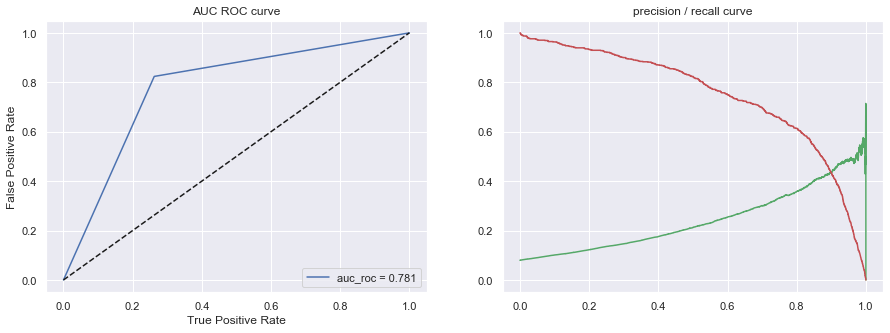

In [82]:
pred_test = lr_model.predict(X_test_pca.values)

pred_test_probs = lr_model.predict_proba(X_test_pca.values)[:, 1:]

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)
p, r, threshold = precision_recall_curve(y_test.churn, pred_test_probs)
#auc(p, r)

model_f1_score = f1_score(y_test.churn, pred_test)
model_precision_score = precision_score(y_test.churn, pred_test)
model_recall_score = recall_score(y_test.churn, pred_test)
model_accuracy_score = accuracy_score(y_test.churn, pred_test)
model_auc_roc = auc(fpr, tpr)

print("f1 score: ", round(model_f1_score,2))
print("precision: ", round(model_precision_score,2))
print("recall: ", round(model_recall_score,2))
print("accuracy: ", round(model_accuracy_score,2))
print("auc_roc: ", round(model_auc_roc,2))
print("Overall Accuracy: ", "{:2.2}".format(metrics.roc_auc_score(y_test, pred_test_probs)))
print("\n confusion Matrix\n")
print(confusion_matrix(y_test.values.ravel(), pred_test))


Plot_accuracy_curves()

### <font color = OrangeRed>2. Decision Trees</font>

<b><h6><font color = 'green'> Running the Decision Tree Model with default parameters. </h6></b>

In [83]:
# Decision Tree with Default Parameters

dtree = DecisionTreeClassifier(random_state = 100)
tree = dtree.fit(X_train.values, y_train.values.ravel())

In [84]:
# Making predictions
y_pred_test = tree.predict(X_test.values)

In [85]:
# plotting accuracies with min_samples_split
def plot_accuracies(param_type, xlabel_name, ylabel_name):
    
    plt.figure()
    plt.plot(scores[param_type],
         scores["mean_train_score"],
         label="training accuracy")

    plt.plot(scores[param_type],
         scores["mean_test_score"],
         label="test accuracy")
    
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.legend()
    plt.show()

In [86]:
# Printing classification report
get_classification_test_metrics(y_test, y_pred_test)


 confusion Matrix

[[7761  478]
 [ 415  294]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.4 |   0.38      | 0.41    | 0.9     | 0.68     |


#### a. Decision Tree - HyperTuning :  max_depth

In [87]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                    return_train_score=True)

tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [88]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.083949      0.002094         0.002999    1.696629e-06   
1       0.150108      0.001468         0.003199    3.994030e-04   
2       0.214467      0.001958         0.002999    4.862804e-07   
3       0.315404      0.048531         0.003798    1.165288e-03   
4       0.346785      0.002827         0.002999    2.336015e-07   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.920738           0.920719   
1               2  {'max_depth': 2}           0.920738           0.920719   
2               3  {'max_depth': 3}           0.915230           0.920719   
3               4  {'max_depth': 4}           0.923372           0.917126   
4               5  {'max_depth': 5}           0.923132           0.921437   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.920719           0.920719           0.920719         0.920722   
1           0.920719           0.920719           0.920719         0.920722   
2           0.920719           0.919760           0.920719         0.919429   
3           0.928144           0.920000           0.922395         0.922207   
4           0.931737           0.919760           0.925749         0.924363   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000008                9            0.920719            0.920723   
1        0.000008                9            0.920719            0.920723   
2        0.002132               11            0.921138            0.920723   
3        0.003669                6            0.926587            0.921981   
4        0.004184                3            0.931257            0.929585   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.920723            0.920723            0.920723   
1            0.920723            0.920723            0.920723   
2            0.920723            0.921442            0.920723   
3            0.924436            0.925334            0.925873   
4            0.929286            0.929286            0.930064   

   mean_train_score  std_train_score  
0          0.920722         0.000002  
1          0.920722         0.000002  
2          0.920950         0.000294  
3          0.924842         0.001594  
4          0.929896         0.000738

Now let's visualize how train and test score changes with max_depth.

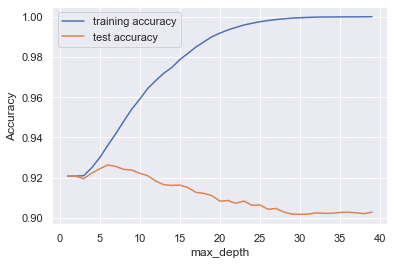

In [89]:
# plotting accuracies with max_depth
plot_accuracies('param_max_depth', 'max_depth', 'Accuracy')

You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 7, after which the test score gradually reduces. 

{ max_depth: 7 }

#### b. Decision Tree  - Hyperparameter Tuning : min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [90]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 30)}

# instantiate the model
dtree = DecisionTreeClassifier(max_depth = 7, random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(2, 30)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

In [91]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.536667      0.086852         0.002999    4.101908e-07   
1       0.580041      0.107426         0.005397    2.331185e-03   
2       0.570447      0.037497         0.004797    1.165288e-03   
3       0.681578      0.145832         0.004598    1.199342e-03   
4       0.588037      0.058302         0.003999    8.940964e-04   

  param_min_samples_split                    params  split0_test_score  \
0                       2  {'min_samples_split': 2}           0.921695   
1                       3  {'min_samples_split': 3}           0.921695   
2                       4  {'min_samples_split': 4}           0.922653   
3                       5  {'min_samples_split': 5}           0.922414   
4                       6  {'min_samples_split': 6}           0.921935   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.923593           0.933413           0.923114           0.925749   
1           0.924551           0.933413           0.923114           0.926467   
2           0.923353           0.933413           0.923353           0.926228   
3           0.923593           0.933413           0.922635           0.926467   
4           0.923832           0.933413           0.922635           0.926467   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.925513        0.004159               26            0.944611   
1         0.925848        0.004099               13            0.944611   
2         0.925800        0.004000               14            0.944371   
3         0.925704        0.004116               22            0.944311   
4         0.925656        0.004174               23            0.944371   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.940542            0.940722            0.940303   
1            0.940423            0.940722            0.940303   
2            0.940123            0.940722            0.940243   
3            0.940063            0.940722            0.940183   
4            0.939944            0.940662            0.940183   

   split4_train_score  mean_train_score  std_train_score  
0            0.942818          0.941799         0.001669  
1            0.942698          0.941751         0.001673  
2            0.942638          0.941620         0.001646  
3            0.942459          0.941548         0.001626  
4            0.942459          0.941524         0.001674

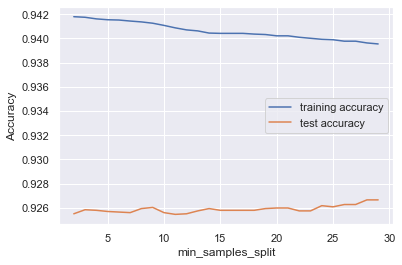

In [92]:
# plotting accuracies with max_depth
plot_accuracies('param_min_samples_split', 'min_samples_split', 'Accuracy')

{ min_samples_split: 28 }

#### c. Decision Tree  - Hyperparameter Tuning : min_samples_leaf

The hyperparameter min_samples_leaf indicates the minimum number of samples required to be at a leaf.

Let's see what will be the optimum value for min_samples_leaf.

In [93]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 61)}

# instantiate the model
dtree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 28, random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",  return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=28,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(1, 61)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

In [94]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.481301      0.013697         0.002999    1.907349e-07   
1       0.637206      0.160079         0.004598    1.018730e-03   
2       0.569648      0.039862         0.003998    1.097809e-03   
3       0.521276      0.070414         0.003198    3.997806e-04   
4       0.559054      0.047914         0.003999    1.263429e-03   

  param_min_samples_leaf                   params  split0_test_score  \
0                      1  {'min_samples_leaf': 1}           0.923372   
1                      2  {'min_samples_leaf': 2}           0.923372   
2                      3  {'min_samples_leaf': 3}           0.923132   
3                      4  {'min_samples_leaf': 4}           0.923851   
4                      5  {'min_samples_leaf': 5}           0.923372   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.924551           0.934611           0.925749           0.925030   
1           0.925749           0.935329           0.926707           0.925030   
2           0.925509           0.934611           0.926707           0.924790   
3           0.926467           0.934611           0.926467           0.925509   
4           0.926228           0.934850           0.926228           0.925749   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.926662        0.004049               60            0.943114   
1         0.927237        0.004190               55            0.942575   
2         0.926950        0.004002               59            0.942395   
3         0.927381        0.003739               49            0.941856   
4         0.927285        0.003928               52            0.941796   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.938147            0.938447            0.938028   
1            0.937489            0.937908            0.937249   
2            0.937249            0.937609            0.937189   
3            0.936950            0.937549            0.936950   
4            0.936890            0.937429            0.936830   

   split4_train_score  mean_train_score  std_train_score  
0            0.940423          0.939632         0.001946  
1            0.940123          0.939069         0.002028  
2            0.939824          0.938853         0.002019  
3            0.939465          0.938554         0.001892  
4            0.939285          0.938446         0.001897

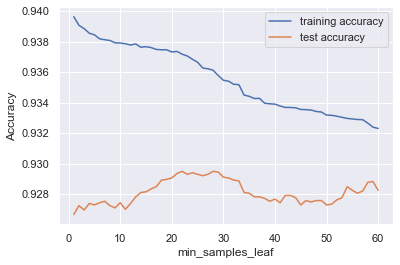

In [95]:
# plotting accuracies with min_samples_leaf
plot_accuracies('param_min_samples_leaf', 'min_samples_leaf', 'Accuracy')

{ min_samples_leaf: 28 }

<b><h6><font color = 'green'> Running the Decision Tree Model with best parameters obtained from grid search. </h6></b>

In [96]:
# Decision Tree with best parameters obtained from grid search

dtree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 28, min_samples_leaf = 28, random_state = 100)

tree = dtree.fit(X_train.values, y_train.values.ravel())

In [97]:
# accuracy score
tree.score(X_test,y_test)

0.9259052302190434

In [98]:
y_pred = tree.predict(X_test)

In [99]:
# print classification report
get_classification_test_metrics(y_test, y_pred)


 confusion Matrix

[[7979  260]
 [ 403  306]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.48 |   0.54      | 0.43    | 0.93     | 0.7     |


### <font color = darkcyan>Interpretation:</font>

From Decision Tree:

- With Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | confusion_matrix | 
| --- | --- | --- | --- | --- | --- |
| 0.40    | 0.38     | 0.41     | 0.90     | 0.68     | [[7761, 478], [415, 294]] |


- With HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | confusion_matrix | 
| --- | --- | --- | --- | --- | --- |
| 0.47    | 0.54     | 0.42     | 0.93     | 0.70     | [[7981, 258], [408, 301]] |

**Thus, it shows that there is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model (After HyperTuning)**

### <font color = OrangeRed>3. Random forest</font>

In [100]:
# Custom function for GridSearchCV

def get_gridsearch_cv(rf, params, n_folds):
       
    gs_cv = GridSearchCV(rf, params, 
                         cv= n_folds, 
                         scoring= "accuracy", return_train_score=True)
    
    gs_cv.fit(X_train, y_train)
    
    return  gs_cv

In [101]:
# Let's first run the Random Forest Model with default parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [102]:
# Making predictions
predictions = rfc.predict(X_test)

In [103]:
# print classification report
get_classification_test_metrics(y_test, predictions)


 confusion Matrix

[[8131  108]
 [ 508  201]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.39 |   0.65      | 0.28    | 0.93     | 0.64     |


#### a. Random Forest - Hyperparameter Tuning :  n_estimators ( (default=10): The number of trees in the forest)

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy.
<br>

In [104]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(n_jobs = -1, random_state = 100)
    
# fit tree on training data, by using GridSearchCV
gs = get_gridsearch_cv(rf, parameters, n_folds)

In [105]:
# scores of GridSearch CV
scores = gs.cv_results_
pd.DataFrame(scores).head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.569319      1.636607         0.106778        0.000704   
1       8.435389      0.662119         0.189605        0.041764   
2      10.980301      0.232767         0.229748        0.044028   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.931513   
1                200  {'n_estimators': 200}           0.934387   
2                300  {'n_estimators': 300}           0.933429   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.933892           0.934371           0.937485           0.936287   
1           0.933653           0.935329           0.937964           0.935569   
2           0.934371           0.936048           0.936766           0.937006   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.934710        0.002059                9             0.99994   
1         0.935380        0.001462                8             1.00000   
2         0.935524        0.001395                5             1.00000   

   split1_train_score  split2_train_score  split3_train_score  \
0             0.99994             0.99994             0.99988   
1             1.00000             1.00000             1.00000   
2             1.00000             1.00000             1.00000   

   split4_train_score  mean_train_score  std_train_score  
0                 1.0           0.99994         0.000038  
1                 1.0           1.00000         0.000000  
2                 1.0           1.00000         0.000000

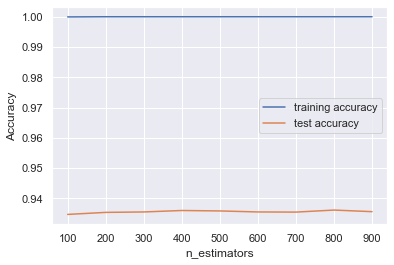

In [106]:
# plotting accuracies with n_estimators
plot_accuracies('param_n_estimators', 'n_estimators', 'Accuracy')

{ n_estimators : 900 }

#### b. Random Forest -  Hyperparameter Tuning   :  max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [107]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(n_jobs = -1, random_state = 100)

# fit tree on training data, by using GridSearchCV
gs = get_gridsearch_cv(rf, parameters, n_folds)

In [108]:
# Scores of GridSearch CV
scores = gs.cv_results_

pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.193680      0.048076         0.108733        0.000748   
1       0.296462      0.011098         0.108482        0.001025   
2       0.474534      0.106454         0.108195        0.001368   
3       0.523075      0.058990         0.108848        0.000351   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.920738           0.920719   
1               7   {'max_depth': 7}           0.926724           0.931497   
2              12  {'max_depth': 12}           0.930077           0.934132   
3              17  {'max_depth': 17}           0.930316           0.931257   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.920719           0.920719           0.920719         0.920722   
1           0.930299           0.930778           0.930060         0.929872   
2           0.929820           0.931976           0.931497         0.931500   
3           0.932216           0.931976           0.929820         0.931117   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000008                4            0.920719            0.920723   
1        0.001649                3            0.939401            0.938746   
2        0.001549                1            0.972695            0.972157   
3        0.000926                2            0.989521            0.988623   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.920723            0.920723            0.920723   
1            0.940063            0.938626            0.938626   
2            0.972816            0.970122            0.973115   
3            0.990719            0.988683            0.990001   

   mean_train_score  std_train_score  
0          0.920722         0.000002  
1          0.939093         0.000564  
2          0.972181         0.001075  
3          0.989509         0.000797

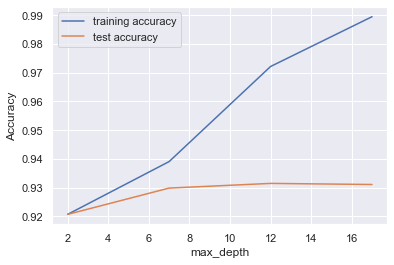

In [109]:
# plotting accuracies with max_depth
plot_accuracies('param_max_depth', 'max_depth', 'Accuracy')

{ max_depth : 7 }

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

#### c. Random Forest - Hyperparameter Tuning : min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [110]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 11, 2)}

# instantiate the model
rf = RandomForestClassifier(max_depth = 7, n_jobs = -1, random_state = 100)


# fit tree on training data, by using GridSearchCV
gs = get_gridsearch_cv(rf, parameters, n_folds)

In [111]:
# scores of GridSearch CV
scores = gs.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.311534      0.028012         0.108716        0.000635   
1       0.342126      0.078862         0.108869        0.001899   
2       0.285101      0.001955         0.108909        0.000343   
3       0.291725      0.032386         0.108297        0.001013   
4       0.266276      0.004058         0.107417        0.000444   

  param_min_samples_split                     params  split0_test_score  \
0                       2   {'min_samples_split': 2}           0.926724   
1                       4   {'min_samples_split': 4}           0.926724   
2                       6   {'min_samples_split': 6}           0.927682   
3                       8   {'min_samples_split': 8}           0.925287   
4                      10  {'min_samples_split': 10}           0.927443   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.931497           0.930299           0.930778           0.930060   
1           0.928862           0.927186           0.931737           0.928862   
2           0.928862           0.926946           0.931737           0.930060   
3           0.928623           0.928383           0.933413           0.928862   
4           0.928862           0.928862           0.932455           0.929341   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.929872        0.001649                1            0.939401   
1         0.928674        0.001759                5            0.939940   
2         0.929057        0.001707                3            0.939042   
3         0.928914        0.002599                4            0.938024   
4         0.929393        0.001658                2            0.938922   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.938746            0.940063            0.938626   
1            0.937788            0.939824            0.939285   
2            0.937489            0.940243            0.938746   
3            0.937609            0.939584            0.936770   
4            0.938806            0.940423            0.938327   

   split4_train_score  mean_train_score  std_train_score  
0            0.938626          0.939093         0.000564  
1            0.938267          0.939021         0.000854  
2            0.940722          0.939248         0.001145  
3            0.941261          0.938650         0.001594  
4            0.939644          0.939224         0.000733

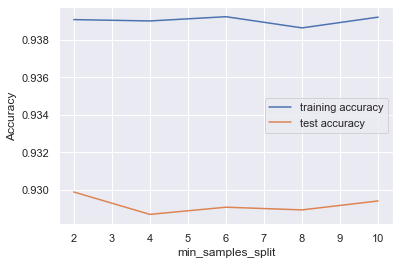

In [112]:
# plotting accuracies with min_samples_split
plot_accuracies('param_min_samples_split', 'min_samples_split', 'Accuracy')

{min_sample_split : 2}

#### d. Random Forest - Hyperparameter Tuning : max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [113]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data, by using GridSearchCV
gs = get_gridsearch_cv(rf, parameters, n_folds)

In [114]:
# scores of GridSearch CV
scores = gs.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.142513      0.005236         0.007196    3.998042e-04   
1       0.273831      0.079987         0.007595    4.906813e-04   
2       0.371769      0.009224         0.007196    9.798223e-04   
3       0.554257      0.080706         0.006996    5.436780e-07   
4       0.608025      0.004221         0.007196    3.998757e-04   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.920977   
1                  8   {'max_features': 8}           0.920738   
2                 14  {'max_features': 14}           0.923611   
3                 20  {'max_features': 20}           0.922653   
4                 24  {'max_features': 24}           0.924090   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.920719           0.920719           0.920719           0.920719   
1           0.920958           0.926467           0.922635           0.920958   
2           0.923353           0.923593           0.922156           0.922635   
3           0.929820           0.923832           0.924790           0.924072   
4           0.928862           0.926228           0.921198           0.921437   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.920770        0.000103                5            0.920778   
1         0.922351        0.002168                4            0.920898   
2         0.923070        0.000578                3            0.924731   
3         0.925034        0.002490                1            0.926707   
4         0.924363        0.002911                2            0.928623   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.920783            0.920723            0.920723   
1            0.921023            0.925873            0.923298   
2            0.924316            0.925094            0.921921   
3            0.929046            0.926531            0.925693   
4            0.928208            0.928747            0.921442   

   split4_train_score  mean_train_score  std_train_score  
0            0.920723          0.920746         0.000028  
1            0.921382          0.922495         0.001898  
2            0.925154          0.924243         0.001199  
3            0.924615          0.926518         0.001465  
4            0.925513          0.926507         0.002794

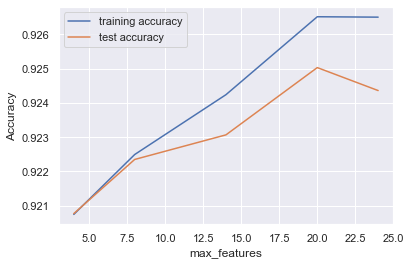

In [115]:
# plotting accuracies with max_features
plot_accuracies('param_max_features', 'max_features', 'Accuracy')

Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

#### e. Random Forest - Hyperparameter Tuning :  min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

In [116]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 10)}

# instantiate the model
rf = RandomForestClassifier(n_jobs = -1, random_state = 100)


# fit tree on training data, by using GridSearchCV
gs = get_gridsearch_cv(rf, parameters, n_folds)

In [117]:
# scores of GridSearch CV
scores = gs.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.534231      0.084669         0.108602        0.000549   
1       0.498955      0.045732         0.107710        0.000646   
2       0.469268      0.017131         0.108162        0.000472   
3       0.501823      0.078083         0.108483        0.000616   
4       0.486213      0.080470         0.107653        0.000808   

  param_min_samples_leaf                   params  split0_test_score  \
0                      1  {'min_samples_leaf': 1}           0.927921   
1                      2  {'min_samples_leaf': 2}           0.928161   
2                      3  {'min_samples_leaf': 3}           0.929358   
3                      4  {'min_samples_leaf': 4}           0.928879   
4                      5  {'min_samples_leaf': 5}           0.929119   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.927665           0.930778           0.933174           0.928623   
1           0.935808           0.931976           0.932695           0.926946   
2           0.934371           0.929581           0.933413           0.931737   
3           0.931257           0.930778           0.936287           0.931257   
4           0.932216           0.933413           0.933413           0.932695   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.929632        0.002082                9            0.992515   
1         0.931117        0.003205                7            0.982814   
2         0.931692        0.002002                4            0.974311   
3         0.931692        0.002459                4            0.968383   
4         0.932171        0.001592                2            0.963772   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.992875            0.991557            0.992635   
1            0.982995            0.983115            0.983414   
2            0.974313            0.972936            0.974672   
3            0.967786            0.967726            0.969702   
4            0.961978            0.962637            0.963655   

   split4_train_score  mean_train_score  std_train_score  
0            0.993054          0.992527         0.000520  
1            0.983654          0.983198         0.000300  
2            0.973954          0.974037         0.000596  
3            0.968984          0.968516         0.000748  
4            0.964074          0.963223         0.000788

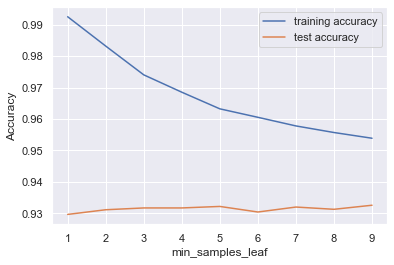

In [118]:
# plotting accuracies with min_samples_leaf
plot_accuracies('param_min_samples_leaf', 'min_samples_leaf', 'Accuracy')

<b><h6><font color = 'green'> Grid Search to Find Optimal Hyperparameters </h6></b>

We can now find the optimal hyperparameters using GridSearchCV.

**Fitting the final model with the best parameters obtained from grid search.**

In [119]:
# Random Forest with best parameters obtained from grid search

rfc = RandomForestClassifier(n_estimators = 900, max_depth = 7, min_samples_split = 2, min_samples_leaf = 1,
                             n_jobs = -1, random_state = 100)

In [120]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [121]:
# predict
predictions = rfc.predict(X_test)

In [122]:
# print classification report
get_classification_test_metrics(y_test, predictions)


 confusion Matrix

[[8179   60]
 [ 585  124]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.28 |   0.67      | 0.17    | 0.93     | 0.58     |


### <font color = darkcyan>Interpretation:</font>

From Random Forest:

- With Default Parameters:

| f1 | precision | recall | accuracy | auc_roc | confusion_matrix |
| --- | --- | --- | --- | --- | --- |
| 0.39      | 0.65     | 0.28      | 0.93     | 0.64     |[[8131, 108], [508, 201]] |

- With HyperTuning:

| f1 | precision | recall | accuracy | auc_roc | confusion_matrix |
| --- | --- | --- | --- | --- | --- |
| 0.28     | 0.67    | 0.17     | 0.93    | 0.58     |[[8179, 60], [585, 124]] |


In [123]:
# Custom Function to plot GridSearch Result to get the best value

def hypertuning_plot_xgboost(scores, parameter):
    
    col = "param_" + parameter
    
    plt.figure()
    
    try:
        
        plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
        plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
                
    except:
        
        plt.plot(scores[col].data, scores["mean_train_score"], label = "training accuracy")
        plt.plot(scores[col].data, scores["mean_test_score"], label = "test accuracy")
            
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

### <font color = OrangeRed>4. XGBoost</font>

#### a. Running the XGBoost Classifier with default parameters

In [124]:
# Implement SMOTEENN on the whole train Dataset
X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(33548, 72)
(33548, 1)


In [125]:
# XGBoost with Default Parameters with sampling

xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train_resampled, y_train_resampled)

prediction = xgb.predict(X_test)

get_classification_test_metrics(y_test, prediction)


 confusion Matrix

[[7040 1199]
 [ 126  583]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.47 |   0.33      | 0.82    | 0.85     | 0.84     |


In [126]:
# XGBoost with Default Parameters without sampling

xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train, y_train)

prediction = xgb.predict(X_test)

get_classification_test_metrics(y_test, prediction)


 confusion Matrix

[[8068  171]
 [ 407  302]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.51 |   0.64      | 0.43    | 0.94     | 0.7     |


#### b. XGBoost - HyperTuning max_depth

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:  1.2min
[Parallel(n_jobs=15)]: Done  47 out of  50 | elapsed:  6.4min remaining:   24.5s
[Parallel(n_jobs=15)]: Done  50 out of  50 | elapsed:  6.4min finished



 confusion Matrix

[[8061  178]
 [ 404  305]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.51 |   0.63      | 0.43    | 0.93     | 0.7     |


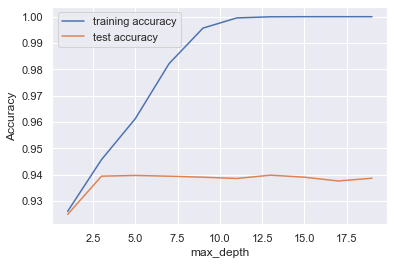

In [127]:

xgb = XGBClassifier(n_jobs = -1, random_state = 100)

# parameters to build the model on
parameters = 'max_depth'
param_grid = {parameters : range(1, 20, 2)}

gc = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'accuracy', 
                              cv = 5, return_train_score=True, n_jobs = 15, verbose = 2)

# Fit the model
gc.fit(X_train, y_train)

# Print accuracy scores and plot accuracy graph



prediction = gc.predict(X_test)
scores = gc.cv_results_

get_classification_test_metrics(y_test, prediction)

hypertuning_plot_xgboost(scores, parameters)

max depth - 3

#### c. XGBoost - HyperTuning learning_rate

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:   56.6s
[Parallel(n_jobs=15)]: Done  39 out of  45 | elapsed:  1.6min remaining:   14.4s
[Parallel(n_jobs=15)]: Done  45 out of  45 | elapsed:  1.8min finished



 confusion Matrix

[[8068  171]
 [ 407  302]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.51 |   0.64      | 0.43    | 0.94     | 0.7     |


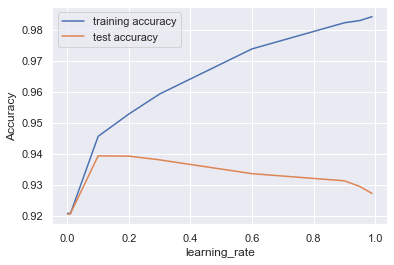

In [128]:
xgb = XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 100)

# parameters to build the model on
parameters = 'learning_rate'
param_grid = {parameters : [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99]}

gc = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'accuracy', 
                              cv = 5, return_train_score=True, n_jobs = 15, verbose = 2)

# Fit the model
gc.fit(X_train, y_train)

# Print accuracy scores and plot accuracy graph

prediction = gc.predict(X_test)
scores = gc.cv_results_

get_classification_test_metrics(y_test, prediction)

hypertuning_plot_xgboost(scores, parameters)

{learning_rate: 0.1}

#### d. XGBoost - HyperTuning n_estimators

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   9 out of  25 | elapsed:  2.3min remaining:  4.1min
[Parallel(n_jobs=15)]: Done  22 out of  25 | elapsed:  6.5min remaining:   53.4s
[Parallel(n_jobs=15)]: Done  25 out of  25 | elapsed:  6.8min finished



 confusion Matrix

[[8052  187]
 [ 385  324]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.53 |   0.63      | 0.46    | 0.94     | 0.72     |


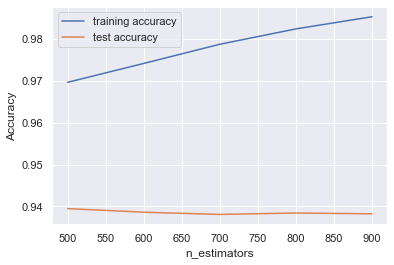

In [129]:
xgb = XGBClassifier(max_depth = 3, learning_rate = 0.1, n_jobs = -1, random_state = 100)

# parameters to build the model on
parameters = 'n_estimators'
param_grid = {parameters : range(500, 1000, 100)}


gc = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'accuracy', 
                              cv = 5, return_train_score=True, n_jobs = 15, verbose = 2)

# Fit the model
gc.fit(X_train, y_train)

# Print accuracy scores and plot accuracy graph

prediction = gc.predict(X_test)
scores = gc.cv_results_

get_classification_test_metrics(y_test, prediction)

hypertuning_plot_xgboost(scores, parameters)

{'n_estimators': 500}

#### e. XGBoost - HyperTuning subsample

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  11 tasks      | elapsed:  3.0min
[Parallel(n_jobs=15)]: Done  47 out of  50 | elapsed:  7.9min remaining:   30.1s
[Parallel(n_jobs=15)]: Done  50 out of  50 | elapsed:  7.9min finished



 confusion Matrix

[[8049  190]
 [ 399  310]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.51 |   0.62      | 0.44    | 0.93     | 0.71     |


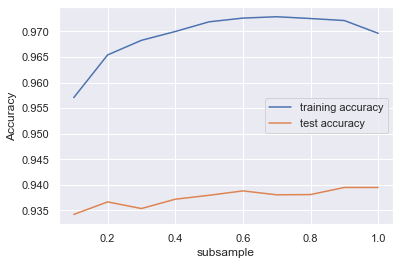

In [130]:
xgb = XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 500, n_jobs = -1, random_state = 100)

# parameters to build the model on
parameters = 'subsample'
param_grid = {parameters : np.arange(0.1, 1.1, 0.1)}


gc = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'accuracy', 
                              cv = 5, return_train_score=True, n_jobs = 15, verbose = 2)

# Fit the model
gc.fit(X_train, y_train)

# Print accuracy scores and plot accuracy graph

prediction = gc.predict(X_test)
scores = gc.cv_results_

get_classification_test_metrics(y_test, prediction)

hypertuning_plot_xgboost(scores, parameters)

{subsample: 0.9}

#### f. XGBoost - HyperTuning min_child_weight

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  24 out of  35 | elapsed:  4.5min remaining:  2.1min
[Parallel(n_jobs=15)]: Done  35 out of  35 | elapsed:  6.6min finished



 confusion Matrix

[[8046  193]
 [ 389  320]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.52 |   0.62      | 0.45    | 0.93     | 0.71     |


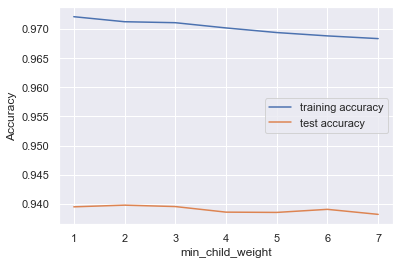

In [131]:
xgb = XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 500, subsample = 0.9, n_jobs = -1, random_state = 100)

# parameters to build the model on
parameters = 'min_child_weight'
param_grid = {parameters : range(1, 8, 1)}

gc = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'accuracy', 
                              cv = 5, return_train_score=True, n_jobs = 15, verbose = 2)

# Fit the model
gc.fit(X_train, y_train)

# Print accuracy scores and plot accuracy graph

prediction = gc.predict(X_test)
scores = gc.cv_results_

get_classification_test_metrics(y_test, prediction)

hypertuning_plot_xgboost(scores, parameters)


{min_child_weight : 3}

#### Running the XGBoost with best parameters obtained from grid search.

In [132]:
xgb = XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 500, min_child_weight = 3,
                    subsample = 0.9, n_jobs = -1, random_state = 100)

# Fit the model
xgb = xgb.fit(X_train, y_train)

# Print accuracy scores 
prediction = xgb.predict(X_test)

get_classification_test_metrics(y_test, prediction)



 confusion Matrix

[[8044  195]
 [ 385  324]]

classification report

|  f1  |  precision  | recall  | accuracy | auc_roc  |
-------------------------------------------------------
| 0.53 |   0.62      | 0.46    | 0.94     | 0.72     |


All the parameters has come good for XGBoost method, so XGBoost seems to be a better choice for prediction

In [133]:
# Deriving the important features for prediction as per XGBoost

feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

top_10_features = feature_importances.head(10)
top_10_features

importance
fb_user_8                      0.097637
arpu_action_phase              0.069894
total_rech_amt_action_phase    0.047357
loc_ic_mou_action_phase        0.030409
total_rech_num_action_phase    0.029443
loc_ic_mou_good_phase          0.028021
vbc_3g_9                       0.027730
spl_ic_mou_action_phase        0.022802
total_og_mou_good_phase        0.021125
roam_og_mou_action_phase       0.021002

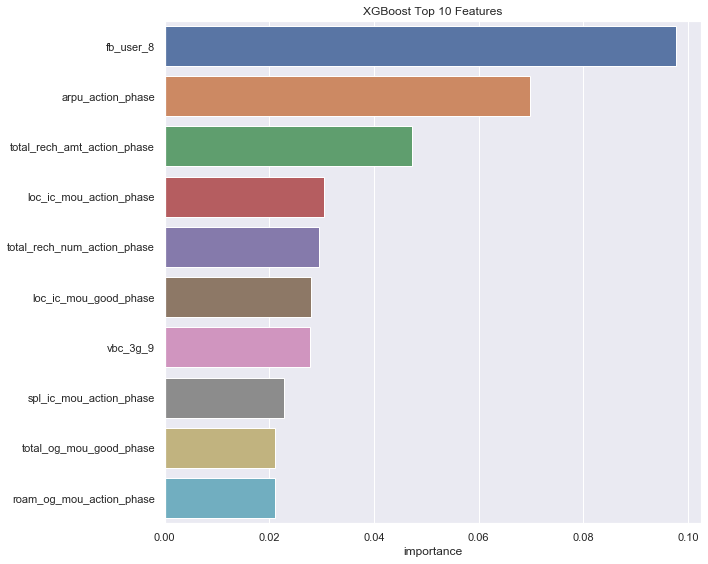

In [134]:
# Plotting the features
plt.figure(figsize=(10, 8))

sns.barplot(x = "importance",
            y = top_10_features.index,
            data = top_10_features.sort_values(by = "importance", ascending = False))

plt.title('XGBoost Top 10 Features')
plt.tight_layout()
plt.show()

### <font color = OrangeRed> Top 10 Features affecting churn</font>


<b><o><h6><font color = 'Indigo'> 1. fb_user_8 </h6></o></b>
<b><o><h6><font color = 'Indigo'> 2. arpu_action_phase </h6></o></b>
<b><o><h6><font color = 'Indigo'> 3. total_rech_amt_action_phase </h6></o></b>
<b><o><h6><font color = 'Indigo'> 4. loc_ic_mou_action_phase </h6></o></b>
<b><o><h6><font color = 'Indigo'> 5. total_rech_num_action_phase	 </h6></o></b>
<b><o><h6><font color = 'Indigo'> 6. loc_ic_mou_good_phase </h6></o></b>
<b><o><h6><font color = 'Indigo'> 7. vbc_3g_9</h6></o></b>
<b><o><h6><font color = 'Indigo'> 8. spl_ic_mou_action_phase </h6></o></b>
<b><o><h6><font color = 'Indigo'> 9. total_og_mou_good_phase </h6></o></b>
<b><o><h6><font color = 'Indigo'> 10. roam_og_mou_action_phase	</h6></o></b>


### <font color = OrangeRed> Bottom Line</font>

Our XGBoost model is a decent model. We are able to predict with accuracy of **94 %** .

If the goal is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as 'not churned,' as it does not cause any negative problem. It could potentially make them even happier for the extra attention they are getting. This is the kind of model that can surely add a value. 